In [3]:
import pandas as pd

# Importing Data & Joining Data

## Enrollment Data

In [1]:
import pandas as pd
import glob
import os
import re

# Folder containing all your CSVs
folder_path = r"Data\Enrollment Data"  # 🔹 replace with your actual folder path

# Columns to keep
columns_to_keep = ["County", "State", "Contract ID", "Organization Name", 
                   "Organization Type", "Plan Type", "Enrolled"]

def import_enrollment_data(folder_path):
    all_files = glob.glob(os.path.join(folder_path, "SCC_Enrollment_MA_Alt_*.csv"))
    combined_data = []

    for file in all_files:
        filename = os.path.basename(file)
        
        # Extract year and month using regex
        match = re.search(r"_(\d{4})_(\d{2})\.csv$", filename)
        if not match:
            print(f"⚠️ Skipping file (no year-month found): {filename}")
            continue
        
        year, month = match.groups()

        # Read CSV
        df = pd.read_csv(file, dtype=str)
        
        # Keep only selected columns
        df = df[columns_to_keep].copy()
        
        # Add month and year
        df["Month"] = month
        df["Year"] = year
        
        combined_data.append(df)

    # Combine all files
    final_df = pd.concat(combined_data, ignore_index=True)
    
    # Keep only CA or HI
    final_df = final_df[final_df["State"].isin(["CA", "HI"])].reset_index(drop=True)
    
    return final_df


# Run function
all_enrollment = import_enrollment_data(folder_path)

# Display result
print(all_enrollment.head())
print(f"\n✅ Total rows combined for CA & HI: {len(all_enrollment)}")

# Optional: Save
all_enrollment.to_csv("MA_Enrollment_CA_HI_All_Years.csv", index=False)


    County State Contract ID               Organization Name  \
0  Alameda    CA       H0504  CALIFORNIA PHYSICIANS' SERVICE   
1  Alameda    CA       H0524      KAISER FOUNDATION HP, INC.   
2  Alameda    CA       H0543               UHC OF CALIFORNIA   
3  Alameda    CA       H0544            CAREMORE HEALTH PLAN   
4  Alameda    CA       H0562   HEALTH NET OF CALIFORNIA,INC.   

  Organization Type   Plan Type  Enrolled Month  Year  
0         Local CCP  HMO/HMOPOS     71.00    01  2016  
1         Local CCP  HMO/HMOPOS  74506.00    01  2016  
2         Local CCP  HMO/HMOPOS   5392.00    01  2016  
3         Local CCP  HMO/HMOPOS     13.00    01  2016  
4         Local CCP  HMO/HMOPOS   5133.00    01  2016  

✅ Total rows combined for CA & HI: 101466


In [2]:
all_enrollment

County State Contract ID                          Organization Name  \
0       Alameda    CA       H0504             CALIFORNIA PHYSICIANS' SERVICE   
1       Alameda    CA       H0524                 KAISER FOUNDATION HP, INC.   
2       Alameda    CA       H0543                          UHC OF CALIFORNIA   
3       Alameda    CA       H0544                       CAREMORE HEALTH PLAN   
4       Alameda    CA       H0562              HEALTH NET OF CALIFORNIA,INC.   
...         ...   ...         ...                                        ...   
101461     Maui    HI       H5522               AETNA LIFE INSURANCE COMPANY   
101462     Maui    HI       H5969                                  ALOHACARE   
101463     Maui    HI       H7617                 EMPHESYS INSURANCE COMPANY   
101464     Maui    HI       H9572  BCBS OF MICHIGAN MUTUAL INSURANCE COMPANY   
101465     Maui    HI       X0001       HUMANA INSURANCE COMPANY OF NEW YORK   

       Organization Type       Plan Type  Enrolled Month  Year  
0              Local CCP      HMO/HMOPOS     71.00    01  2016  
1              Local CCP      HMO/HMOPOS  74506.00    01  2016  
2              Local CCP      HMO/HMOPOS   5392.00    01  2016  
3              Local CCP      HMO/HMOPOS     13.00    01  2016  
4              Local CCP      HMO/HMOPOS   5133.00    01  2016  
...                  ...             ...       ...   ...   ...  
101461         Local CCP       Local PPO       145    09  2025  
101462         Local CCP      HMO/HMOPOS       392    09  2025  
101463         Local CCP       Local PPO        19    09  2025  
101464         Local CCP       Local PPO        13    09  2025  
101465    LI NET Sponsor  LI NET Sponsor        12    09  2025  

[101466 rows x 9 columns]

## Landscape Files

### Landscape 2026

In [3]:
landscape_2026= pd.read_csv( "Data/Landscape/CY2026_Landscape_202509.csv")


Creating an org map

In [4]:
org_map= landscape_2026[[ 'Parent Organization Name',
       'Organization Marketing Name']].drop_duplicates()
org_map.to_excel("Org_map.xlsx", index= False)

Removing columns not important to analysis

In [5]:
landscape_2026.columns

Index(['Contract Year', 'Contract Category Type', 'US Territory',
       'State Territory Abbreviation', 'State Territory Name', 'County Name',
       'Contract ID', 'Plan ID', 'Segment ID', 'Contract Plan ID',
       'Contract Plan Segment ID', 'Sanctioned Plan',
       'Parent Organization Name', 'Contract Name',
       'Organization Marketing Name', 'Organization Type', 'Plan Name',
       'Plan Type', 'Special Needs Plan (SNP) Indicator', 'SNP Type',
       'SNP Institutional Type', 'SNP Institutional Category',
       'Dual Eligible SNP (D-SNP) Integration Status',
       'D-SNP Applicable Integrated Plan (AIP) Identifier',
       'Chronic or Disabling Condition SNP (C-SNP) Condition Type',
       'Medicare Zero-Dollar Cost Sharing D-SNP Plan',
       'Part D Coverage Indicator', 'National PDP', 'Drug Benefit Category',
       'Drug Benefit Type', 'Voluntary De Minimis Program Participant',
       'Part D Basic Premium At or Below Regional Benchmark',
       'Low Income Subsidy (L

In [6]:
to_keep= ['Contract Year', 'Contract Category Type', 'State Territory Name',
        'County Name', 'Contract ID', 'Plan ID', 'Parent Organization Name',
        'Plan Type' , 'Monthly Consolidated Premium (Part C + D)',
        'Annual Part D Deductible Amount', 'Drug Benefit Category',
        'In-Network Maximum Out-of-Pocket (MOOP) Amount', 'Overall Star Rating']

landscape_2026= landscape_2026[to_keep]

In [7]:
landscape_2026.columns

Index(['Contract Year', 'Contract Category Type', 'State Territory Name',
       'County Name', 'Contract ID', 'Plan ID', 'Parent Organization Name',
       'Plan Type', 'Monthly Consolidated Premium (Part C + D)',
       'Annual Part D Deductible Amount', 'Drug Benefit Category',
       'In-Network Maximum Out-of-Pocket (MOOP) Amount',
       'Overall Star Rating'],
      dtype='object')

Removing rows not important to analysis

a. Removing rows where "Contract Category Type" != "MA-PD"

In [8]:
#removing spaces
landscape_2026["Contract Category Type"] = landscape_2026["Contract Category Type"].str.strip()

#Filter rows
landscape_2026 = landscape_2026[landscape_2026["Contract Category Type"] == "MA-PD"]

#Verify
landscape_2026["Contract Category Type"].unique()

array(['MA-PD'], dtype=object)

In [9]:
#checking the counts
landscape_2026["Contract Category Type"].value_counts()

Contract Category Type
MA-PD    64249
Name: count, dtype: int64

b. Removing rows where "State Territory Name" != "California" or "Hawaii"

In [10]:
#Stripping whitespaces from column names
landscape_2026["State Territory Name"]= landscape_2026["State Territory Name"].str.strip()

#fILTER ROWS TO KEEP ONLY "CA" or "HI"
states_to_keep= ["California", "Hawaii"]
landscape_2026= landscape_2026[landscape_2026["State Territory Name"].isin(states_to_keep)]

#verify the results
landscape_2026["State Territory Name"].unique()

array(['California', 'Hawaii'], dtype=object)

### Landscape 2025

In [11]:
landscape_2025= pd.read_csv( "Data/Landscape/CY2025_Landscape.csv")

In [12]:
landscape_2025.columns

Index(['Contract Year', 'Contract Category Type', 'State Abbreviation',
       'State Name', 'County Name', 'Contract ID', 'Plan ID', 'Segment ID',
       'Sanctioned Plan', 'Contract Name', 'Parent Organization Name',
       'Organization Marketing Name', 'Organization Type', 'Plan Name',
       'Plan Type', 'Special Needs Plan (SNP) Indicator', 'SNP Type',
       'SNP Institutional Type',
       'Dual Eligible SNP (D-SNP) Integration Status',
       'D-SNP Applicable Integrated Plan (AIP) Identifier',
       'Chronic or Disabling Condition SNP (C-SNP) Condition Type',
       'Medicare Zero-Dollar Cost Sharing D-SNP Plan',
       'Part D Coverage Indicator', 'National PDP', 'Drug Benefit Category',
       'Drug Benefit Type', 'Voluntary De Minimis Program Participant',
       'Part D Basic Premium At or Below Regional Benchmark',
       'Low Income Subsidy (LIS) Auto Enrollment',
       'Offers Drug Tier with No Part D Deductible',
       'Annual Part D Deductible Amount', 'Part D Bas

Removing columns that won't be used

In [13]:
to_keep= ['Contract Year', 'Contract Category Type', 'State Name',
        'County Name', 'Contract ID', 'Plan ID', 'Parent Organization Name',
        'Plan Type' , 'Monthly Consolidated Premium (Part C + D)',
        'Annual Part D Deductible Amount', 'Drug Benefit Category',
        'In-Network Maximum Out-of-Pocket (MOOP) Amount', 'Overall Star Rating']

landscape_2025= landscape_2025[to_keep]

In [14]:
landscape_2025.columns

Index(['Contract Year', 'Contract Category Type', 'State Name', 'County Name',
       'Contract ID', 'Plan ID', 'Parent Organization Name', 'Plan Type',
       'Monthly Consolidated Premium (Part C + D)',
       'Annual Part D Deductible Amount', 'Drug Benefit Category',
       'In-Network Maximum Out-of-Pocket (MOOP) Amount',
       'Overall Star Rating'],
      dtype='object')

In [15]:
#Renaming the "State Name" column to match 2026 file
landscape_2025= landscape_2025.rename(columns= {"State Name": "State Territory Name"})

Removing rows now important to analysis

a. Keeping only "MA-PD" Contract category type 

In [16]:
#removing spaces
landscape_2025["Contract Category Type"] = landscape_2025["Contract Category Type"].str.strip()

#Filter rows
landscape_2025 = landscape_2025[landscape_2025["Contract Category Type"] == "MA-PD"]

#Verify
landscape_2025["Contract Category Type"].unique()

array(['MA-PD'], dtype=object)

b. Keeping only "California" and "Hawaii" states 

In [17]:
#Stripping whitespaces from column names
landscape_2025["State Territory Name"]= landscape_2025["State Territory Name"].str.strip()

#fILTER ROWS TO KEEP ONLY "CA" or "HI"
states_to_keep= ["California", "Hawaii"]
landscape_2025= landscape_2025[landscape_2025["State Territory Name"].isin(states_to_keep)]

#verify the results
landscape_2025["State Territory Name"].unique()

array(['California', 'Hawaii'], dtype=object)

### Union-ing 2026 & 2025 

In [18]:
print(landscape_2025.shape)
print(landscape_2026.shape)

(906, 13)
(712, 13)


In [19]:
landscape_2026_2025 = pd.concat([landscape_2025, landscape_2026], ignore_index=True)

In [20]:
landscape_2026_2025.columns

Index(['Contract Year', 'Contract Category Type', 'State Territory Name',
       'County Name', 'Contract ID', 'Plan ID', 'Parent Organization Name',
       'Plan Type', 'Monthly Consolidated Premium (Part C + D)',
       'Annual Part D Deductible Amount', 'Drug Benefit Category',
       'In-Network Maximum Out-of-Pocket (MOOP) Amount',
       'Overall Star Rating'],
      dtype='object')

In [21]:
#Renaming some columns for simplicity

landscape_2026_2025= landscape_2026_2025.rename(
    columns= {
        'State Territory Name': 'State',
        'County Name': 'County',
        'Parent Organization Name': 'Organization Name',
        'In-Network Maximum Out-of-Pocket (MOOP) Amount': 'In-network MOOP Amount'
    }
)

In [22]:
landscape_2026_2025.to_excel("2025-2026.xlsx")

### Landscape 2024

In [23]:
landscape_2024= pd.read_csv("Data/Landscape/CY2024_Landscape_MA.csv")

In [24]:
landscape_2024.columns

Index(['State', 'County', 'Organization Name', 'Plan Name',
       'Type of Medicare Health Plan',
       'Monthly Consolidated Premium (Includes Part C + D)',
       'Annual Drug Deductible', 'Drug Benefit Type',
       'Drug Benefit Type Detail', 'Additional Coverage Offered in the Gap',
       'Contract ID', 'Plan ID', 'Segment ID', 'In-network MOOP Amount **',
       '2024 Overall Star Rating'],
      dtype='object')

Removing columns that won't be used

In [25]:
to_keep= ['State', 'County', 'Organization Name',
       'Type of Medicare Health Plan',
       'Monthly Consolidated Premium (Includes Part C + D)',
       'Annual Drug Deductible', 'Drug Benefit Type',
       'Contract ID', 'Plan ID', 'In-network MOOP Amount **',
       '2024 Overall Star Rating']

landscape_2024= landscape_2024[to_keep]

In [26]:
landscape_2024.columns

Index(['State', 'County', 'Organization Name', 'Type of Medicare Health Plan',
       'Monthly Consolidated Premium (Includes Part C + D)',
       'Annual Drug Deductible', 'Drug Benefit Type', 'Contract ID', 'Plan ID',
       'In-network MOOP Amount **', '2024 Overall Star Rating'],
      dtype='object')

Renaming columns in 2024 file to match 2025-2026 file

In [27]:

landscape_2024= landscape_2024.rename( columns= {
    'Type of Medicare Health Plan': 'Plan Type',
    'Monthly Consolidated Premium (Includes Part C + D)': 'Monthly Consolidated Premium (Part C + D)',
    'Annual Drug Deductible': 'Annual Part D Deductible Amount',
    'Drug Benefit Type': 'Drug Benefit Category',
    'In-network MOOP Amount **': 'In-network MOOP Amount',
    '2024 Overall Star Rating': 'Overall Star Rating'

})

Keeping only "California" and "Hawaii" states

In [28]:
#Stripping whitespaces from column names
landscape_2024["State"]= landscape_2024["State"].str.strip()

#fILTER ROWS TO KEEP ONLY "California" or "Hawaii"
states_to_keep= ["California", "Hawaii"]
landscape_2024= landscape_2024[landscape_2024["State"].isin(states_to_keep)]

#verify the results
landscape_2024["State"].unique()

array(['California', 'Hawaii'], dtype=object)

### Union-ing Part 2026-25 & 2024 data 

Adding 'Year' column in 2024 data & removing 'Contract category type' from landscape_2026_2025

In [29]:
landscape_2024["Contract Year"]= 2024

In [30]:
landscape_2026_2025= landscape_2026_2025.drop(columns= ["Contract Category Type"])

Now, creating the union

In [31]:
print(landscape_2024.shape)
print(landscape_2026_2025.shape)

(1238, 12)
(1618, 12)


In [32]:
landscape_2026_to_2024= pd.concat([landscape_2024, landscape_2026_2025], ignore_index=True)

In [33]:
landscape_2026_to_2024.to_excel("2024-2026.xlsx")

### Landscape 2023

Importing xlrd engine (this is an old version not supported by pandas)

In [34]:
!pip install xlrd


In [35]:
landscape_2023 = pd.read_excel("Data/Landscape/2023LandscapeSourceFile.xls",
    skiprows=5, engine= "xlrd"
)

# Display a quick preview
landscape_2023.head()

State   County                      Organization Name  \
0  Alabama  Autauga  Blue Cross and Blue Shield of Alabama   
1  Alabama  Autauga  Blue Cross and Blue Shield of Alabama   
2  Alabama  Autauga                          VIVA Medicare   
3  Alabama  Autauga                          VIVA Medicare   
4  Alabama  Autauga                          VIVA Medicare   

                       Plan Name Type of Medicare Health Plan  \
0  Blue Advantage Complete (PPO)                    Local PPO   
1   Blue Advantage Premier (PPO)                    Local PPO   
2     VIVA Medicare Select (HMO)                  Local HMO *   
3    VIVA Medicare Premier (HMO)                    Local HMO   
4       VIVA Medicare Plus (HMO)                    Local HMO   

   Monthly Consolidated Premium \n(Includes \nPart C + D)  \
0                                                0.0        
1                                              164.0        
2                                                0.0        
3                                              105.0        
4                                                0.0        

   Annual Drug Deductible Drug \nBenefit \nType  \
0                   150.0              Enhanced   
1                     0.0              Enhanced   
2                     NaN                   NaN   
3                     0.0              Enhanced   
4                     0.0              Enhanced   

  \nAdditional Coverage Offered in the Gap Drug Benefit Type Detail  \
0                                      Yes                       EA   
1                                      Yes                       EA   
2                                      NaN                      NaN   
3                                       No                       EA   
4                                       No                       EA   

  Contract ID  Plan ID  Segment ID  In-network MOOP Amount **  \
0       H0104       12           0                     5100.0   
1       H0104       15           0                     3400.0   
2       H0154        8           0                     4500.0   
3       H0154       11           0                     4500.0   
4       H0154       15           1                     5900.0   

  Overall Star Rating  
0                 4.5  
1                 4.5  
2                   5  
3                   5  
4                   5

In [36]:
landscape_2023.columns

Index(['State', 'County', 'Organization Name', 'Plan Name',
       'Type of Medicare Health Plan',
       'Monthly Consolidated Premium \n(Includes \nPart C + D)',
       'Annual Drug Deductible', 'Drug \nBenefit \nType',
       '\nAdditional Coverage Offered in the Gap', 'Drug Benefit Type Detail',
       'Contract ID', 'Plan ID', 'Segment ID', 'In-network MOOP Amount **',
       'Overall Star Rating'],
      dtype='object')

Removing the columns not being used & renaming the rest

In [37]:
#Removing the columns not being used
to_keep= ['State', 'County', 'Organization Name',
       'Type of Medicare Health Plan',
       'Monthly Consolidated Premium \n(Includes \nPart C + D)',
       'Annual Drug Deductible', 'Drug \nBenefit \nType',
       'Contract ID', 'Plan ID','In-network MOOP Amount **',
       'Overall Star Rating']
landscape_2023= landscape_2023[to_keep]

In [38]:
landscape_2023.columns

Index(['State', 'County', 'Organization Name', 'Type of Medicare Health Plan',
       'Monthly Consolidated Premium \n(Includes \nPart C + D)',
       'Annual Drug Deductible', 'Drug \nBenefit \nType', 'Contract ID',
       'Plan ID', 'In-network MOOP Amount **', 'Overall Star Rating'],
      dtype='object')

In [39]:
#Renaming columns
landscape_2023= landscape_2023.rename(
    columns= {'Type of Medicare Health Plan': 'Plan Type',
              'Monthly Consolidated Premium \n(Includes \nPart C + D)': 'Monthly Consolidated Premium (Part C + D)',
              'Annual Drug Deductible': 'Annual Part D Deductible Amount',
              'Drug \nBenefit \nType': 'Drug Benefit Category', 
              'In-network MOOP Amount **': 'In-network MOOP Amount'
              }
)

In [40]:
#Adding a new column for Contract Year
landscape_2023["Contract Year"]= 2023

Keeping only "California" & "Hawaii" states

In [41]:
#Stripping whitespaces from column names
landscape_2023["State"]= landscape_2023["State"].str.strip()

#fILTER ROWS TO KEEP ONLY "California" or "Hawaii"
states_to_keep= ["California", "Hawaii"]
landscape_2023= landscape_2023[landscape_2023["State"].isin(states_to_keep)]

#verify the results
landscape_2023["State"].unique()

array(['California', 'Hawaii'], dtype=object)

### Union-ing 2023 & 2026-2024

In [42]:
print(landscape_2023.shape)
print(landscape_2026_to_2024.shape)

(1103, 12)
(2856, 12)


In [43]:
landscape_2026_to_2023= pd.concat([landscape_2023, landscape_2026_to_2024], ignore_index=True)

In [44]:
landscape_2026_to_2023.to_excel("2023-2026.xlsx")

### Landscape 2022

In [45]:
landscape_2022= pd.read_csv("Data/Landscape/2022LandscapeSource file MA_AtoM 10262021.csv", 
                            encoding= "latin1", 
                            skiprows=5)

In [46]:
landscape_2022.head()

State   County                      Organization Name  \
0  Alabama  Autauga  Blue Cross and Blue Shield of Alabama   
1  Alabama  Autauga  Blue Cross and Blue Shield of Alabama   
2  Alabama  Autauga                          VIVA Medicare   
3  Alabama  Autauga                          VIVA Medicare   
4  Alabama  Autauga                          VIVA Medicare   

                       Plan Name Type of Medicare Health Plan  \
0  Blue Advantage Complete (PPO)                    Local PPO   
1   Blue Advantage Premier (PPO)                    Local PPO   
2     VIVA Medicare Select (HMO)                  Local HMO *   
3    VIVA Medicare Premier (HMO)                    Local HMO   
4       VIVA Medicare Plus (HMO)                    Local HMO   

   Monthly Consolidated Premium \n(Includes \nPart C + D)   \
0                                              $-            
1                                           $171.00          
2                                              $-            
3                                           $105.00          
4                                              $-            

   Annual Drug Deductible  Drug \nBenefit \nType  \
0                 $150.00               Enhanced   
1                    $-                 Enhanced   
2                      NaN                   NaN   
3                    $-                 Enhanced   
4                    $-                 Enhanced   

  \nAdditional Coverage Offered in the Gap Drug Benefit Type Detail  \
0                                      Yes                       EA   
1                                      Yes                       EA   
2                                      NaN                      NaN   
3                                       No                       EA   
4                                       No                       EA   

  Contract ID  Plan ID  Segment ID In-network MOOP Amount **  \
0       H0104       12           0                   $5,100    
1       H0104       15           0                   $3,400    
2       H0154        8           0                   $4,500    
3       H0154       11           0                   $4,500    
4       H0154       15           1                   $5,900    

  Overall Star Rating  
0                   4  
1                   4  
2                   5  
3                   5  
4                   5

Removing the columns not being used & renaming the rest

In [47]:
landscape_2022.columns

Index(['State', 'County', 'Organization Name', 'Plan Name',
       'Type of Medicare Health Plan',
       ' Monthly Consolidated Premium \n(Includes \nPart C + D) ',
       ' Annual Drug Deductible ', 'Drug \nBenefit \nType',
       '\nAdditional Coverage Offered in the Gap', 'Drug Benefit Type Detail',
       'Contract ID', 'Plan ID', 'Segment ID', 'In-network MOOP Amount **',
       'Overall Star Rating'],
      dtype='object')

In [48]:
#Removing the columns not being used
to_keep= ['State', 'County', 'Organization Name',
       'Type of Medicare Health Plan',
       ' Monthly Consolidated Premium \n(Includes \nPart C + D) ', 
        ' Annual Drug Deductible ', 'Drug \nBenefit \nType',
       'Contract ID', 'Plan ID','In-network MOOP Amount **',
       'Overall Star Rating']
landscape_2022= landscape_2022[to_keep]


In [49]:

#Renaming columns
landscape_2022= landscape_2022.rename(
    columns= {'Type of Medicare Health Plan': 'Plan Type',
              ' Monthly Consolidated Premium \n(Includes \nPart C + D) ': 'Monthly Consolidated Premium (Part C + D)',
              ' Annual Drug Deductible ': 'Annual Part D Deductible Amount',
              'Drug \nBenefit \nType': 'Drug Benefit Category', 
              'In-network MOOP Amount **': 'In-network MOOP Amount'
              }
)

In [50]:
#Adding a new column for Contract Year
landscape_2022["Contract Year"]= 2022

Filtering rows to "California" and "Hawaii" as states

In [51]:
#Stripping whitespaces from column names
landscape_2022["State"]= landscape_2022["State"].str.strip()

#fILTER ROWS TO KEEP ONLY "California" or "Hawaii"
states_to_keep= ["California", "Hawaii"]
landscape_2022= landscape_2022[landscape_2022["State"].isin(states_to_keep)]

#verify the results
landscape_2022["State"].unique()

array(['California', 'Hawaii'], dtype=object)

### Unioning 2022 & 2026-2023

In [52]:
print(landscape_2022.shape)
print(landscape_2026_to_2023.shape)

(860, 12)
(3959, 12)


In [53]:
landscape_2026_to_2022= pd.concat([landscape_2022, landscape_2026_to_2023], ignore_index=True)

In [54]:
landscape_2026_to_2022.to_excel("2022-2026.xlsx")

### Landscape 2021

In [55]:
landscape_2021= pd.read_csv("Data/Landscape/2021LandscapeSource file MA_AtoM 10152020.csv", 
skiprows=5)
landscape_2021.head()

State   County                      Organization Name  \
0  Alabama  Autauga  Blue Cross and Blue Shield of Alabama   
1  Alabama  Autauga  Blue Cross and Blue Shield of Alabama   
2  Alabama  Autauga                          VIVA Medicare   
3  Alabama  Autauga                          VIVA Medicare   
4  Alabama  Autauga                          VIVA Medicare   

                       Plan Name Type of Medicare Health Plan  \
0  Blue Advantage Complete (PPO)                    Local PPO   
1   Blue Advantage Premier (PPO)                    Local PPO   
2     VIVA Medicare Select (HMO)                  Local HMO *   
3    VIVA Medicare Premier (HMO)                    Local HMO   
4       VIVA Medicare Plus (HMO)                    Local HMO   

   Monthly Consolidated Premium \n(Includes \nPart C + D)   \
0                                              $-            
1                                           $170.00          
2                                              $-            
3                                           $104.00          
4                                              $-            

   Annual Drug Deductible  Drug \nBenefit \nType  \
0                 $150.00               Enhanced   
1                    $-                 Enhanced   
2                      NaN                   NaN   
3                    $-                 Enhanced   
4                 $150.00               Enhanced   

  \nAdditional Coverage Offered in the Gap Drug Benefit Type Detail  \
0                                      Yes                       EA   
1                                      Yes                       EA   
2                                      NaN                      NaN   
3                                       No                       EA   
4                                       No                       EA   

  Contract ID  Plan ID  Segment ID In-network MOOP Amount **  \
0       H0104       12           0                   $5,100    
1       H0104       15           0                   $3,400    
2       H0154        8           0                   $5,900    
3       H0154       11           0                   $5,500    
4       H0154       15           1                   $6,700    

  Overall Star Rating  Unnamed: 15  
0                   4          NaN  
1                   4          NaN  
2                 4.5          NaN  
3                 4.5          NaN  
4                 4.5          NaN

In [56]:
landscape_2021.columns

Index(['State', 'County', 'Organization Name', 'Plan Name',
       'Type of Medicare Health Plan',
       ' Monthly Consolidated Premium \n(Includes \nPart C + D) ',
       ' Annual Drug Deductible ', 'Drug \nBenefit \nType',
       '\nAdditional Coverage Offered in the Gap', 'Drug Benefit Type Detail',
       'Contract ID', 'Plan ID', 'Segment ID', 'In-network MOOP Amount **',
       'Overall Star Rating', 'Unnamed: 15'],
      dtype='object')

In [57]:
#Removing the columns not being used
to_keep= ['State', 'County', 'Organization Name',
       'Type of Medicare Health Plan',
       ' Monthly Consolidated Premium \n(Includes \nPart C + D) ', 
        ' Annual Drug Deductible ', 'Drug \nBenefit \nType',
       'Contract ID', 'Plan ID','In-network MOOP Amount **',
       'Overall Star Rating']
landscape_2021= landscape_2021[to_keep]



In [58]:
#Renaming columns
landscape_2021= landscape_2021.rename(
    columns= {'Type of Medicare Health Plan': 'Plan Type',
              ' Monthly Consolidated Premium \n(Includes \nPart C + D) ': 'Monthly Consolidated Premium (Part C + D)',
              ' Annual Drug Deductible ': 'Annual Part D Deductible Amount',
              'Drug \nBenefit \nType': 'Drug Benefit Category', 
              'In-network MOOP Amount **': 'In-network MOOP Amount'
              }
)

In [59]:
#Adding a new column for Contract Year
landscape_2021["Contract Year"]= 2021

In [60]:
#Stripping whitespaces from column names
landscape_2021["State"]= landscape_2021["State"].str.strip()

#fILTER ROWS TO KEEP ONLY "California" or "Hawaii"
states_to_keep= ["California", "Hawaii"]
landscape_2021= landscape_2021[landscape_2021["State"].isin(states_to_keep)]

#verify the results
landscape_2021["State"].unique()

array(['California', 'Hawaii'], dtype=object)

### Landscape 2020

In [61]:
landscape_2020= pd.read_csv("Data/Landscape/2020LandscapeSource file MA_AtoM 10152019.csv", 
skiprows=5)
landscape_2020.head()

State   County                      Organization Name  \
0  Alabama  Autauga                         Aetna Medicare   
1  Alabama  Autauga                         Aetna Medicare   
2  Alabama  Autauga  Blue Cross and Blue Shield of Alabama   
3  Alabama  Autauga  Blue Cross and Blue Shield of Alabama   
4  Alabama  Autauga                                  Cigna   

                            Plan Name Type of Medicare Health Plan  \
0    Aetna Medicare Basics Plan (PPO)                  Local PPO *   
1   Aetna Medicare Freedom Plan (PPO)                    Local PPO   
2       Blue Advantage Complete (PPO)                    Local PPO   
3        Blue Advantage Premier (PPO)                    Local PPO   
4  Cigna-HealthSpring Advantage (HMO)                  Local HMO *   

   Monthly Consolidated Premium \n(Includes \nPart C + D)   \
0                                              $-            
1                                              $-            
2                                              $-            
3                                           $168.00          
4                                              $-            

   Annual Drug Deductible  Drug \nBenefit \nType  \
0                      NaN                   NaN   
1                 $200.00               Enhanced   
2                 $150.00               Enhanced   
3                    $-                 Enhanced   
4                      NaN                   NaN   

  \nAdditional Coverage Offered in the Gap Drug Benefit Type Detail  \
0                                      NaN                      NaN   
1                                      Yes                       EA   
2                                      Yes                       EA   
3                                      Yes                       EA   
4                                      NaN                      NaN   

  Contract ID  Plan ID  Segment ID In-network MOOP Amount **  \
0       H5521      229           0                   $6,400    
1       H5521      224           0                   $5,700    
2       H0104       12           0                   $5,100    
3       H0104       15           0                   $3,400    
4       H4513       45           0                   $4,900    

  Overall Star Rating  Unnamed: 15  
0           4.5 Stars          NaN  
1           4.5 Stars          NaN  
2             4 Stars          NaN  
3             4 Stars          NaN  
4           4.5 Stars          NaN

In [62]:
landscape_2020.columns

Index(['State', 'County', 'Organization Name', 'Plan Name',
       'Type of Medicare Health Plan',
       ' Monthly Consolidated Premium \n(Includes \nPart C + D) ',
       ' Annual Drug Deductible ', 'Drug \nBenefit \nType',
       '\nAdditional Coverage Offered in the Gap', 'Drug Benefit Type Detail',
       'Contract ID', 'Plan ID', 'Segment ID', 'In-network MOOP Amount **',
       'Overall Star Rating', 'Unnamed: 15'],
      dtype='object')

In [63]:
#Removing the columns not being used
to_keep= ['State', 'County', 'Organization Name',
       'Type of Medicare Health Plan',
       ' Monthly Consolidated Premium \n(Includes \nPart C + D) ',
       ' Annual Drug Deductible ', 'Drug \nBenefit \nType',
       'Contract ID', 'Plan ID','In-network MOOP Amount **',
       'Overall Star Rating']
landscape_2020= landscape_2020[to_keep]

In [64]:
#Renaming columns
landscape_2020= landscape_2020.rename(
    columns= {'Type of Medicare Health Plan': 'Plan Type',
              ' Monthly Consolidated Premium \n(Includes \nPart C + D) ': 'Monthly Consolidated Premium (Part C + D)',
              ' Annual Drug Deductible ': 'Annual Part D Deductible Amount',
              'Drug \nBenefit \nType': 'Drug Benefit Category', 
              'In-network MOOP Amount **': 'In-network MOOP Amount'
              }
)

In [65]:
#Adding a new column for Contract Year
landscape_2020["Contract Year"]= 2020

In [66]:
#Stripping whitespaces from column names
landscape_2020["State"]= landscape_2020["State"].str.strip()

#fILTER ROWS TO KEEP ONLY "California" or "Hawaii"
states_to_keep= ["California", "Hawaii"]
landscape_2020= landscape_2020[landscape_2020["State"].isin(states_to_keep)]

#verify the results
landscape_2020["State"].unique()

array(['California', 'Hawaii'], dtype=object)

### Creating a processing function for next 6 years

In [67]:
import pandas as pd

def clean_landscape_data(df, year):
    """
    Cleans a Medicare Landscape dataset for a given year.
    Keeps relevant columns, renames for consistency,
    adds contract year, and filters to CA + HI only.
    """

    # Columns to keep (adjust if needed)
    to_keep = [
        'State', 'County', 'Organization Name',
        'Type of Medicare Health Plan',
        ' Monthly Consolidated Premium \n(Includes \nPart C + D) ',
        ' Annual Drug Deductible ', 'Drug \nBenefit \nType',
        'Contract ID', 'Plan ID',
        'In-network MOOP Amount **', 'Overall Star Rating'
    ]
    df = df[to_keep]

    # Rename columns
    df = df.rename(columns={
        'Type of Medicare Health Plan': 'Plan Type',
        ' Monthly Consolidated Premium \n(Includes \nPart C + D) ': 'Monthly Consolidated Premium (Part C + D)',
        ' Annual Drug Deductible ': 'Annual Part D Deductible Amount',
        'Drug \nBenefit \nType': 'Drug Benefit Category',
        'In-network MOOP Amount **': 'In-network MOOP Amount'
    })

    # Add year column
    df["Contract Year"] = year

    # Strip whitespace
    df["State"] = df["State"].str.strip()

    # Filter to CA and HI only
    states_to_keep = ["California", "Hawaii"]
    df = df[df["State"].isin(states_to_keep)]

    # Return cleaned data
    return df


### Landscape 2019

In [68]:
landscape_2019= pd.read_csv("Data/Landscape/2019LandscapeSource file MA_AtoM 10122018.csv", 
skiprows=5)

In [69]:
landscape_2019= clean_landscape_data(landscape_2019, 2019)

In [70]:
landscape_2019.head()

State   County         Organization Name    Plan Type  \
1977  California  Alameda         Kaiser Permanente    Local HMO   
1978  California  Alameda          UnitedHealthcare    Local HMO   
1979  California  Alameda          UnitedHealthcare    Local HMO   
1980  California  Alameda  Health Net of California  Local HMO *   
1981  California  Alameda  Health Net of California    Local HMO   

     Monthly Consolidated Premium (Part C + D)  \
1977                                   $94.00    
1978                                  $104.00    
1979                                   $18.70    
1980                                  $139.00    
1981                                  $124.00    

     Annual Part D Deductible Amount Drug Benefit Category Contract ID  \
1977                           $-                 Enhanced       H0524   
1978                        $350.00               Enhanced       H0543   
1979                        $415.00                  Basic       H0543   
1980                             NaN                   NaN       H0562   
1981                        $250.00               Enhanced       H0562   

      Plan ID In-network MOOP Amount Overall Star Rating  Contract Year  
1977       32                $6,700              5 Stars           2019  
1978       70                $5,900              4 Stars           2019  
1979      183                $6,700              4 Stars           2019  
1980       45                $3,400              4 Stars           2019  
1981       68                $3,400              4 Stars           2019

### Landscape 2018

In [71]:
landscape_2018= pd.read_csv("Data/Landscape/2018LandscapeSource file MA_AtoM 10142017.csv", 
skiprows=5)

In [72]:
landscape_2018.columns

Index(['State', 'County', 'Organization Name', 'Plan Name',
       'Type of Medicare Health Plan',
       'Monthly Consolidated Premium \n(Includes \nPart C + D)',
       'Annual Drug Deductible', 'Drug \nBenefit \nType',
       '\nAdditional Coverage Offered in the Gap', 'Drug Benefit Type Detail',
       'Contract ID', 'Plan ID', 'Segment ID', 'In-network MOOP Amount **',
       'Overall Star Rating', 'Unnamed: 15'],
      dtype='object')

In [73]:
#Removing the columns not being used
to_keep= ['State', 'County', 'Organization Name',
       'Type of Medicare Health Plan',
       'Monthly Consolidated Premium \n(Includes \nPart C + D)',
       'Annual Drug Deductible', 'Drug \nBenefit \nType',
       'Contract ID', 'Plan ID','In-network MOOP Amount **',
       'Overall Star Rating']
landscape_2018= landscape_2018[to_keep]

In [74]:
#Renaming columns
landscape_2018= landscape_2018.rename(
    columns= {'Type of Medicare Health Plan': 'Plan Type',
              'Monthly Consolidated Premium \n(Includes \nPart C + D)': 'Monthly Consolidated Premium (Part C + D)',
              'Annual Drug Deductible': 'Annual Part D Deductible Amount',
              'Drug \nBenefit \nType': 'Drug Benefit Category', 
              'In-network MOOP Amount **': 'In-network MOOP Amount'
              }
)

In [75]:
#Adding a new column for Contract Year
landscape_2018["Contract Year"]= 2018

In [76]:
#Stripping whitespaces from column names
landscape_2018["State"]= landscape_2018["State"].str.strip()

#fILTER ROWS TO KEEP ONLY "California" or "Hawaii"
states_to_keep= ["California", "Hawaii"]
landscape_2018= landscape_2018[landscape_2018["State"].isin(states_to_keep)]

#verify the results
landscape_2018["State"].unique()

array(['California', 'Hawaii'], dtype=object)

### Landscape 2017

In [77]:
landscape_2017= pd.read_csv("Data/Landscape/2017LandscapeSource file MA_AtoM 10182016.csv", 
skiprows=5)

C:\Users\Prachi\AppData\Local\Temp\ipykernel_25296\4042834453.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  landscape_2017= pd.read_csv("Data/Landscape/2017LandscapeSource file MA_AtoM 10182016.csv",


In [78]:
landscape_2017.columns

Index(['State', 'County', 'Organization Name', 'Plan Name',
       'Type of Medicare Health Plan',
       'Monthly Consolidated Premium \n(Includes \nPart C + D)',
       'Annual Drug Deductible', 'Drug \nBenefit \nType',
       '\nAdditional Coverage Offered in the Gap', 'Drug Benefit Type Detail',
       'Contract ID', 'Plan ID', 'Segment ID', 'In-network MOOP Amount **',
       'Overall Star Rating', 'Unnamed: 15'],
      dtype='object')

In [79]:
#Removing the columns not being used
to_keep= ['State', 'County', 'Organization Name',
       'Type of Medicare Health Plan',
       'Monthly Consolidated Premium \n(Includes \nPart C + D)',
       'Annual Drug Deductible', 'Drug \nBenefit \nType',
       'Contract ID', 'Plan ID','In-network MOOP Amount **',
       'Overall Star Rating']
landscape_2017= landscape_2017[to_keep]

In [80]:
#Renaming columns
landscape_2017= landscape_2017.rename(
    columns= {'Type of Medicare Health Plan': 'Plan Type',
              'Monthly Consolidated Premium \n(Includes \nPart C + D)': 'Monthly Consolidated Premium (Part C + D)',
              'Annual Drug Deductible': 'Annual Part D Deductible Amount',
              'Drug \nBenefit \nType': 'Drug Benefit Category', 
              'In-network MOOP Amount **': 'In-network MOOP Amount'
              }
)

In [81]:
#Adding a new column for Contract Year
landscape_2017["Contract Year"]= 2017

In [82]:
#Stripping whitespaces from column names
landscape_2017["State"]= landscape_2017["State"].str.strip()

#fILTER ROWS TO KEEP ONLY "California" or "Hawaii"
states_to_keep= ["California", "Hawaii"]
landscape_2017= landscape_2017[landscape_2017["State"].isin(states_to_keep)]

#verify the results
landscape_2017["State"].unique()

array(['California', 'Hawaii'], dtype=object)

### Landscape 2016

In [83]:
landscape_2016= pd.read_csv("Data/Landscape/2016LandscapeSource file MA_AtoM 04222016.csv", 
skiprows=5)

C:\Users\Prachi\AppData\Local\Temp\ipykernel_25296\2360867578.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  landscape_2016= pd.read_csv("Data/Landscape/2016LandscapeSource file MA_AtoM 04222016.csv",


In [84]:
landscape_2016.columns

Index(['State', 'County', 'Organization Name', 'Plan Name',
       'Type of Medicare Health Plan',
       'Monthly Consolidated Premium \n(Includes \nPart C + D)',
       'Annual Drug Deductible', 'Drug \nBenefit \nType',
       '\nAdditional Coverage Offered in the Gap', 'Drug Benefit Type Detail',
       'Contract ID', 'Plan ID', 'Segment ID', 'In-network MOOP Amount **',
       'Overall Star Rating', 'Unnamed: 15'],
      dtype='object')

In [85]:
#Removing the columns not being used
to_keep= ['State', 'County', 'Organization Name',
       'Type of Medicare Health Plan',
       'Monthly Consolidated Premium \n(Includes \nPart C + D)',
       'Annual Drug Deductible', 'Drug \nBenefit \nType',
       'Contract ID', 'Plan ID','In-network MOOP Amount **',
       'Overall Star Rating']
landscape_2016= landscape_2016[to_keep]

In [86]:
#Renaming columns
landscape_2016= landscape_2016.rename(
    columns= {'Type of Medicare Health Plan': 'Plan Type',
              'Monthly Consolidated Premium \n(Includes \nPart C + D)': 'Monthly Consolidated Premium (Part C + D)',
              'Annual Drug Deductible': 'Annual Part D Deductible Amount',
              'Drug \nBenefit \nType': 'Drug Benefit Category', 
              'In-network MOOP Amount **': 'In-network MOOP Amount'
              }
)

In [87]:
#Adding a new column for Contract Year
landscape_2016["Contract Year"]= 2016

In [88]:
#Stripping whitespaces from column names
landscape_2016["State"]= landscape_2016["State"].str.strip()

#fILTER ROWS TO KEEP ONLY "California" or "Hawaii"
states_to_keep= ["California", "Hawaii"]
landscape_2016= landscape_2016[landscape_2016["State"].isin(states_to_keep)]

#verify the results
landscape_2016["State"].unique()

array(['California', 'Hawaii'], dtype=object)

In [89]:
landscape_2016.head()

State   County           Organization Name  Plan Type  \
1237  California  Alameda  Arcadian Health Plan, Inc.  Local HMO   
1238  California  Alameda         Care1st Health Plan  Local HMO   
1239  California  Alameda     Easy Choice Health Plan  Local HMO   
1240  California  Alameda     Easy Choice Health Plan  Local HMO   
1241  California  Alameda    Health Net of California  Local HMO   

     Monthly Consolidated Premium (Part C + D)  \
1237                                    $0.00    
1238                                   $32.00    
1239                                    $0.00    
1240                                   $12.00    
1241                                  $163.00    

     Annual Part D Deductible Amount Drug Benefit Category Contract ID  \
1237                        $360.00                  Basic       H5619   
1238                          $0.00               Enhanced       H5928   
1239                          $0.00               Enhanced       H5087   
1240                        $360.00               Enhanced       H5087   
1241                          $0.00               Enhanced       H0562   

      Plan ID In-network MOOP Amount Overall Star Rating  Contract Year  
1237     24.0                $6,700              4 Stars           2016  
1238     24.0                $6,700            3.5 Stars           2016  
1239     11.0                $6,700            3.5 Stars           2016  
1240      2.0                $6,700            3.5 Stars           2016  
1241     68.0                $3,400              4 Stars           2016

### Joining data from 2021 to 2016 with 2026-2022

In [90]:
landscape= pd.concat([landscape_2016, landscape_2017, landscape_2018,
                      landscape_2019, landscape_2020, landscape_2021, landscape_2026_to_2022], ignore_index=True)

In [91]:
landscape.to_excel("All_Landscape.xlsx")

In [92]:
landscape.head()

State   County           Organization Name  Plan Type  \
0  California  Alameda  Arcadian Health Plan, Inc.  Local HMO   
1  California  Alameda         Care1st Health Plan  Local HMO   
2  California  Alameda     Easy Choice Health Plan  Local HMO   
3  California  Alameda     Easy Choice Health Plan  Local HMO   
4  California  Alameda    Health Net of California  Local HMO   

  Monthly Consolidated Premium (Part C + D) Annual Part D Deductible Amount  \
0                                    $0.00                         $360.00    
1                                   $32.00                           $0.00    
2                                    $0.00                           $0.00    
3                                   $12.00                         $360.00    
4                                  $163.00                           $0.00    

  Drug Benefit Category Contract ID  Plan ID In-network MOOP Amount  \
0                 Basic       H5619     24.0                $6,700    
1              Enhanced       H5928     24.0                $6,700    
2              Enhanced       H5087     11.0                $6,700    
3              Enhanced       H5087      2.0                $6,700    
4              Enhanced       H0562     68.0                $3,400    

  Overall Star Rating  Contract Year  
0             4 Stars           2016  
1           3.5 Stars           2016  
2           3.5 Stars           2016  
3           3.5 Stars           2016  
4             4 Stars           2016

## Disenrollment reasons files

### Importing & Union-ing the files 

In [93]:
dis_2025= pd.read_csv("Data/Disenrollment reasons/2025 Star Ratings Data Table - Disenrollment Reasons.csv", 
                      skiprows=1)

In [94]:
dis_2024= pd.read_csv("Data/Disenrollment reasons/2024 Star Ratings Data Table - Disenrollment Reasons.csv", 
                      skiprows=1)

In [95]:
dis_2023= pd.read_csv("Data/Disenrollment reasons/2023 Star Ratings Data Table - Disenrollment Reasons.csv", 
                      skiprows=1)

In [96]:
dis_2022= pd.read_csv("Data/Disenrollment reasons/2022 Star Ratings Data Table - Disenrollment Reasons.csv", 
                      skiprows=1)

In [97]:
dis_2021= pd.read_csv("Data/Disenrollment reasons/2021 Star Ratings Data Table - Disenrollment Reasons.csv", 
                      skiprows=1, encoding="latin1")

In [98]:
dis_2020= pd.read_csv("Data/Disenrollment reasons/2020 Star Ratings Data Table - Disenrollment Reasons.csv", 
                      skiprows=1, encoding= "latin1")

Creating a function to add year column to disenrollment reasons

In [99]:
def add_year (df, year): 
    """This functions adds a year column to the dataframe"""
    df["Contract Year"]= year
    return df

Using the function to add "Contract Year"

In [100]:
dis_2025= add_year(dis_2025, 2025)
dis_2024= add_year(dis_2024, 2024)
dis_2023= add_year(dis_2023, 2023)
dis_2022= add_year(dis_2022, 2022)  
dis_2021= add_year(dis_2021, 2021)
dis_2020= add_year(dis_2020, 2020)


Unioning the files

In [101]:
disenrollment= pd.concat([dis_2020, dis_2021, dis_2022, dis_2023, dis_2024, dis_2025], ignore_index=True)

In [102]:
disenrollment.to_excel("disenrollment_reasons_2020_2025.xlsx")

### Preliminary cleaning- removing columns not needed, renaming

In [103]:
disenrollment= disenrollment.drop(columns= ['Organization Marketing Name', 'Contract Name',
                                            'Problems Getting the Plan to Provide and Pay for Needed Care'])

In [104]:
disenrollment= disenrollment.rename({
    "Contract Number": "Contract ID"
})

## HEDIS SCORES

In [105]:
hedis_2024= pd.read_excel("Data/HEDIS/HEDIS2024.xlsx", 
                          sheet_name= "hedis_measures")

In [106]:
hedis_2023= pd.read_excel("Data/HEDIS/HEDIS2023.xlsx", 
                          sheet_name= "hedis_measures")

In [107]:
hedis_2022= pd.read_excel("Data/HEDIS/HEDIS2022.xlsx", 
                          sheet_name= "hedis_measures")

In [108]:
hedis_2021= pd.read_excel("Data/HEDIS/HEDIS2021.xlsx", 
                          sheet_name= "hedis_measures")

In [109]:
hedis_2019= pd.read_excel("Data/HEDIS/HEDIS2019.xlsx", 
                          sheet_name= "hedis_measures")

# Cleaning Data

## Enrollment Data Cleaning

In [110]:
all_enrollment.head()

County State Contract ID               Organization Name  \
0  Alameda    CA       H0504  CALIFORNIA PHYSICIANS' SERVICE   
1  Alameda    CA       H0524      KAISER FOUNDATION HP, INC.   
2  Alameda    CA       H0543               UHC OF CALIFORNIA   
3  Alameda    CA       H0544            CAREMORE HEALTH PLAN   
4  Alameda    CA       H0562   HEALTH NET OF CALIFORNIA,INC.   

  Organization Type   Plan Type  Enrolled Month  Year  
0         Local CCP  HMO/HMOPOS     71.00    01  2016  
1         Local CCP  HMO/HMOPOS  74506.00    01  2016  
2         Local CCP  HMO/HMOPOS   5392.00    01  2016  
3         Local CCP  HMO/HMOPOS     13.00    01  2016  
4         Local CCP  HMO/HMOPOS   5133.00    01  2016

Dealing with Org Names

In [111]:
# Create dataframe of unique organization names, sorted alphabetically
org_df = pd.DataFrame(
    sorted(all_enrollment["Organization Name"].unique()),
    columns=["Organization Name"]
)

# Display the sorted list
display(org_df)
org_df.to_excel("Unique_Organizations.xlsx", index= False)


Organization Name
0                          1818 WESTERN, LLC
1     AETNA BETTER HEALTH OF CALIFORNIA INC.
2       AETNA BETTER HEALTH OF OKLAHOMA INC.
3    AETNA HEALTH AND LIFE INSURANCE COMPANY
4                     AETNA HEALTH INC. (FL)
..                                       ...
189             WELLCARE OF CALIFORNIA, INC.
190                  WELLCARE OF TEXAS, INC.
191              WELLPOINT INSURANCE COMPANY
192                 WESTERN HEALTH ADVANTAGE
193             myPlace Greater LA PACE Inc.

[194 rows x 1 columns]

In [112]:
#cleaning the "Organization Name" column in enrollment data
org_names_dict= {
    "UnitedHealthcare" : "United Healthcare",
    "Arcadian Health Plan, Inc.": "United Healthcare",
    "Kaiser Foundation Health Plan, Inc.": "Kaiser Permanente", 
    "Aetna Medicare": "CVS Health Corporation",
    "Imperial Health Plan of California, Inc.": "Imperial Health Plan of California",
    "Alignment Health Plan": "Alignment Healthcare USA",
    "Anthem Blue Cross Life and Health Insurance Co.": "Elevance Health, Inc.",
    "Anthem Blue Cross Partnership Plan": "Elevance Health, Inc.",
    "CareMore Health Plan":"Elevance Health, Inc.",
    "Humana Insurance Company": "Humana",
    "Humana Inc.": "Humana",
    "Aspire Health Plan": "Aspire Health",
    "Astiva Health Holdings Incorporated": "Astiva Health",
    "Blue Shield of California Promise Health Plan": "Blue Shield of California",
    "California Physicians' Service": "Blue Shield of California",
    "Care1st Health Plan": "Blue Shield of California",
    "CCHP (Chinese Community Health Plan)": "Chinese Community Health Plan",
    "CHA HMO, Inc.": "Chinese Hospital Association",
    "Clever Care Health Plan, Inc.": "Clever Care Health Plan",
    "Devoted Health, Inc.": "Devoted Health",
    "Golden State": "Golden State Medicare Health Plan",
    "Health Net Life Insurance Company": "Health Net",
    "HEALTH NET COMMUNITY SOLUTIONS, INC.": "Health Net",
    "Health Net of California": "Health Net",
    "HMSA Akamai Advantage": "Hawaii Medical Service Association (HMSA)",
    "HMSA Essential Advantage": "Hawaii Medical Service Association (HMSA)",
    "Akamai Advantage by HMSA": "Hawaii Medical Service Association (HMSA)",
    "Hawaii Medical Service Association": "Hawaii Medical Service Association (HMSA)",
    "Innovative Integrated Health Community Plans": "Innovative Integrated Health",
    "Integrated HealthPlan": "Innovative Integrated Health",
    "Molina Healthcare, Inc.":"Molina Healthcare of California",
    "Providence Medicare Advantage Plans": "Providence St. Joseph Health",
    "Providence St Joseph Health": "Providence St. Joseph Health",
    "SCAN Group": "SCAN Health Plan",
    "Sharp Advantage" : "Sharp Health Plan",
    "Sharp Healthcare": "Sharp Health Plan",
    "Wellcare": "WellCare",
    "Wellcare by Health Net": "WellCare",
    "Wellcare by ‘Ohana Health Plan": "WellCare",
    "Wellcare by Ohana Health Plan": "WellCare",
    "Wellcare by �Ohana Health Plan": "WellCare",
    "'Ohana Health Plan": "WellCare",
    "Easy Choice Health Plan": "Brand New Day",
}

# Applying the mapping to standardize organization names
all_enrollment["Organization Name"] = all_enrollment["Organization Name"].replace(org_names_dict)



In [113]:
# Define standardization rules
def clean_org_name(name):
    name = name.upper()  

    if "AETNA" in name:
        return "Aetna Health"
    elif "UNITEDHEALTH" in name or "UNITED HEALTH" in name:
        return "UnitedHealthcare"
    elif "AMERIGROUP" in name:
        return "Amerigroup"
    elif "HUMANA" in name:
        return "Humana"
    elif "KAISER" in name:
        return "Kaiser Permanente"
    elif "BLUE CROSS" in name or "BLUESHIELD" in name or "BLUE SHIELD" in name or "BCBS" in name:
        return "Blue Cross Blue Shield"
    elif "ANTHEM" in name:
        return "Anthem"
    elif "CIGNA" in name:
        return "Cigna"
    elif "WELBEHEALTH" in name:
        return "WelbeHealth"
    elif "SCAN" in name:
        return "SCAN Health Plan"
    elif "WELLCARE" in name:
        return "WellCare"
    elif "CENTENE" in name:
        return "Centene"
    elif "ALIGNMENT" in name:
        return "Alignment Health"
    elif "MOLINA" in name:
        return "Molina Healthcare"
    elif "BRAND NEW DAY" in name:
        return "Brand New Day"
    elif "CAREMORE" in name:
        return "CareMore Health"
    elif "HEALTH NET" in name:
        return "Health Net"
    elif "COVENTRY" in name:
        return "Coventry Health Care"
    elif "FAMILY HEALTH CENTERS" in name:
        return "Family Health Centers of San Diego"
    elif "HAWAII MEDICAL SERVICE ASSOCIATION" in name or "HMSA" in name:
        return "Hawaii Medical Service Association (HMSA)"
    elif "HARMONY" in name:
        return "Harmony Health Plan"
    elif "PACIFICARE" in name:
        return "PacificCare"
    elif "LOCAL INITIATIVE HEALTH AUTHORITY" in name:
        return "Local Initiative Health Authority"
    elif "STANFORD" in name:
        return "Stanford Health Care"
    
    elif "BRANDMAN" in name:
        return "Brandman Health"
    else:
        return name.title()  # fallback for smaller plans

# Apply to your dataset
all_enrollment["Organization"] = all_enrollment["Organization Name"].apply(clean_org_name)

# Check a sample
all_enrollment[["Organization Name", "Organization"]].head(20)


Organization Name  \
0                   CALIFORNIA PHYSICIANS' SERVICE   
1                       KAISER FOUNDATION HP, INC.   
2                                UHC OF CALIFORNIA   
3                             CAREMORE HEALTH PLAN   
4                    HEALTH NET OF CALIFORNIA,INC.   
5                       KAISER FOUNDATION HP OF CO   
6                       KAISER FOUNDATION HP, INC.   
7   SIERRA HEALTH AND LIFE INSURANCE COMPANY, INC.   
8                   HIGHMARK SENIOR HEALTH COMPANY   
9                 ANTHEM INSURANCE COMPANIES, INC.   
10  UNION PACIFIC RAILROAD EMPLOYES HEALTH SYSTEMS   
11                    EASY CHOICE HEALTH PLAN INC.   
12                   ON LOK SENIOR HEALTH SERVICES   
13                  CENTER FOR ELDERS INDEPENDENCE   
14                    AETNA LIFE INSURANCE COMPANY   
15                      ARCADIAN HEALTH PLAN, INC.   
16                             CARE1ST HEALTH PLAN   
17                      KAISER FOUNDATION HP, INC.   
18                        HUMANA INSURANCE COMPANY   
19             SANTA CLARA COUNTY HEALTH AUTHORITY   

                                      Organization  
0                   California Physicians' Service  
1                                Kaiser Permanente  
2                                Uhc Of California  
3                                  CareMore Health  
4                                       Health Net  
5                                Kaiser Permanente  
6                                Kaiser Permanente  
7   Sierra Health And Life Insurance Company, Inc.  
8                   Highmark Senior Health Company  
9                                           Anthem  
10  Union Pacific Railroad Employes Health Systems  
11                    Easy Choice Health Plan Inc.  
12                   On Lok Senior Health Services  
13                  Center For Elders Independence  
14                                    Aetna Health  
15                      Arcadian Health Plan, Inc.  
16                             Care1St Health Plan  
17                               Kaiser Permanente  
18                                          Humana  
19             Santa Clara County Health Authority

In [114]:
#drop "Organization Name" column
all_enrollment= all_enrollment.drop(columns= ["Organization Name"])

In [115]:
#removing "Organization Type" column
all_enrollment= all_enrollment.drop(columns= ["Organization Type"])

In [116]:
all_enrollment["Plan Type"].value_counts()
#Looks good 

Plan Type
HMO/HMOPOS                           50368
Local PPO                            39933
Medicare-Medicaid Plan HMO/HMOPOS     4072
National PACE                         3359
HCPP - 1833 Cost                      1443
LI NET Sponsor                         873
1876 Cost                              550
Regional PPO                           477
PFFS                                   336
MSA                                     55
Name: count, dtype: int64

In [117]:
#checking data types
all_enrollment.dtypes

County          object
State           object
Contract ID     object
Plan Type       object
Enrolled        object
Month           object
Year            object
Organization    object
dtype: object

In [118]:
#Converting "Enrolled" column to numeric
all_enrollment["Enrolled"] = pd.to_numeric(all_enrollment["Enrolled"], errors='coerce')

In [119]:
#Converting "month" to see Month Name
all_enrollment["Month"] = pd.to_datetime(all_enrollment["Month"], format='%m').dt.month_name()

In [120]:
#converting "year" to datetime
all_enrollment["Year"] = pd.to_datetime(all_enrollment["Year"], format='%Y').dt.year

In [121]:
#combining "Month" and "Year" into a single "Date" column
all_enrollment["Date"] = pd.to_datetime(all_enrollment["Year"].astype(str) + '-' + all_enrollment["Month"], format='%Y-%B')

In [122]:
all_enrollment.head()
#Looks good! 

County State Contract ID   Plan Type  Enrolled    Month  Year  \
0  Alameda    CA       H0504  HMO/HMOPOS      71.0  January  2016   
1  Alameda    CA       H0524  HMO/HMOPOS   74506.0  January  2016   
2  Alameda    CA       H0543  HMO/HMOPOS    5392.0  January  2016   
3  Alameda    CA       H0544  HMO/HMOPOS      13.0  January  2016   
4  Alameda    CA       H0562  HMO/HMOPOS    5133.0  January  2016   

                     Organization       Date  
0  California Physicians' Service 2016-01-01  
1               Kaiser Permanente 2016-01-01  
2               Uhc Of California 2016-01-01  
3                 CareMore Health 2016-01-01  
4                      Health Net 2016-01-01

In [123]:
all_enrollment.dtypes

County                  object
State                   object
Contract ID             object
Plan Type               object
Enrolled               float64
Month                   object
Year                     int32
Organization            object
Date            datetime64[ns]
dtype: object

## Landscape Data Cleaning

In [124]:
landscape.columns

Index(['State', 'County', 'Organization Name', 'Plan Type',
       'Monthly Consolidated Premium (Part C + D)',
       'Annual Part D Deductible Amount', 'Drug Benefit Category',
       'Contract ID', 'Plan ID', 'In-network MOOP Amount',
       'Overall Star Rating', 'Contract Year'],
      dtype='object')

In [125]:
landscape.head()

State   County           Organization Name  Plan Type  \
0  California  Alameda  Arcadian Health Plan, Inc.  Local HMO   
1  California  Alameda         Care1st Health Plan  Local HMO   
2  California  Alameda     Easy Choice Health Plan  Local HMO   
3  California  Alameda     Easy Choice Health Plan  Local HMO   
4  California  Alameda    Health Net of California  Local HMO   

  Monthly Consolidated Premium (Part C + D) Annual Part D Deductible Amount  \
0                                    $0.00                         $360.00    
1                                   $32.00                           $0.00    
2                                    $0.00                           $0.00    
3                                   $12.00                         $360.00    
4                                  $163.00                           $0.00    

  Drug Benefit Category Contract ID  Plan ID In-network MOOP Amount  \
0                 Basic       H5619     24.0                $6,700    
1              Enhanced       H5928     24.0                $6,700    
2              Enhanced       H5087     11.0                $6,700    
3              Enhanced       H5087      2.0                $6,700    
4              Enhanced       H0562     68.0                $3,400    

  Overall Star Rating  Contract Year  
0             4 Stars           2016  
1           3.5 Stars           2016  
2           3.5 Stars           2016  
3           3.5 Stars           2016  
4             4 Stars           2016

In [126]:
#Checking data types
landscape.dtypes

State                                         object
County                                        object
Organization Name                             object
Plan Type                                     object
Monthly Consolidated Premium (Part C + D)     object
Annual Part D Deductible Amount               object
Drug Benefit Category                         object
Contract ID                                   object
Plan ID                                      float64
In-network MOOP Amount                        object
Overall Star Rating                           object
Contract Year                                  int64
dtype: object

Convergting numerical columns from string to float

In [127]:
#Changing numerical columns (all columns that denote a price) to flaot 
money_cols= ['Monthly Consolidated Premium (Part C + D)', 'Annual Part D Deductible Amount',
             'In-network MOOP Amount', ]

#Removing $ and commas, then converting to float 
for col in money_cols:
    landscape[col] = (
        landscape[col]
        .astype(str) # ensure string type first
        .replace({r'\$': '', ',': '', '-': '0'}, regex=True)  # remove $, commas, replace dash with 0
        .str.strip() # remove spaces
    )
    # Convert to numeric safely, coercing any remaining non-numeric values to NaN
    landscape[col] = pd.to_numeric(landscape[col], errors='coerce')

# Verify
landscape[money_cols].head()

Monthly Consolidated Premium (Part C + D)  Annual Part D Deductible Amount  \
0                                        0.0                            360.0   
1                                       32.0                              0.0   
2                                        0.0                              0.0   
3                                       12.0                            360.0   
4                                      163.0                              0.0   

   In-network MOOP Amount  
0                  6700.0  
1                  6700.0  
2                  6700.0  
3                  6700.0  
4                  3400.0

Exploring all columns to see if there are any errors that must be cleaned

In [128]:
landscape["County"].value_counts().tail(20)

County
Nevada                   29
Plumas                   29
Humboldt                 26
Tehama                   26
Mono                     22
Siskiyou                 21
Lake                     19
Modoc                    18
Glenn                    18
Butte                    18
Tuolumne                 18
Del Norte                18
Calaveras                17
Alpine                   17
Inyo                     16
Colusa                   12
Sierra                   11
Los Angeles (Partial)    10
Trinity                   9
Lassen                    5
Name: count, dtype: int64

In [129]:
landscape["State"].value_counts()

State
California    7369
Hawaii         473
Name: count, dtype: int64

Cleaning "Plan Type" Column

In [130]:
landscape["Plan Type"].value_counts()

Plan Type
Local HMO      4918
HMO            1038
Local PPO       697
Local HMO *     389
PPO             304
HMO-POS         276
Local PPO *     118
MSA *            40
PFFS *           31
PFFS             31
Name: count, dtype: int64

Removing the rows where the "Plan Type" has * since it means the plan does not include Part D (prescription drug) coverage.

In [131]:
landscape = landscape[~landscape["Plan Type"].str.contains(r"\*", regex=True)]

In [132]:
landscape["Plan Type"].value_counts()

Plan Type
Local HMO    4918
HMO          1038
Local PPO     697
PPO           304
HMO-POS       276
PFFS           31
Name: count, dtype: int64

Observing "Drug Benefit Category" column

In [133]:
landscape["Drug Benefit Category"].value_counts()

Drug Benefit Category
Enhanced    6609
Basic        655
Name: count, dtype: int64

Converting "Plan ID" Column to object type, since it's a categorical column


In [134]:
landscape["Plan ID"] = landscape["Plan ID"].astype(str).str.replace(".0", "", regex=False)


In [135]:
landscape["Plan ID"].value_counts()

Plan ID
7      448
1      329
12     292
2      262
14     229
      ... 
199      1
200      1
198      1
420      1
197      1
Name: count, Length: 227, dtype: int64

From the "Overall Star Rating" COlumn, removing the trailing word "Star" and keeping it only numeric, replacing any other text with NAN

In [136]:
landscape["Overall Star Rating"].value_counts()

Overall Star Rating
3.5                            1092
4 Stars                         808
4                               705
3.5 Stars                       410
4.5 Stars                       375
4.0                             349
4.5                             318
Plan too new to be measured     289
4                               271
5 Stars                         250
2.5                             246
3                               210
2.5                             205
3                               193
3.0                             181
3 Stars                         175
5                               135
3.5                             113
Not enough data available        79
5                                67
4.5                              38
Plan Too New To Be Measured      28
Not Enough Data Available         8
2.0                               5
2.5 Stars                         2
Name: count, dtype: int64

In [137]:
# Make a copy to avoid modifying the original accidentally
landscape["Overall Star Rating"]= (
    landscape["Overall Star Rating"].astype(str)
    .str.replace("Stars", "", case= False, regex= False)
    .str.replace("Star", "", case= False, regex= False)
    .str.strip()
    .str.lower()
)

#Converting everything to float (invalid entries become NAN)
landscape["Overall Star Rating"]= pd.to_numeric(landscape["Overall Star Rating"], errors= "coerce")

In [138]:
landscape["Overall Star Rating"].value_counts()

Overall Star Rating
4.0    2133
3.5    1615
3.0     759
4.5     731
2.5     453
5.0     452
2.0       5
Name: count, dtype: int64

CLeaning the "Organization Name" column

In [139]:
landscape["Organization Name"].value_counts().to_excel("Organization_Names.xlsx")

In [140]:
#Creating a dictionary for mapping duplicates to standarized names
org_names_dict= {
    "UnitedHealthcare" : "United Healthcare",
    "Arcadian Health Plan, Inc.": "United Healthcare",
    "Kaiser Foundation Health Plan, Inc.": "Kaiser Permanente", 
    "Aetna Medicare": "CVS Health Corporation",
    "Imperial Health Plan of California, Inc.": "Imperial Health Plan of California",
    "Alignment Health Plan": "Alignment Healthcare USA",
    "Anthem Blue Cross Life and Health Insurance Co.": "Elevance Health, Inc.",
    "Anthem Blue Cross Partnership Plan": "Elevance Health, Inc.",
    "CareMore Health Plan":"Elevance Health, Inc.",
    "Humana Insurance Company": "Humana",
    "Humana Inc.": "Humana",
    "Aspire Health Plan": "Aspire Health",
    "Astiva Health Holdings Incorporated": "Astiva Health",
    "Blue Shield of California Promise Health Plan": "Blue Shield of California",
    "California Physicians' Service": "Blue Shield of California",
    "Care1st Health Plan": "Blue Shield of California",
    "CCHP (Chinese Community Health Plan)": "Chinese Community Health Plan",
    "CHA HMO, Inc.": "Chinese Hospital Association",
    "Clever Care Health Plan, Inc.": "Clever Care Health Plan",
    "Devoted Health, Inc.": "Devoted Health",
    "Golden State": "Golden State Medicare Health Plan",
    "Health Net Life Insurance Company": "Health Net",
    "HEALTH NET COMMUNITY SOLUTIONS, INC.": "Health Net",
    "Health Net of California": "Health Net",
    "HMSA Akamai Advantage": "Hawaii Medical Service Association (HMSA)",
    "HMSA Essential Advantage": "Hawaii Medical Service Association (HMSA)",
    "Akamai Advantage by HMSA": "Hawaii Medical Service Association (HMSA)",
    "Hawaii Medical Service Association": "Hawaii Medical Service Association (HMSA)",
    "Innovative Integrated Health Community Plans": "Innovative Integrated Health",
    "Integrated HealthPlan": "Innovative Integrated Health",
    "Molina Healthcare, Inc.":"Molina Healthcare of California",
    "Providence Medicare Advantage Plans": "Providence St. Joseph Health",
    "Providence St Joseph Health": "Providence St. Joseph Health",
    "SCAN Group": "SCAN Health Plan",
    "Sharp Advantage" : "Sharp Health Plan",
    "Sharp Healthcare": "Sharp Health Plan",
    "Wellcare": "WellCare",
    "Wellcare by Health Net": "WellCare",
    "Wellcare by ‘Ohana Health Plan": "WellCare",
    "Wellcare by Ohana Health Plan": "WellCare",
    "Wellcare by �Ohana Health Plan": "WellCare",
    "'Ohana Health Plan": "WellCare",
    "Easy Choice Health Plan": "Brand New Day",
}

#Applying mapping to the Organization Name column
landscape.loc[:, "Organization Name"] = landscape["Organization Name"].replace(org_names_dict)

#Stripping extra spaces and fix capitalization for consistency
landscape.loc[:, "Organization Name"] = (
    landscape["Organization Name"]
    .str.strip()
    .str.title()  
)

landscape["Organization Name"].value_counts()


Organization Name
United Healthcare                              978
Imperial Health Plan Of California             669
Kaiser Permanente                              626
Cvs Health Corporation                         514
Alignment Healthcare Usa                       458
Humana                                         457
Blue Shield Of California                      385
Anthem Blue Cross                              376
Scan Health Plan                               375
Brand New Day                                  339
Elevance Health, Inc.                          278
Health Net                                     271
Wellcare                                       246
Alignment Healthcare Usa, Llc                  236
Central Health Medicare Plan                   133
Unitedhealth Group, Inc.                       122
Molina Healthcare Of California                120
Hawaii Medical Service Association (Hmsa)      111
Clever Care Health Plan                         68
Centene Corpo

Now doing some final checks on the landscape dataframe

In [141]:
landscape.dtypes

State                                         object
County                                        object
Organization Name                             object
Plan Type                                     object
Monthly Consolidated Premium (Part C + D)    float64
Annual Part D Deductible Amount              float64
Drug Benefit Category                         object
Contract ID                                   object
Plan ID                                       object
In-network MOOP Amount                       float64
Overall Star Rating                          float64
Contract Year                                  int64
dtype: object

Missing values

In [142]:
landscape.isna().sum()

State                                           0
County                                          0
Organization Name                               0
Plan Type                                       0
Monthly Consolidated Premium (Part C + D)       0
Annual Part D Deductible Amount                 0
Drug Benefit Category                           0
Contract ID                                     0
Plan ID                                         0
In-network MOOP Amount                         31
Overall Star Rating                          1116
Contract Year                                   0
dtype: int64

In [143]:
#removing rows where "In-network MOOP Amount" is NA
landscape= landscape.dropna(subset= ["In-network MOOP Amount"])

In [144]:
landscape.isna().sum()

State                                           0
County                                          0
Organization Name                               0
Plan Type                                       0
Monthly Consolidated Premium (Part C + D)       0
Annual Part D Deductible Amount                 0
Drug Benefit Category                           0
Contract ID                                     0
Plan ID                                         0
In-network MOOP Amount                          0
Overall Star Rating                          1116
Contract Year                                   0
dtype: int64

I am going to leave the missing values in "Overall Star Rating" as it is, since most of the data from 2026 does not have Star Ratings yet, and it is expected. 

In [145]:
landscape.to_excel("Cleaned_Landscape_2016_2026.xlsx")

In [146]:
landscape.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7233 entries, 0 to 7841
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   State                                      7233 non-null   object 
 1   County                                     7233 non-null   object 
 2   Organization Name                          7233 non-null   object 
 3   Plan Type                                  7233 non-null   object 
 4   Monthly Consolidated Premium (Part C + D)  7233 non-null   float64
 5   Annual Part D Deductible Amount            7233 non-null   float64
 6   Drug Benefit Category                      7233 non-null   object 
 7   Contract ID                                7233 non-null   object 
 8   Plan ID                                    7233 non-null   object 
 9   In-network MOOP Amount                     7233 non-null   float64
 10  Overall Star Rating          

In [147]:
landscape.describe()

Monthly Consolidated Premium (Part C + D)  \
count                                7233.000000   
mean                                   22.739375   
std                                    36.393287   
min                                     0.000000   
25%                                     0.000000   
50%                                     0.000000   
75%                                    33.300000   
max                                   366.000000   

       Annual Part D Deductible Amount  In-network MOOP Amount  \
count                      7233.000000             7233.000000   
mean                        145.610950             4154.629753   
std                         209.545762             2315.910250   
min                           0.000000                0.000000   
25%                           0.000000             2499.000000   
50%                           0.000000             3900.000000   
75%                         350.000000             6000.000000   
max                         615.000000             9350.000000   

       Overall Star Rating  Contract Year  
count          6117.000000    7233.000000  
mean              3.767370    2022.010646  
std               0.639086       2.867516  
min               2.000000    2016.000000  
25%               3.500000    2020.000000  
50%               4.000000    2023.000000  
75%               4.000000    2024.000000  
max               5.000000    2026.000000

Summary stats & info looks good. Proceding to next dataset cleaning

## HEDIS Scores Data CLeaning

In [148]:
hedis_2024.tail()

CMSContractNumber MeasureCode IndicatorKey    Lcl    Ucl   Rate  \
143053             R7315         UOP    202529_10   7.49  13.12  10.05   
143054             R7315         UOP    202530_10   0.02   1.06   0.23   
143055             R7444         UOP    202528_10   0.95   2.79   1.69   
143056             R7444         UOP    202529_10  13.41  18.57  15.86   
143057             R7444         UOP    202530_10   0.25   1.42   0.65   

        Denominator  MemberCount  Numerator  
143053        438.0          NaN       44.0  
143054        438.0          NaN        1.0  
143055        769.0          NaN       13.0  
143056        769.0          NaN      122.0  
143057        769.0          NaN        5.0

In [149]:
#Creating a function to keep only the relevant columns

def clean_hedis_data(df, year):
    """For HEDIS datasets, keeps only 3 columns- Contract Number, Measure Code, Rate"""
    to_keep= ['CMSContractNumber', 'MeasureCode', 'Rate']
    df= df[to_keep]
    df["Contract Year"]= year
    df.rename(columns= {
        'CMSContractNumber': 'Contract ID',
        'MeasureCode': 'HEDIS Measure Code',
        'Rate': 'HEDIS Rate'
    }, inplace= True)
    return df

In [150]:
#applying this function to all HEDIS datasets
hedis_2024= clean_hedis_data(hedis_2024, 2024)
hedis_2023= clean_hedis_data(hedis_2023, 2023)
hedis_2022= clean_hedis_data(hedis_2022, 2022)
hedis_2021= clean_hedis_data(hedis_2021, 2021)
hedis_2019= clean_hedis_data(hedis_2019, 2019)  

C:\Users\Prachi\AppData\Local\Temp\ipykernel_25296\2689688992.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Contract Year"]= year
C:\Users\Prachi\AppData\Local\Temp\ipykernel_25296\2689688992.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns= {
C:\Users\Prachi\AppData\Local\Temp\ipykernel_25296\2689688992.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [151]:
#Check all datasets
hedis_2021

Contract ID HEDIS Measure Code HEDIS Rate  Contract Year
0            H0028                AAP     91.680           2021
1            H0028                AAP     95.710           2021
2            H0028                AAP     95.380           2021
3            H0028                AAP     95.350           2021
4            H0062                AAP     76.000           2021
...            ...                ...        ...            ...
488363       R7315                UOP     12.130           2021
488364       R7315                UOP     0.7200           2021
488365       R7444                UOP     1.7000           2021
488366       R7444                UOP     14.800           2021
488367       R7444                UOP     0.5900           2021

[488368 rows x 4 columns]

Checking missing values

In [152]:
hedis_2024.isnull().sum()/len(hedis_2024)*100 #to get % of missing values  

Contract ID            0.000000
HEDIS Measure Code     0.000000
HEDIS Rate            28.821177
Contract Year          0.000000
dtype: float64

I am not removing these missing values since I am going to be joining this dataset with the Landscape dataset and I will then anyway get imfornation that I need from the join & rest will be removed.

In [153]:
#combining all HEDIS datasets into one

hedis= pd.concat([hedis_2019, hedis_2021, hedis_2022, hedis_2023, hedis_2024], ignore_index=True)

#verifying the results
hedis.head()

Contract ID HEDIS Measure Code HEDIS Rate  Contract Year
0       H0028                AAP      91.71           2019
1       H0062                AAP      94.12           2019
2       H0104                AAP      95.20           2019
3       H0107                AAP      95.96           2019
4       H0111                AAP        NaN           2019

In [154]:
#Checking dtypes

hedis.dtypes

Contract ID           object
HEDIS Measure Code    object
HEDIS Rate            object
Contract Year          int64
dtype: object

In [155]:
#Changing HEDIS Rate to int

hedis["HEDIS Rate"]= pd.to_numeric(hedis["HEDIS Rate"], errors= "coerce")

In [156]:
hedis.dtypes

Contract ID            object
HEDIS Measure Code     object
HEDIS Rate            float64
Contract Year           int64
dtype: object

Checking Min and Max HEDIS scores 

In [157]:
print(hedis["HEDIS Rate"].max())
print(hedis["HEDIS Rate"].min())

39452141.0
0.0


This does not seem right. Now removing all rows where HEDIS score > 100


In [158]:
#Removing rows where HEDIS Rate is NA and also is greater than 100 and rate =0 

hedis= hedis.dropna(subset= ["HEDIS Rate"])
hedis= hedis[hedis["HEDIS Rate"] <= 100]
hedis= hedis[hedis["HEDIS Rate"] > 0]

In [159]:
hedis["HEDIS Rate"].describe()

count    842795.000000
mean         17.831358
std          28.068794
min           0.010000
25%           0.780000
50%           3.870000
75%          18.980000
max         100.000000
Name: HEDIS Rate, dtype: float64

In [160]:
hedis.shape

(842795, 4)

## Disenrollment Reasons Data CLeaning

From previous observations of importing data step, I observe that I want to delete all these columns- "Organization Marketing Name", "Contract Name", "Parent Organization"

In [161]:
disenrollment

Contract Number                               Parent Organization  \
0              E0654             IBT Voluntary Employee Benefits Trust   
1              E3014  Commonwealth of PA Pub Schools Retirement System   
2              E4744   Missouri Highways and Transportation Commission   
3              H0022                               Centene Corporation   
4              H0028                                       Humana Inc.   
...              ...                                               ...   
4802          S6875                   Independence Health Group, Inc.    
4803          S6946                                        Group 1001    
4804          S8067                                CAPITAL BLUE CROSS    
4805          S8841                          UnitedHealth Group, Inc.    
4806          S9701                            Medica Holding Company    

     Problems Getting Needed Care, Coverage, and Cost Information  \
0                                        Not Applicable             
1                                        Not Applicable             
2                                        Not Applicable             
3                                         Not Available             
4                                                   28%             
...                                                 ...             
4802                                                NaN             
4803                                                NaN             
4804                                                NaN             
4805                                                NaN             
4806                                                NaN             

     Problems with Coverage of Doctors and Hospitals  \
0                                     Not Applicable   
1                                     Not Applicable   
2                                     Not Applicable   
3                                      Not Available   
4                                                25%   
...                                              ...   
4802                                 Not Applicable    
4803                                 Not Applicable    
4804                                 Not Applicable    
4805                                 Not Applicable    
4806                                 Not Applicable    

     Financial Reasons for Disenrollment  \
0                          Not Available   
1                          Not Available   
2                          Not Available   
3                          Not Available   
4                                    14%   
...                                  ...   
4802                      Not Available    
4803                      Not Available    
4804                      Not Available    
4805                      Not Available    
4806                      Not Available    

     Problems with Prescription Drug Benefits and Coverage  \
0                                         Not Available      
1                                         Not Available      
2                                         Not Available      
3                                         Not Available      
4                                         Not Available      
...                                                 ...      
4802                                     Not Available       
4803                                     Not Available       
4804                                     Not Available       
4805                                     Not Available       
4806                                     Not Available       

     Problems Getting Information and Help from the Plan  Contract Year  
0                                         Not Available            2020  
1                                         Not Available            2020  
2                                         Not Available            2020  
3                                         No

In [162]:
to_remove= ["Organization Marketing Name", "Contract Name", "Parent Organization"]
disenrollment= disenrollment.drop(columns= to_remove, errors= "ignore")

In [163]:
disenrollment.isna().sum()/len(disenrollment)*100 #to get % of missing values

Contract Number                                                  0.000000
Problems Getting Needed Care, Coverage, and Cost Information    50.052007
Problems with Coverage of Doctors and Hospitals                  0.000000
Financial Reasons for Disenrollment                              0.000000
Problems with Prescription Drug Benefits and Coverage            0.000000
Problems Getting Information and Help from the Plan              0.000000
Contract Year                                                    0.000000
dtype: float64

In [164]:
#But when I check actual values, a lot of it is text & missing!

disenrollment["Problems with Coverage of Doctors and Hospitals"].unique()

array(['Not Applicable', 'Not Available', '25%',
       'Plan too new to be measured', '47%', '4%', '7%', '42%', '20%',
       '23%', '12%', '37%', '17%', '30%', '39%', '50%', '21%', '31%',
       '16%', '28%', '22%', '41%', '11%', '24%', '35%', '51%', '26%',
       '46%', '33%', '34%', '27%', '15%', '0%', '44%', '18%', '29%',
       '49%', '53%', '19%', '32%', '9%', '45%', '67%', '10%', '14%',
       '38%', '48%', '54%', '58%', '3%', '6%', '1%', '8%', '5%', '36%',
       '2%', '43%', '40%', '62%', '13%', '68%', '55%', '72%', '74%',
       '59%', '52%', '61%', 'Not Applicable ', 'Not Available ',
       'Plan too new to be measured ', '56%', '63%'], dtype=object)

In [165]:
disenrollment["Problems Getting Needed Care, Coverage, and Cost Information"].unique()

array(['Not Applicable', 'Not Available', '28%',
       'Plan too new to be measured', '31%', '7%', '22%', '19%', '16%',
       '12%', '14%', '17%', '9%', '27%', '18%', '13%', '25%', '20%',
       '21%', '23%', '34%', '32%', '26%', '10%', '36%', '24%', '8%', '6%',
       '29%', '35%', '5%', '40%', '4%', '30%', '15%', '11%', '0%', '33%',
       '37%', '49%', '44%', '42%', nan, 'Not Applicable ',
       'Not Available ', 'Plan too new to be measured ', '3%', '38%'],
      dtype=object)

In [166]:
disenrollment

Contract Number  \
0              E0654   
1              E3014   
2              E4744   
3              H0022   
4              H0028   
...              ...   
4802          S6875    
4803          S6946    
4804          S8067    
4805          S8841    
4806          S9701    

     Problems Getting Needed Care, Coverage, and Cost Information  \
0                                        Not Applicable             
1                                        Not Applicable             
2                                        Not Applicable             
3                                         Not Available             
4                                                   28%             
...                                                 ...             
4802                                                NaN             
4803                                                NaN             
4804                                                NaN             
4805                                                NaN             
4806                                                NaN             

     Problems with Coverage of Doctors and Hospitals  \
0                                     Not Applicable   
1                                     Not Applicable   
2                                     Not Applicable   
3                                      Not Available   
4                                                25%   
...                                              ...   
4802                                 Not Applicable    
4803                                 Not Applicable    
4804                                 Not Applicable    
4805                                 Not Applicable    
4806                                 Not Applicable    

     Financial Reasons for Disenrollment  \
0                          Not Available   
1                          Not Available   
2                          Not Available   
3                          Not Available   
4                                    14%   
...                                  ...   
4802                      Not Available    
4803                      Not Available    
4804                      Not Available    
4805                      Not Available    
4806                      Not Available    

     Problems with Prescription Drug Benefits and Coverage  \
0                                         Not Available      
1                                         Not Available      
2                                         Not Available      
3                                         Not Available      
4                                         Not Available      
...                                                 ...      
4802                                     Not Available       
4803                                     Not Available       
4804                                     Not Available       
4805                                     Not Available       
4806                                     Not Available       

     Problems Getting Information and Help from the Plan  Contract Year  
0                                         Not Available            2020  
1                                         Not Available            2020  
2                                         Not Available            2020  
3                                         Not Available            2020  
4                                                   14%            2020  
...                                                 ...             ...  
4802                                      Not Available            2025  
4803                                      Not Available            2025  
4804                                      Not Available            2025  
4805                                      Not Available            2025  
4806                                      Not Available            2025  

[4807 rows x 7 columns]

In [167]:
import numpy as np

# Define text patterns to treat as missing
to_replace = ["Not Applicable", "Not Available", "Not Available ", "Not Applicable ",  "N/A", "NaN", "na", " ", "Plan too new to be measured", 'Plan too new to be measured ']

# Replace them across all columns (except ID columns)
disenrollment = disenrollment.replace(to_replace, np.nan)


In [168]:
disenrollment

Contract Number  \
0              E0654   
1              E3014   
2              E4744   
3              H0022   
4              H0028   
...              ...   
4802          S6875    
4803          S6946    
4804          S8067    
4805          S8841    
4806          S9701    

     Problems Getting Needed Care, Coverage, and Cost Information  \
0                                                   NaN             
1                                                   NaN             
2                                                   NaN             
3                                                   NaN             
4                                                   28%             
...                                                 ...             
4802                                                NaN             
4803                                                NaN             
4804                                                NaN             
4805                                                NaN             
4806                                                NaN             

     Problems with Coverage of Doctors and Hospitals  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                25%   
...                                              ...   
4802                                             NaN   
4803                                             NaN   
4804                                             NaN   
4805                                             NaN   
4806                                             NaN   

     Financial Reasons for Disenrollment  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    14%   
...                                  ...   
4802                                 NaN   
4803                                 NaN   
4804                                 NaN   
4805                                 NaN   
4806                                 NaN   

     Problems with Prescription Drug Benefits and Coverage  \
0                                                   NaN      
1                                                   NaN      
2                                                   NaN      
3                                                   NaN      
4                                                   NaN      
...                                                 ...      
4802                                                NaN      
4803                                                NaN      
4804                                                NaN      
4805                                                NaN      
4806                                                NaN      

     Problems Getting Information and Help from the Plan  Contract Year  
0                                                   NaN            2020  
1                                                   NaN            2020  
2                                                   NaN            2020  
3                                                   NaN            2020  
4                                                   14%            2020  
...                                                 ...             ...  
4802                                                NaN            2025  
4803                                                NaN            2025  
4804                                                NaN            2025  
4805                                                NaN            2025  
4806                                                NaN            2025  

[4807 rows x 7 columns]

In [169]:
#Lets remove all the rows where all the columns are not numeric
cols_to_check = [
    "Problems with Coverage of Doctors and Hospitals",
    "Problems Getting Needed Care, Coverage, and Cost Information", 
    "Financial Reasons for Disenrollment", 
    "Problems with Prescription Drug Benefits and Coverage", 
    "Problems Getting Information and Help from the Plan"    
]

#Function to check if a value looks numeric (contains digits)

def is_numeric_like(value):
    value= str(value).strip()
    # Remove % and one decimal point, then check if digits remain
    return value.replace("%", "").replace(".", "", 1 ).isdigit()

#Converting cleaned percentage columns to numeric (floats)
for col in cols_to_check:
    if col in disenrollment.columns:
        disenrollment[col] = (
            disenrollment[col]
            .astype(str)                 # ensure all values are strings
            .str.replace("%", "", regex=False)  # remove %
            .replace("nan", np.nan)      # turn string "nan" back to NaN
            .astype(float)               # convert to float
        )
    else:
        print(f"⚠️ Skipped missing column: {col}")


In [170]:
#Adding a % sign at the end of the column names to denote percentages
for col in cols_to_check:
    disenrollment = disenrollment.rename(columns={col: f"{col} (%)"})


#Renaming Contract Number to Contract ID for consistency
disenrollment = disenrollment.rename(columns={'Contract Number': 'Contract ID'})

In [171]:
disenrollment.head(20)

Contract ID  \
0        E0654   
1        E3014   
2        E4744   
3        H0022   
4        H0028   
5        H0029   
6        H0034   
7        H0062   
8        H0088   
9        H0104   
10       H0107   
11       H0111   
12       H0137   
13       H0148   
14       H0154   
15       H0169   
16       H0174   
17       H0192   
18       H0251   
19       H0270   

    Problems Getting Needed Care, Coverage, and Cost Information (%)  \
0                                                 NaN                  
1                                                 NaN                  
2                                                 NaN                  
3                                                 NaN                  
4                                                28.0                  
5                                                 NaN                  
6                                                 NaN                  
7                                                31.0                  
8                                                 NaN                  
9                                                 7.0                  
10                                               22.0                  
11                                               28.0                  
12                                                NaN                  
13                                                NaN                  
14                                               19.0                  
15                                               16.0                  
16                                                NaN                  
17                                                NaN                  
18                                               12.0                  
19                                                NaN                  

    Problems with Coverage of Doctors and Hospitals (%)  \
0                                                 NaN     
1                                                 NaN     
2                                                 NaN     
3                                                 NaN     
4                                                25.0     
5                                                 NaN     
6                                                 NaN     
7                                                47.0     
8                                                 NaN     
9                                                 4.0     
10                                                7.0     
11                                               42.0     
12                                                NaN     
13                                                NaN     
14                                               20.0     
15                                               23.0     
16                                                NaN     
17                                                NaN     
18                                               25.0     
19                                                NaN     

    Financial Reasons for Disenrollment (%)  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                      14.0   
5                                       NaN   
6                                       NaN   
7                                      22.0   
8                                       NaN   
9                                      23.0   
10                                     42.0   
11                                     24.0   
12                                      NaN   
13                                      NaN   
14                                     12.0   
15                                     13.0   
16                                      NaN   
17                       

In [172]:
#Changing the "Contract Year" Type to int

disenrollment["Contract Year"]= disenrollment["Contract Year"].astype(int)

In [173]:
#Changing the other columns to float

for col in cols_to_check:
    disenrollment[f"{col} (%)"] = pd.to_numeric(disenrollment[f"{col} (%)"], errors='coerce')

In [174]:
disenrollment.dtypes

Contract ID                                                          object
Problems Getting Needed Care, Coverage, and Cost Information (%)    float64
Problems with Coverage of Doctors and Hospitals (%)                 float64
Financial Reasons for Disenrollment (%)                             float64
Problems with Prescription Drug Benefits and Coverage (%)           float64
Problems Getting Information and Help from the Plan (%)             float64
Contract Year                                                         int32
dtype: object

Looks clean now!

There will be Cartesian expansion in this case, since Contract ID is not unique. 

# Feature Extraction

## Enrollment Data

1. New Feature- Enrollment rate

In [178]:
#Separating the states into 2 datasets
enrollment_ca= all_enrollment[all_enrollment["State"]=="CA"]
enrollment_hi= all_enrollment[all_enrollment["State"]=="HI"]


In [179]:
enrollment_ca

County State Contract ID   Plan Type  Enrolled      Month  Year  \
0       Alameda    CA       H0504  HMO/HMOPOS      71.0    January  2016   
1       Alameda    CA       H0524  HMO/HMOPOS   74506.0    January  2016   
2       Alameda    CA       H0543  HMO/HMOPOS    5392.0    January  2016   
3       Alameda    CA       H0544  HMO/HMOPOS      13.0    January  2016   
4       Alameda    CA       H0562  HMO/HMOPOS    5133.0    January  2016   
...         ...   ...         ...         ...       ...        ...   ...   
101399     Yuba    CA       H4937   Local PPO      84.0  September  2025   
101400     Yuba    CA       H5496  HMO/HMOPOS     167.0  September  2025   
101401     Yuba    CA       H5522   Local PPO      23.0  September  2025   
101402     Yuba    CA       H8552   Local PPO     734.0  September  2025   
101403     Yuba    CA       H8794  HMO/HMOPOS      86.0  September  2025   

                                    Organization       Date  
0                 California Physicians' Service 2016-01-01  
1                              Kaiser Permanente 2016-01-01  
2                              Uhc Of California 2016-01-01  
3                                CareMore Health 2016-01-01  
4                                     Health Net 2016-01-01  
...                                          ...        ...  
101399            California Physicians' Service 2025-09-01  
101400  Imperial Health Plan Of California, Inc. 2025-09-01  
101401                              Aetna Health 2025-09-01  
101402                    Blue Cross Blue Shield 2025-09-01  
101403                         Kaiser Permanente 2025-09-01  

[95494 rows x 9 columns]

In [180]:
#Grouping by Month_name
# Grouping by Month and Year
enrollment_ca_monthly = (
    enrollment_ca.groupby(['Year', 'Month'], as_index=False)['Enrolled']
    .sum()
    .sort_values(['Year', 'Month'])
)

enrollment_hi_monthly = (
    enrollment_hi.groupby(['Year', 'Month'], as_index=False)['Enrolled']
    .sum()
    .sort_values(['Year', 'Month'])
)

In [181]:
enrollment_ca_monthly.head()

Year     Month   Enrolled
0  2016     April  2380855.0
1  2016    August  2398326.0
2  2016  December  2418110.0
3  2016  February  2374509.0
4  2016   January  2353403.0

In [182]:
enrollment_hi_monthly.head()

Year     Month  Enrolled
0  2016     April  114057.0
1  2016    August  114776.0
2  2016  December  115401.0
3  2016  February  113573.0
4  2016   January  112605.0

In [183]:
# Convert Month name to month number
month_order = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

enrollment_ca_monthly['Month_num'] = enrollment_ca_monthly['Month'].map(month_order)
enrollment_hi_monthly['Month_num'] = enrollment_hi_monthly['Month'].map(month_order)

# Recreate proper date column
enrollment_ca_monthly['Date'] = pd.to_datetime(
    enrollment_ca_monthly['Year'].astype(str) + '-' + enrollment_ca_monthly['Month_num'].astype(str) + '-01'
)
enrollment_hi_monthly['Date'] = pd.to_datetime(
    enrollment_hi_monthly['Year'].astype(str) + '-' + enrollment_hi_monthly['Month_num'].astype(str) + '-01'
)

# Sort by date
enrollment_ca_monthly = enrollment_ca_monthly.sort_values('Date')
enrollment_hi_monthly = enrollment_hi_monthly.sort_values('Date')


In [184]:
#Calculating monthly enrollment rates
enrollment_ca_monthly["Enrollment Rate (%)"]= enrollment_ca_monthly["Enrolled"].pct_change()*100
enrollment_ca_monthly['Enrollment Rate (%)'] = enrollment_ca_monthly['Enrollment Rate (%)'].round(2)


enrollment_hi_monthly["Enrollment Rate (%)"]= enrollment_hi_monthly["Enrolled"].pct_change()*100
enrollment_hi_monthly['Enrollment Rate (%)'] = enrollment_hi_monthly['Enrollment Rate (%)'].round(2)



In [185]:
enrollment_ca_monthly

Year      Month   Enrolled  Month_num       Date  Enrollment Rate (%)
4    2016    January  2353403.0          1 2016-01-01                  NaN
3    2016   February  2374509.0          2 2016-02-01                 0.90
7    2016      March  2377887.0          3 2016-03-01                 0.14
0    2016      April  2380855.0          4 2016-04-01                 0.12
8    2016        May  2384491.0          5 2016-05-01                 0.15
..    ...        ...        ...        ...        ...                  ...
115  2025        May  3626823.0          5 2025-05-01                 0.27
113  2025       June  3639604.0          6 2025-06-01                 0.35
112  2025       July  3647168.0          7 2025-07-01                 0.21
109  2025     August  3658057.0          8 2025-08-01                 0.30
116  2025  September  3665522.0          9 2025-09-01                 0.20

[117 rows x 6 columns]

# Univariate Analysis & EDA

## Landscape Data

Histograms of all numerical data

In [364]:
landscape

State   County          Organization Name  Plan Type  \
0     California  Alameda          United Healthcare  Local HMO   
1     California  Alameda  Blue Shield Of California  Local HMO   
2     California  Alameda              Brand New Day  Local HMO   
3     California  Alameda              Brand New Day  Local HMO   
4     California  Alameda                 Health Net  Local HMO   
...          ...      ...                        ...        ...   
7837      Hawaii     Maui                     Humana        PPO   
7838      Hawaii     Maui                     Humana        PPO   
7839      Hawaii     Maui                     Humana        PPO   
7840      Hawaii     Maui             Devoted Health        HMO   
7841      Hawaii     Maui             Devoted Health        HMO   

      Monthly Consolidated Premium (Part C + D)  \
0                                          0.00   
1                                         32.00   
2                                          0.00   
3                                         12.00   
4                                        163.00   
...                                         ...   
7837                                      14.00   
7838                                      39.00   
7839                                       0.00   
7840                                       0.00   
7841                                       0.00   

      Annual Part D Deductible Amount Drug Benefit Category Contract ID  \
0                              360.00                 Basic       H5619   
1                                0.00              Enhanced       H5928   
2                                0.00              Enhanced       H5087   
3                              360.00              Enhanced       H5087   
4                                0.00              Enhanced       H0562   
...                               ...                   ...         ...   
7837                           615.00              Enhanced       H5216   
7838                           615.00              Enhanced       H5216   
7839                           615.00              Enhanced       H5216   
7840                           605.00              Enhanced       H5397   
7841                           475.00              Enhanced       H5397   

     Plan ID  In-network MOOP Amount  Overall Star Rating  Contract Year  \
0         24                 6700.00                 4.00           2016   
1         24                 6700.00                 3.50           2016   
2         11                 6700.00                 3.50           2016   
3          2                 6700.00                 3.50           2016   
4         68                 3400.00                 4.00           2016   
...      ...                     ...                  ...            ...   
7837     313                 5900.00                  NaN           2026   
7838     464                 5900.00                  NaN           2026   
7839     465                 6400.00                  NaN           2026   
7840       2                 8300.00                  NaN           2026   
7841       5                 6200.00                  NaN           2026   

      Total Beneficiary Cost Exposure  Zero Monthly Premium Indicator  \
0                             6700.00                               1   
1                             7084.00                               0   
2                             6700.00                               1   
3                             6844.00                               0   
4                             5356.00                               0   
...                               ...                             ...   
7837                          6068.00                               0   
7838                          6368.00                               0   
7839                          6400.00                               1   
7840                          8300.00            

Average MOOP by Year (California):
    Contract Year  In-network MOOP Amount
0            2016                 4895.48
1            2017                 4721.21
2            2018                 4836.54
3            2019                 4732.48
4            2020                 4432.30
5            2021                 4201.24
6            2022                 4259.88
7            2023                 3972.51
8            2024                 3796.29
9            2025                 3598.50
10           2026                 3022.19


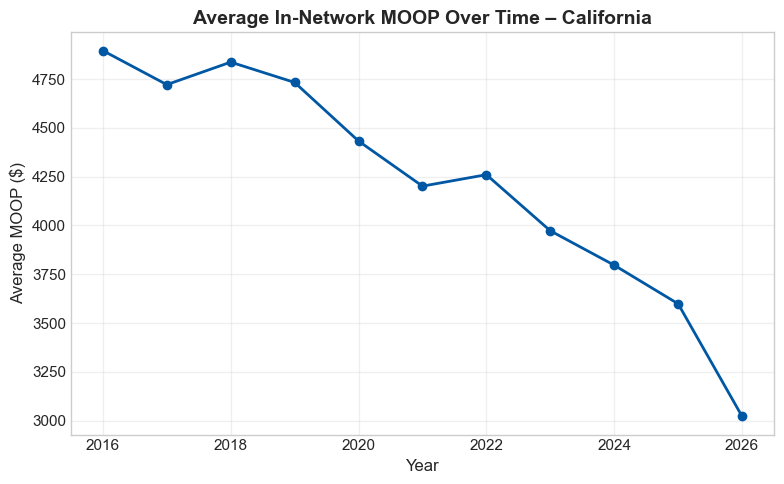

In [363]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Filter to California rows only
df_ca = landscape[landscape["State"] == "California"]

# 2. Compute average MOOP by year
moop_by_year = (
    df_ca.groupby("Contract Year")["In-network MOOP Amount"]
         .mean()
         .reset_index()
)

print("Average MOOP by Year (California):")
print(moop_by_year)

# 3. Plot the trend
plt.figure(figsize=(8,5))
plt.plot(
    moop_by_year["Contract Year"],
    moop_by_year["In-network MOOP Amount"],
    marker="o",
    linewidth=2,
    color="#0057A3"
)

plt.title("Average In-Network MOOP Over Time – California", fontsize=14, fontweight="bold")
plt.xlabel("Year")
plt.ylabel("Average MOOP ($)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


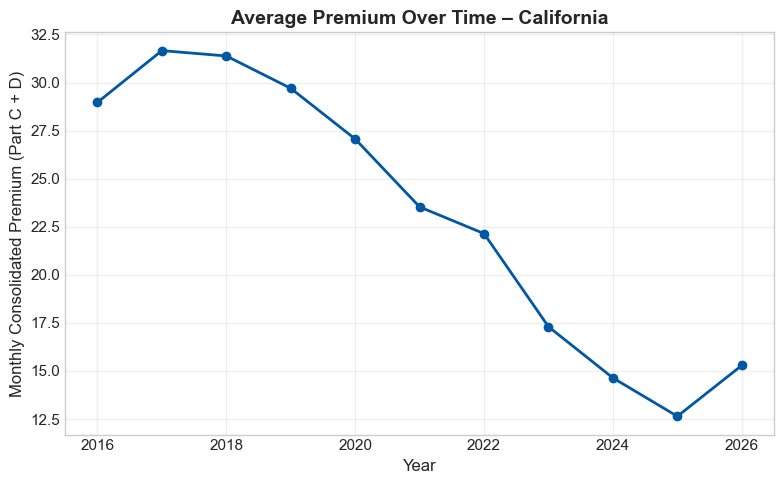

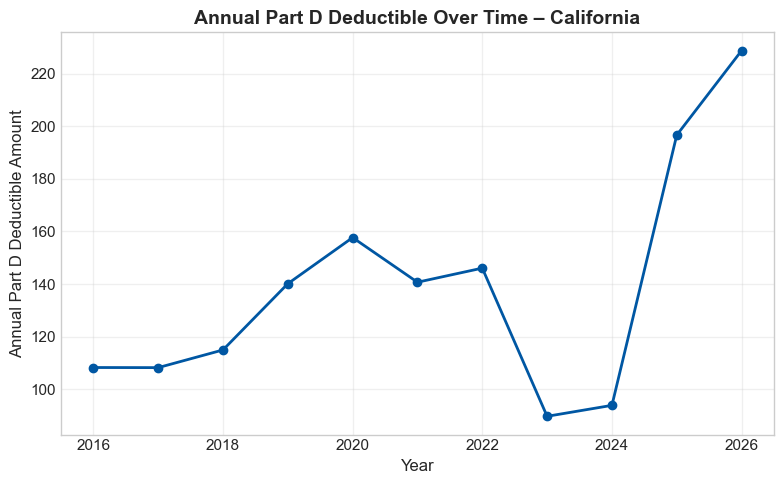

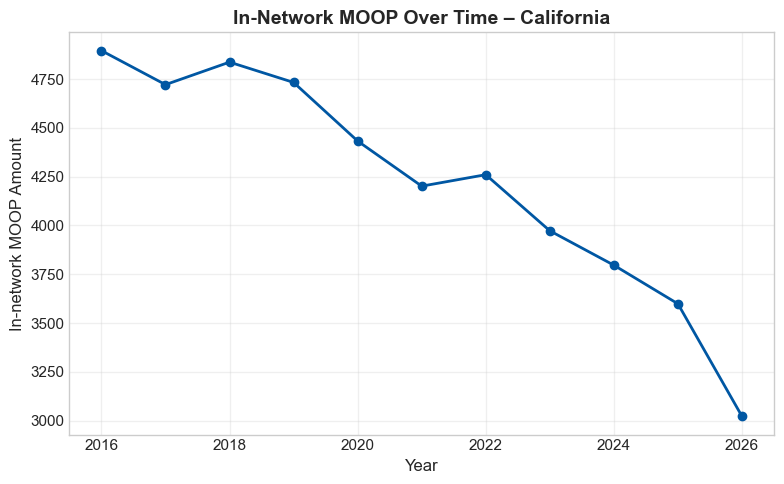

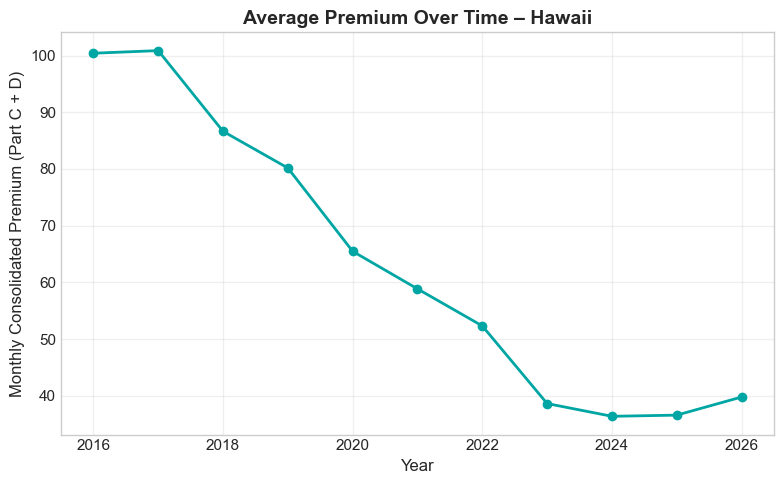

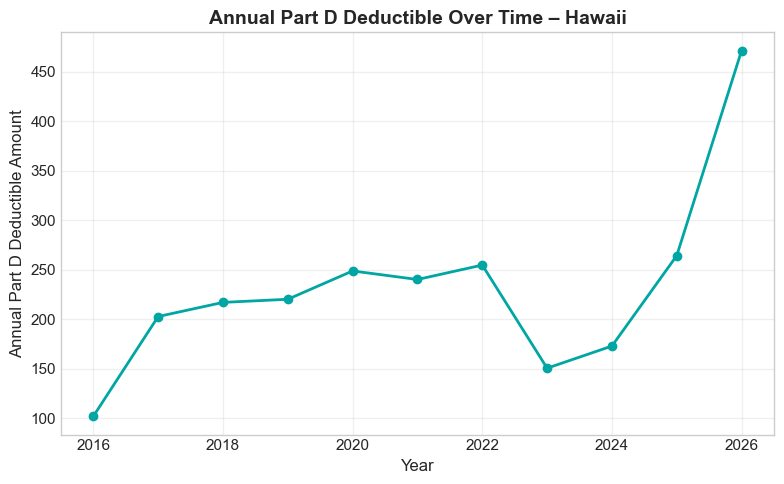

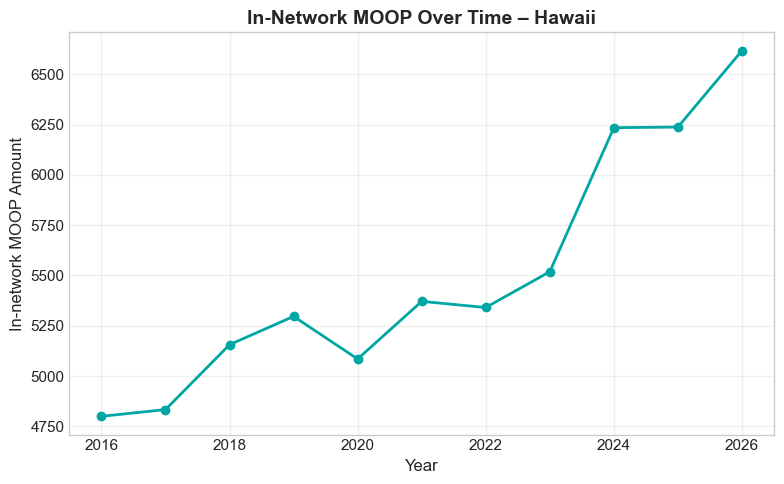

In [366]:
import pandas as pd
import matplotlib.pyplot as plt

# Kaiser colors
KAISER_BLUE = "#0057A3"
KAISER_TEAL = "#00A6A3"

# --- Helper function to plot trends ---
def plot_trend(landscape, state, column, title):
    df_state = landscape[landscape["State"] == state]
    trend = df_state.groupby("Contract Year")[column].mean().reset_index()

    plt.figure(figsize=(8,5))
    plt.plot(
        trend["Contract Year"],
        trend[column],
        marker="o",
        linewidth=2,
        color=KAISER_BLUE if state=="California" else KAISER_TEAL
    )

    plt.title(f"{title} Over Time – {state}", fontsize=14, fontweight="bold")
    plt.xlabel("Year")
    plt.ylabel(column)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


# =======================
# 📌 CALIFORNIA GRAPHS
# =======================

plot_trend(landscape, "California",
           "Monthly Consolidated Premium (Part C + D)",
           "Average Premium")

plot_trend(landscape, "California",
           "Annual Part D Deductible Amount",
           "Annual Part D Deductible")

plot_trend(landscape, "California",
           "In-network MOOP Amount",
           "In-Network MOOP")


# =======================
# 📌 HAWAII GRAPHS
# =======================

plot_trend(landscape, "Hawaii",
           "Monthly Consolidated Premium (Part C + D)",
           "Average Premium")

plot_trend(landscape, "Hawaii",
           "Annual Part D Deductible Amount",
           "Annual Part D Deductible")

plot_trend(landscape, "Hawaii",
           "In-network MOOP Amount",
           "In-Network MOOP")


In [189]:
#change year to int 
landscape["Contract Year"]= landscape["Contract Year"].astype(int)

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#seting theme
sns.set(style="whitegrid", palette="Set2")

array([[<Axes: title={'center': 'Monthly Consolidated Premium (Part C + D)'}>,
        <Axes: title={'center': 'Annual Part D Deductible Amount'}>,
        <Axes: title={'center': 'In-network MOOP Amount'}>],
       [<Axes: title={'center': 'Overall Star Rating'}>,
        <Axes: title={'center': 'Contract Year'}>,
        <Axes: title={'center': 'Total Beneficiary Cost Exposure'}>],
       [<Axes: title={'center': 'Zero Monthly Premium Indicator'}>,
        <Axes: title={'center': 'Benefit Richness Index'}>, <Axes: >]],
      dtype=object)

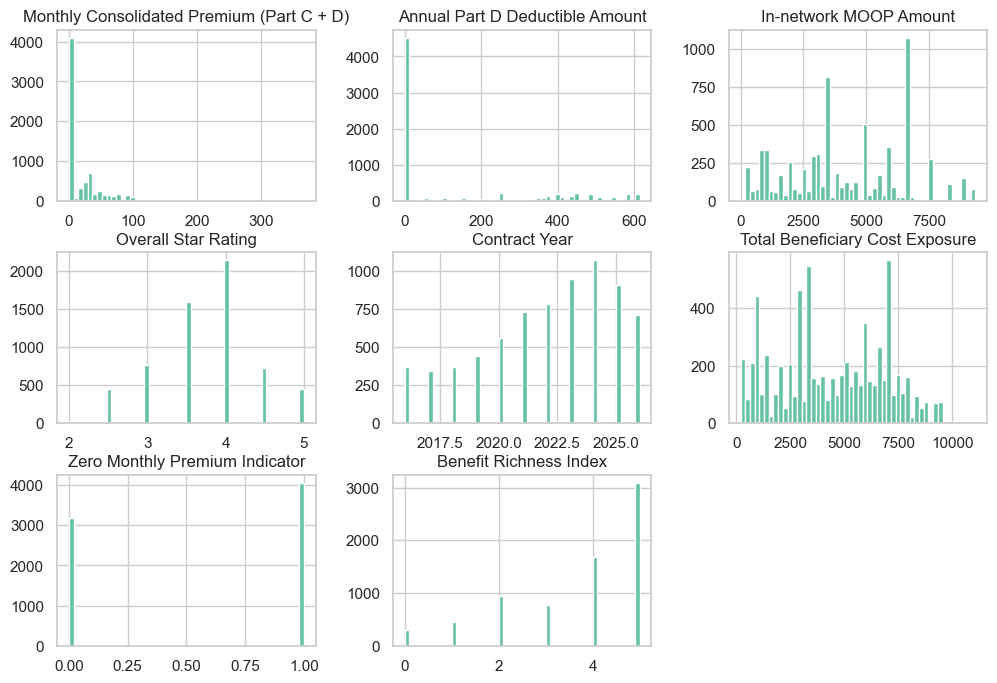

In [191]:
#Looking at the distribution of all numeric columns in the landscape data
landscape.hist(bins= 50, figsize= (12,8))

Comments on the graph: 


In [192]:
# Most plans have $0–$50 monthly premiums, showing that zero-premium MA plans dominate the market.
# Annual Part D deductibles cluster near $0, but a few plans reach the 500–600 range, indicating wide variation in drug benefit design.
# In-network MOOP values mostly fall between $3,000–$7,000, reflecting typical out-of-pocket caps set by CMS.
# Star Ratings are concentrated around 3.5–4.5, suggesting moderate-to-high plan quality across years.
# The number of plans increases steadily from 2016–2024, reflecting MA market expansion over time.

EDA for more variables

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#seting theme
sns.set(style="whitegrid", palette="Set2")

In [194]:
landscape.head()

State   County          Organization Name  Plan Type  \
0  California  Alameda          United Healthcare  Local HMO   
1  California  Alameda  Blue Shield Of California  Local HMO   
2  California  Alameda              Brand New Day  Local HMO   
3  California  Alameda              Brand New Day  Local HMO   
4  California  Alameda                 Health Net  Local HMO   

   Monthly Consolidated Premium (Part C + D)  Annual Part D Deductible Amount  \
0                                        0.0                            360.0   
1                                       32.0                              0.0   
2                                        0.0                              0.0   
3                                       12.0                            360.0   
4                                      163.0                              0.0   

  Drug Benefit Category Contract ID Plan ID  In-network MOOP Amount  \
0                 Basic       H5619      24                  6700.0   
1              Enhanced       H5928      24                  6700.0   
2              Enhanced       H5087      11                  6700.0   
3              Enhanced       H5087       2                  6700.0   
4              Enhanced       H0562      68                  3400.0   

   Overall Star Rating  Contract Year  Total Beneficiary Cost Exposure  \
0                  4.0           2016                           6700.0   
1                  3.5           2016                           7084.0   
2                  3.5           2016                           6700.0   
3                  3.5           2016                           6844.0   
4                  4.0           2016                           5356.0   

   Zero Monthly Premium Indicator  Benefit Richness Index  
0                               1                       1  
1                               0                       4  
2                               1                       4  
3                               0                       2  
4                               0                       5

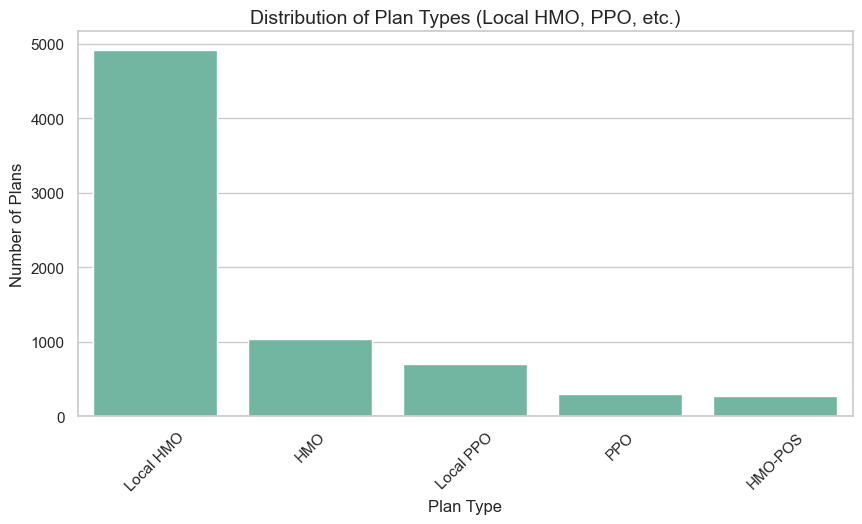

In [195]:
#Share of different plan types : Bar plot 
plt.figure(figsize=(10,5))
sns.countplot(data=landscape, x="Plan Type", order=landscape['Plan Type'].value_counts().index)
plt.title('Distribution of Plan Types (Local HMO, PPO, etc.)', fontsize=14)
plt.xlabel('Plan Type')
plt.ylabel('Number of Plans')
plt.xticks(rotation=45)
plt.show()


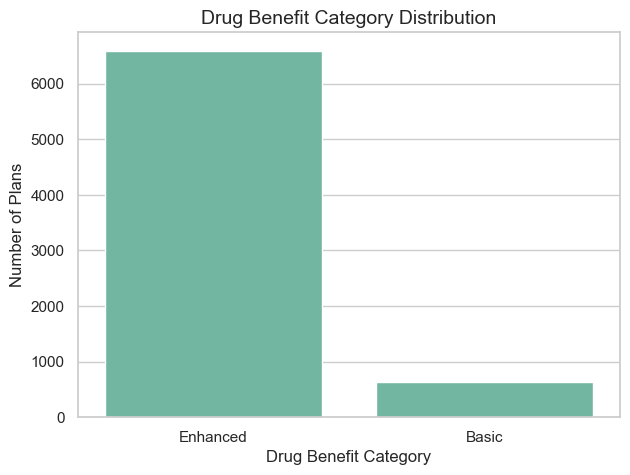

In [196]:
#Different Drig benefit categories
plt.figure(figsize=(7,5))
sns.countplot(data=landscape, x='Drug Benefit Category', order=landscape['Drug Benefit Category'].value_counts().index)
plt.title('Drug Benefit Category Distribution', fontsize=14)
plt.xlabel('Drug Benefit Category')
plt.ylabel('Number of Plans')
plt.show()


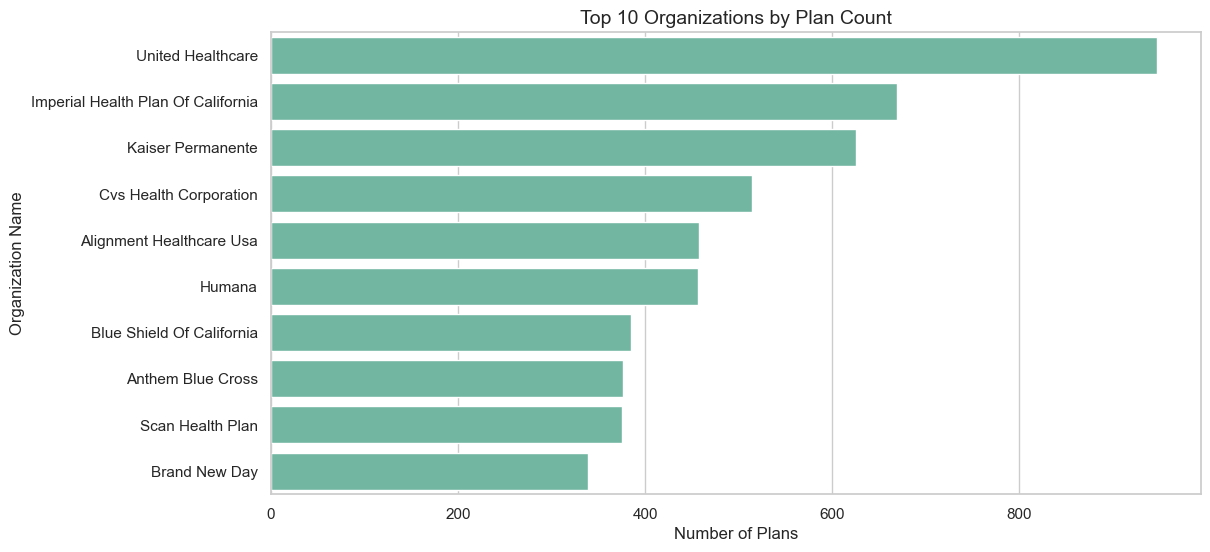

In [197]:
#Top 10 Insurers

top_orgs = landscape['Organization Name'].value_counts().nlargest(10).index
plt.figure(figsize=(12,6))
sns.countplot(data=landscape[landscape['Organization Name'].isin(top_orgs)],
              y='Organization Name',
              order=top_orgs)
plt.title('Top 10 Organizations by Plan Count', fontsize=14)
plt.xlabel('Number of Plans')
plt.ylabel('Organization Name')
plt.show()

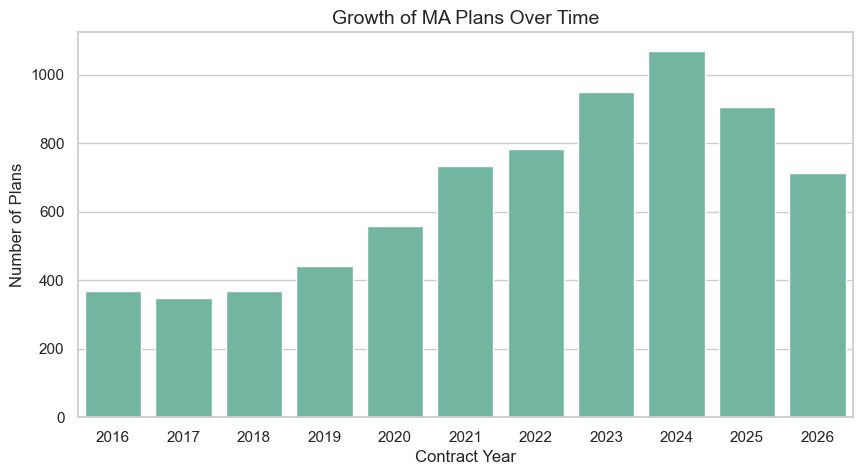

In [198]:
#Time trend of MA plans 

plt.figure(figsize=(10,5))
sns.countplot(data=landscape, x='Contract Year', order=sorted(landscape['Contract Year'].unique()))
plt.title('Growth of MA Plans Over Time', fontsize=14)
plt.xlabel('Contract Year')
plt.ylabel('Number of Plans')
plt.show()

Text(0.5, 1.0, 'Average Star Ratings Over Time')

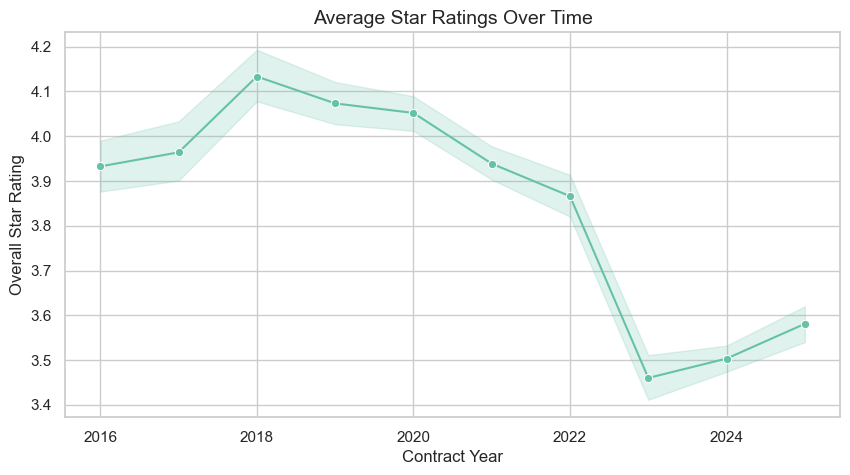

In [199]:
#Time trend of Average Star Ratings

plt.figure(figsize=(10,5))
sns.lineplot(data=landscape, x='Contract Year', y='Overall Star Rating', marker='o')
plt.title('Average Star Ratings Over Time', fontsize=14)


## HEDIS SCORE 

Text(0.5, 1.0, 'Average HEDIS Rates Over Time')

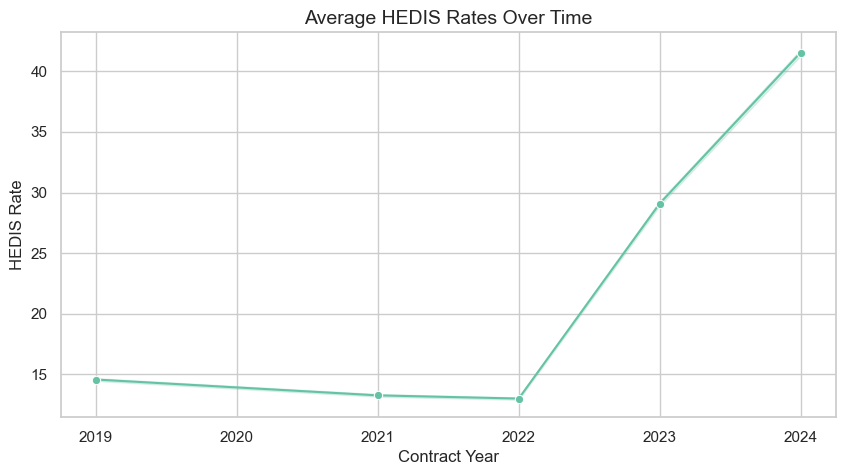

In [200]:
#Time Trend of HEDIS scores

plt.figure(figsize=(10,5))
sns.lineplot(data=hedis, x='Contract Year', y='HEDIS Rate', marker='o')
plt.title('Average HEDIS Rates Over Time', fontsize=14)

## Disenrollment reasons

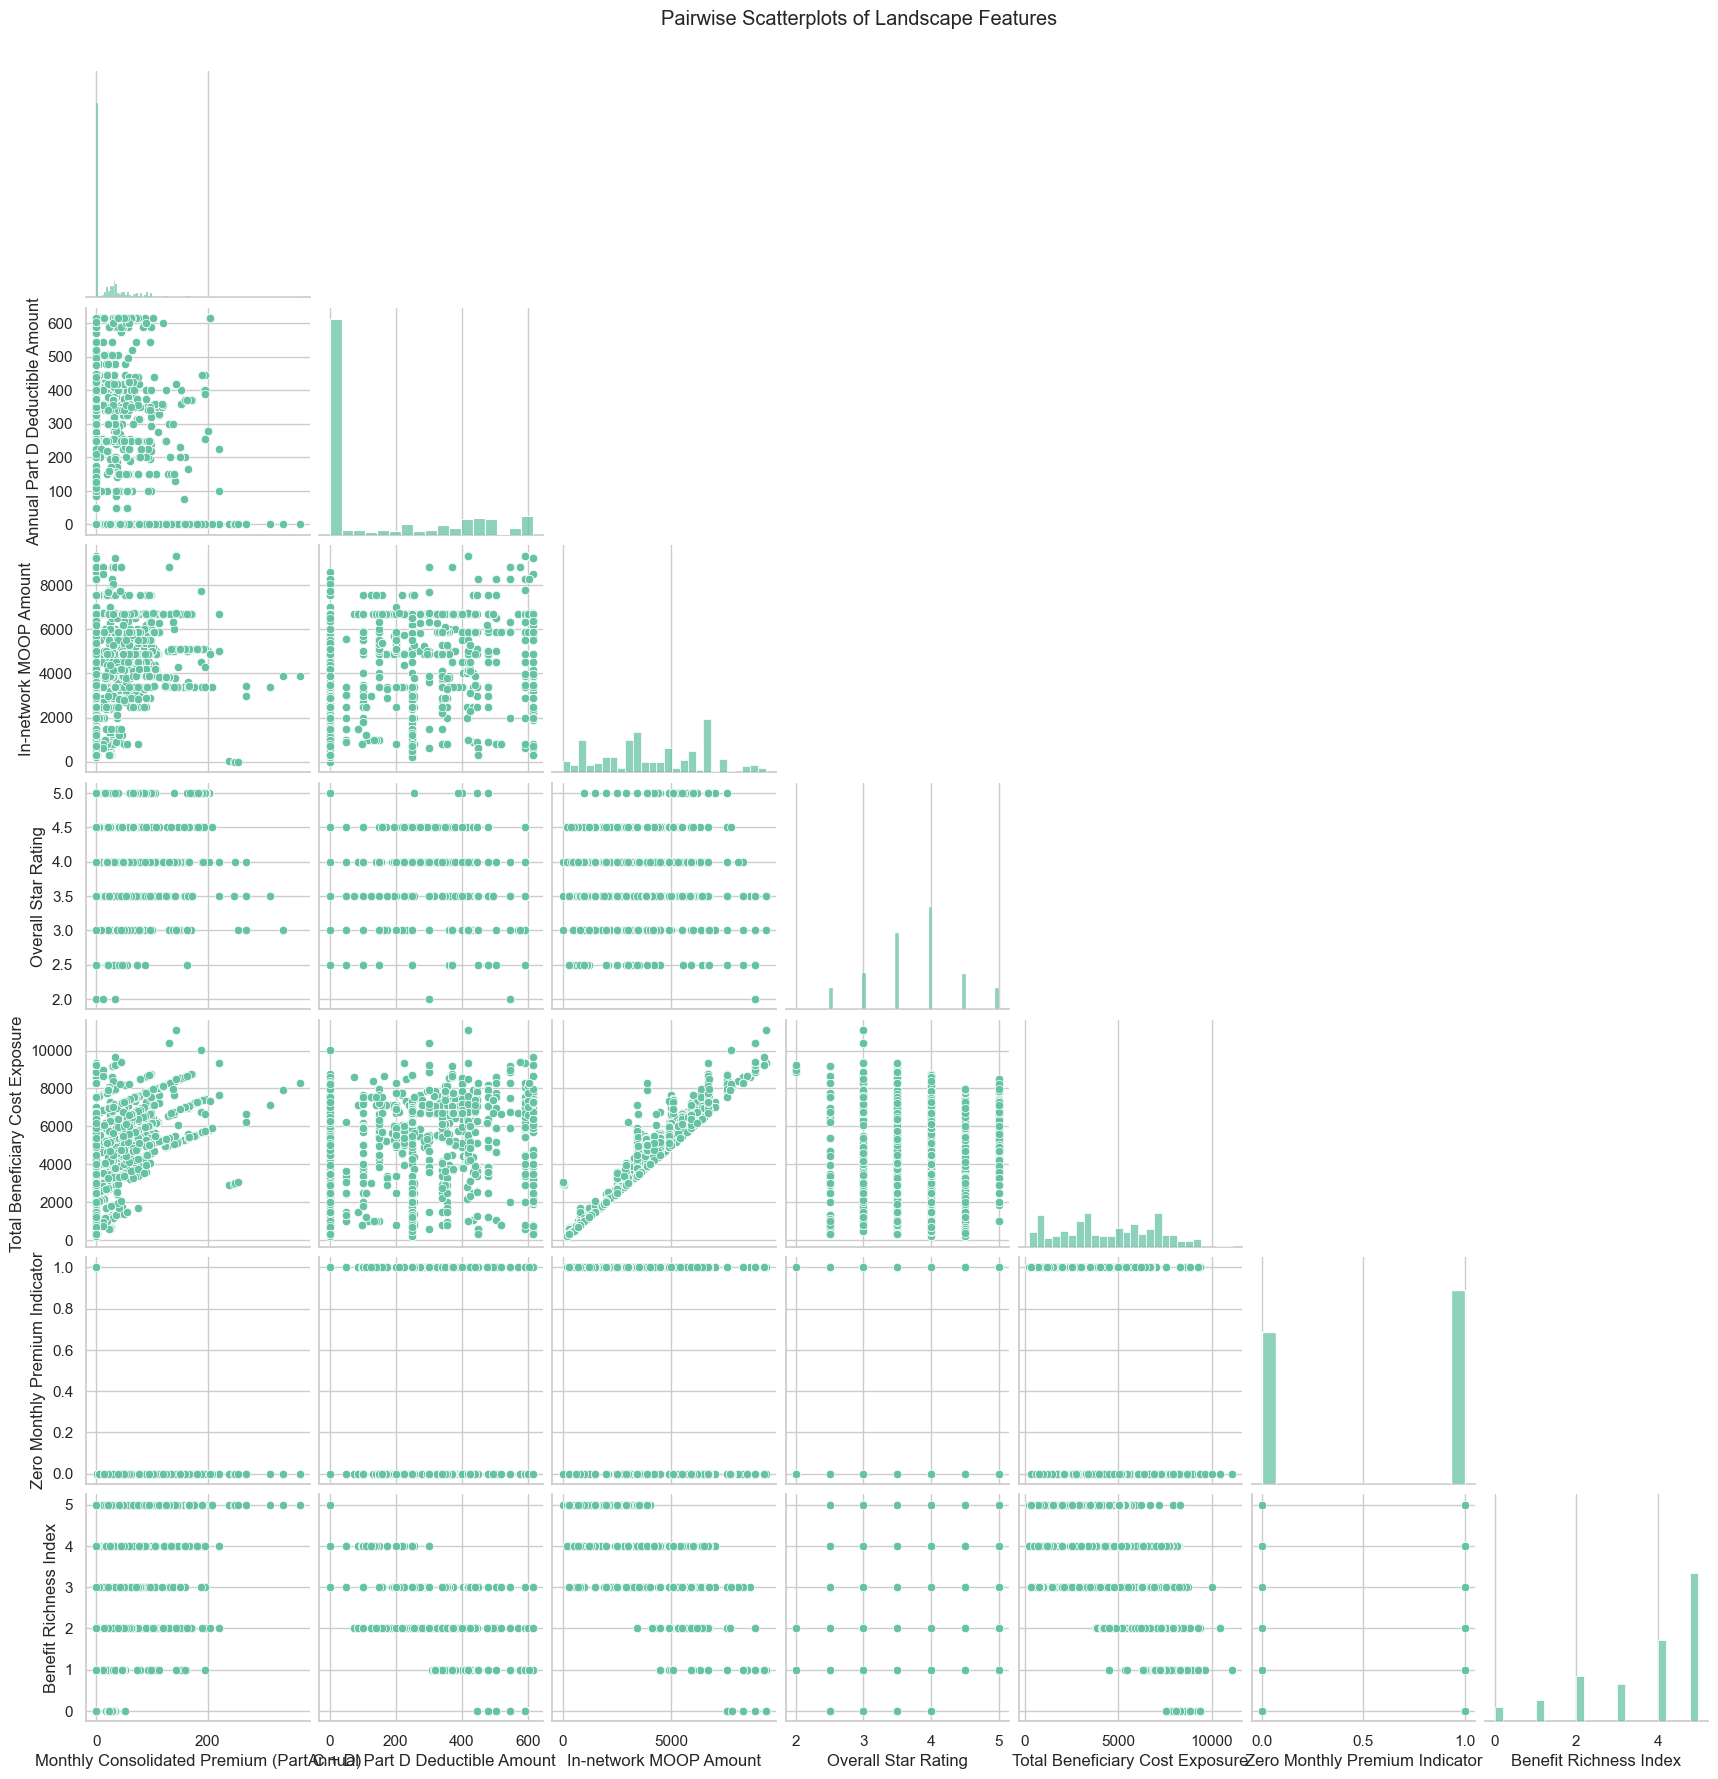

In [201]:
#SNS Pairplot to see if there are any linear relationships 

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = landscape.select_dtypes(include=["float64", "int64"])

# Pairplot: scatter plots for all numeric pairs
sns.pairplot(numeric_cols, diag_kind="hist", corner=True)
plt.suptitle("Pairwise Scatterplots of Landscape Features", y=1.02)
plt.show()


## Enrollment data

In [202]:
all_enrollment.head()

County State Contract ID   Plan Type  Enrolled    Month  Year  \
0  Alameda    CA       H0504  HMO/HMOPOS      71.0  January  2016   
1  Alameda    CA       H0524  HMO/HMOPOS   74506.0  January  2016   
2  Alameda    CA       H0543  HMO/HMOPOS    5392.0  January  2016   
3  Alameda    CA       H0544  HMO/HMOPOS      13.0  January  2016   
4  Alameda    CA       H0562  HMO/HMOPOS    5133.0  January  2016   

                     Organization       Date  
0  California Physicians' Service 2016-01-01  
1               Kaiser Permanente 2016-01-01  
2               Uhc Of California 2016-01-01  
3                 CareMore Health 2016-01-01  
4                      Health Net 2016-01-01

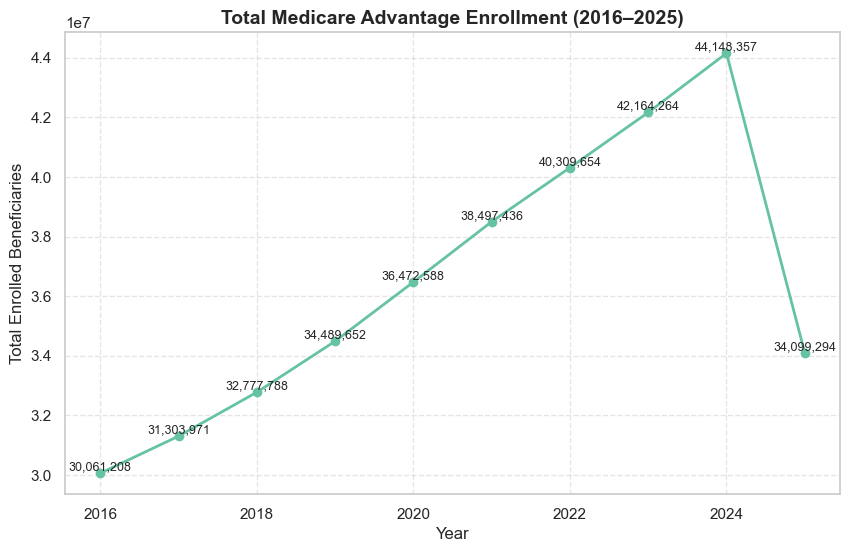

In [203]:
#Generic enrollment growth trends
import matplotlib.pyplot as plt

# If needed: ensure Year column is numeric
all_enrollment['Year'] = all_enrollment['Year'].astype(int)

# Group by year and sum enrollment
enrollment_trend = all_enrollment.groupby('Year')['Enrolled'].sum().reset_index()

# Plot
plt.figure(figsize=(10,6))
plt.plot(enrollment_trend['Year'], enrollment_trend['Enrolled'], marker='o', linewidth=2)

plt.title('Total Medicare Advantage Enrollment (2016–2025)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Enrolled Beneficiaries', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Annotate growth trend
for x, y in zip(enrollment_trend['Year'], enrollment_trend['Enrolled']):
    plt.text(x, y, f'{int(y):,}', ha='center', va='bottom', fontsize=9)

plt.show()


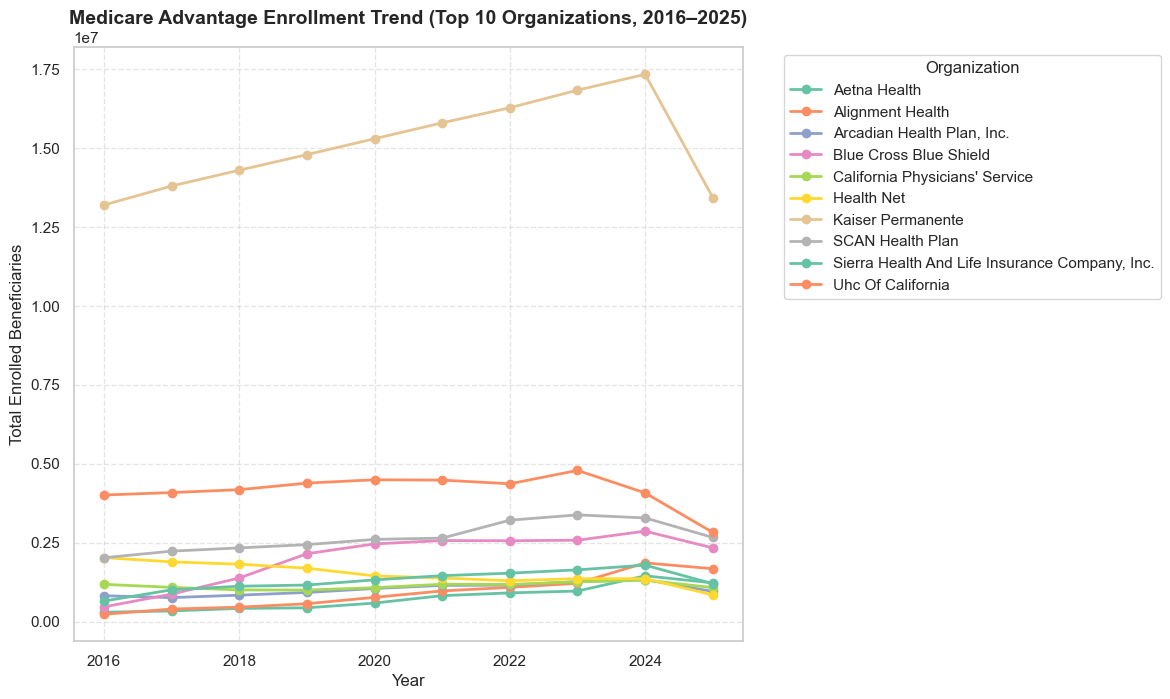

In [204]:
#Enrollment growth trend for top 10 organizations 
import matplotlib.pyplot as plt

# Ensure Year column is numeric
all_enrollment['Year'] = all_enrollment['Year'].astype(int)

# --- Step 1: Identify top 10 organizations by total enrollment ---
top_orgs = (all_enrollment.groupby('Organization')['Enrolled']
            .sum()
            .sort_values(ascending=False)
            .head(10)
            .index)

# --- Step 2: Filter dataset for only top 10 organizations ---
top_org_data = all_enrollment[all_enrollment['Organization'].isin(top_orgs)]

# --- Step 3: Group by Year and Organization ---
org_year_trend = (top_org_data.groupby(['Year', 'Organization'])['Enrolled']
                  .sum()
                  .reset_index())

# --- Step 4: Plot ---
plt.figure(figsize=(12,7))

for org in org_year_trend['Organization'].unique():
    org_data = org_year_trend[org_year_trend['Organization'] == org]
    plt.plot(org_data['Year'], org_data['Enrolled'], marker='o', linewidth=2, label=org)

plt.title('Medicare Advantage Enrollment Trend (Top 10 Organizations, 2016–2025)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Enrolled Beneficiaries', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Organization', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Enrollment Numbers Over Time (CA vs HI)

In [205]:
# Convert Month name to month number
month_order = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

enrollment_ca_monthly['Month_num'] = enrollment_ca_monthly['Month'].map(month_order)
enrollment_hi_monthly['Month_num'] = enrollment_hi_monthly['Month'].map(month_order)

# Recreate proper date column
enrollment_ca_monthly['Date'] = pd.to_datetime(
    enrollment_ca_monthly['Year'].astype(str) + '-' + enrollment_ca_monthly['Month_num'].astype(str) + '-01'
)
enrollment_hi_monthly['Date'] = pd.to_datetime(
    enrollment_hi_monthly['Year'].astype(str) + '-' + enrollment_hi_monthly['Month_num'].astype(str) + '-01'
)

# Sort by date
enrollment_ca_monthly = enrollment_ca_monthly.sort_values('Date')
enrollment_hi_monthly = enrollment_hi_monthly.sort_values('Date')


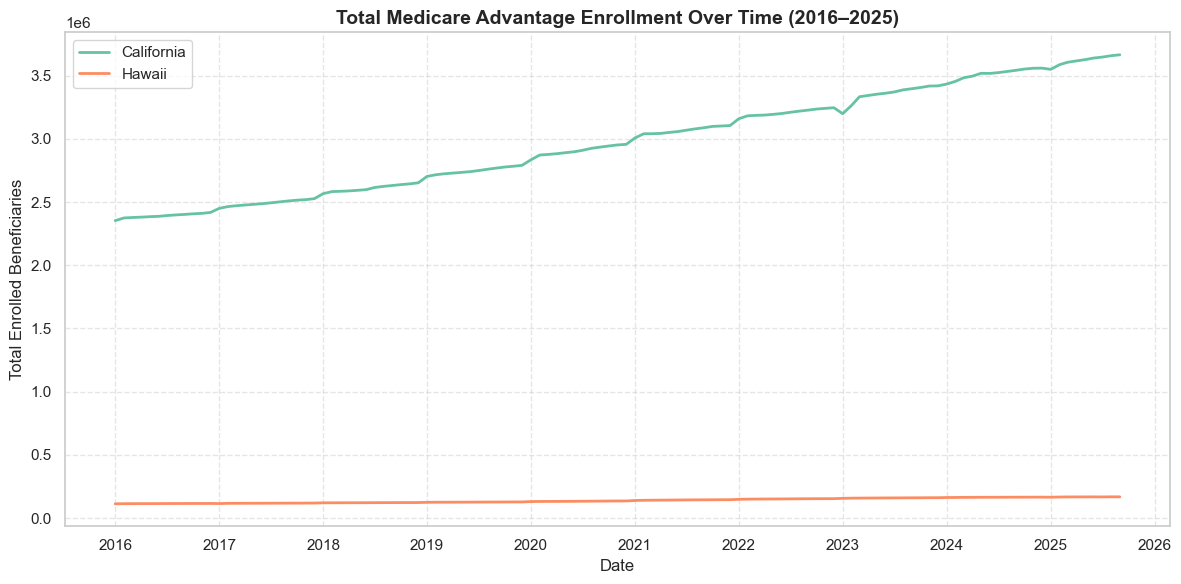

In [206]:
#Plotting total enrollment
plt.figure(figsize= (12,6))
plt.plot(enrollment_ca_monthly["Date"], enrollment_ca_monthly["Enrolled"], label= "California", linewidth= 2)
plt.plot(enrollment_hi_monthly["Date"], enrollment_hi_monthly["Enrolled"], label= "Hawaii", linewidth= 2)

plt.title("Total Medicare Advantage Enrollment Over Time (2016–2025)", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Enrolled Beneficiaries", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [207]:
import plotly.graph_objects as go

fig = go.Figure()

# California line
fig.add_trace(go.Scatter(
    x=enrollment_ca_monthly["Date"],
    y=enrollment_ca_monthly["Enrolled"],
    mode='lines',
    name='California',
    line=dict(color='blue')
))

# Hawaii line
fig.add_trace(go.Scatter(
    x=enrollment_hi_monthly["Date"],
    y=enrollment_hi_monthly["Enrolled"],
    mode='lines',
    name='Hawaii',
    line=dict(color='red')
))

# Layout
fig.update_layout(
    title="Total Medicare Advantage Enrollment Over Time (2016–2025)",
    xaxis_title="Date",
    yaxis_title="Total Enrolled Beneficiaries",
    hovermode="x unified",
    template="plotly_white",
    width=3000,       # 👈 make it very wide
    height=600,       # adjust height as needed
)

# Show only monthly ticks
fig.update_xaxes(
    tickformat="%b %Y",
    dtick="M1",
    tickangle=45
)

# Enable horizontal panning and zooming
fig.show(config={'scrollZoom': True})




Enrollment Growth Rate (%) Over Time

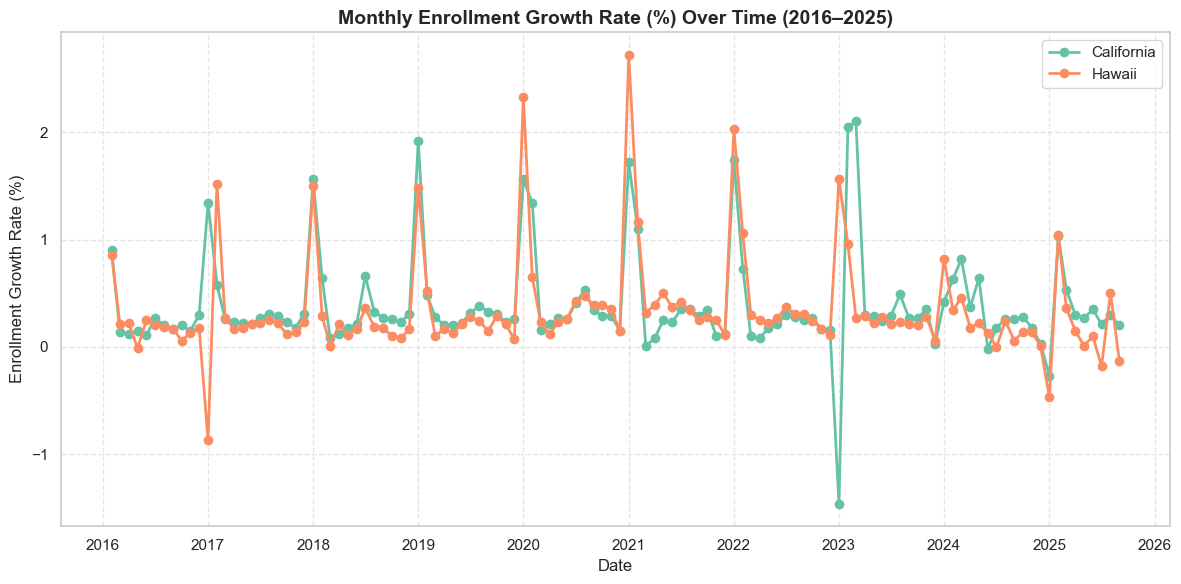

In [208]:
plt.figure(figsize=(12,6))
plt.plot(enrollment_ca_monthly['Date'], enrollment_ca_monthly['Enrollment Rate (%)'], marker='o', label='California', linewidth=2)
plt.plot(enrollment_hi_monthly['Date'], enrollment_hi_monthly['Enrollment Rate (%)'], marker='o', label='Hawaii', linewidth=2)

plt.title("Monthly Enrollment Growth Rate (%) Over Time (2016–2025)", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Enrollment Growth Rate (%)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [209]:
import plotly.graph_objects as go

fig = go.Figure()

# California line
fig.add_trace(go.Scatter(
    x=enrollment_ca_monthly["Date"],
    y=enrollment_ca_monthly["Enrollment Rate (%)"],
    mode='lines+markers',
    name='California',
    line=dict(width=2, color='blue'),
    marker=dict(size=6)
))

# Hawaii line
fig.add_trace(go.Scatter(
    x=enrollment_hi_monthly["Date"],
    y=enrollment_hi_monthly["Enrollment Rate (%)"],
    mode='lines+markers',
    name='Hawaii',
    line=dict(width=2, color='red'),
    marker=dict(size=6)
))

# Layout
fig.update_layout(
    title="Monthly Enrollment Growth Rate (%) Over Time (2016–2025)",
    xaxis_title="Date",
    yaxis_title="Enrollment Growth Rate (%)",
    hovermode="x unified",
    template="plotly_white",
    width=3000,    # 👈 make it wide so you can scroll
    height=600,
    font=dict(size=12)
)

# Monthly ticks
fig.update_xaxes(
    tickformat="%b %Y",
    dtick="M1",
    tickangle=45,
    showgrid=True
)

# Enable horizontal panning (scroll)
fig.show(config={'scrollZoom': True})


In [210]:
enrollment_hi_monthly

Year      Month  Enrolled  Month_num       Date  Enrollment Rate (%)
4    2016    January  112605.0          1 2016-01-01                  NaN
3    2016   February  113573.0          2 2016-02-01                 0.86
7    2016      March  113809.0          3 2016-03-01                 0.21
0    2016      April  114057.0          4 2016-04-01                 0.22
8    2016        May  114040.0          5 2016-05-01                -0.01
..    ...        ...       ...        ...        ...                  ...
115  2025        May  167136.0          5 2025-05-01                 0.01
113  2025       June  167302.0          6 2025-06-01                 0.10
112  2025       July  166997.0          7 2025-07-01                -0.18
109  2025     August  167827.0          8 2025-08-01                 0.50
116  2025  September  167608.0          9 2025-09-01                -0.13

[117 rows x 6 columns]

# Problem statement 1- Enrollment data

## Policy 1 :  Contract Year 2020 Medicare Advantage and Part D Flexibility Final Rule (CMS-4185-F) measured for Enrollment Rate (%)

1. for CA

                               OLS Regression Results                               
Dep. Variable:     Q("Enrollment Rate (%)")   R-squared:                       0.019
Model:                                  OLS   Adj. R-squared:                 -0.007
Method:                       Least Squares   F-statistic:                     4.147
Date:                      Mon, 08 Dec 2025   Prob (F-statistic):            0.00792
Time:                              16:09:50   Log-Likelihood:                -74.032
No. Observations:                       116   AIC:                             156.1
Df Residuals:                           112   BIC:                             167.1
Df Model:                                 3                                         
Covariance Type:                        HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

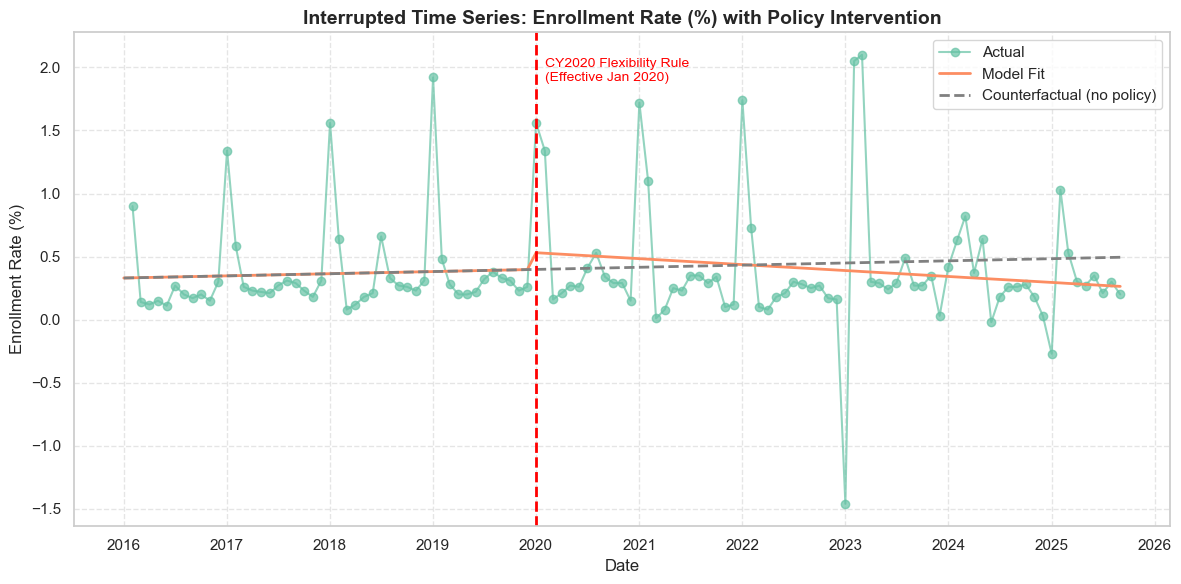

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ===============================
# USER INPUT
# ===============================
data = enrollment_ca_monthly.copy()   
policy_date = pd.Timestamp('2020-01-01')
y_variable = 'Enrollment Rate (%)'     # Dependent variable

# ===============================
# CREATE TIME VARIABLES
# ===============================
data = data.sort_values('Date').reset_index(drop=True)
data['t'] = np.arange(len(data))
data['post'] = (data['Date'] >= policy_date).astype(int)
t0 = data.loc[data['Date'] >= policy_date, 't'].min()
data['after_t'] = (data['t'] - t0 + 1).where(data['post'] == 1, 0)

# ===============================
# OLS REGRESSION MODEL
# ===============================
model = smf.ols(f'Q("{y_variable}") ~ t + post + after_t', data=data).fit(cov_type='HAC', cov_kwds={'maxlags':12})
print(model.summary())

# ===============================
# CREATE FITTED & COUNTERFACTUAL VALUES
# ===============================
data['fitted'] = model.predict(data)

cf = data.copy()
cf['post'] = 0
cf['after_t'] = 0
data['counterfactual'] = model.predict(cf)

# ===============================
# PLOTTING
# ===============================
plt.figure(figsize=(12,6))

# Actual vs Fitted vs Counterfactual
plt.plot(data['Date'], data[y_variable], 'o-', label='Actual', alpha=0.7)
plt.plot(data['Date'], data['fitted'], '-', label='Model Fit', linewidth=2)
plt.plot(data['Date'], data['counterfactual'], '--', color='gray', linewidth=2, label='Counterfactual (no policy)')

# Policy intervention line
plt.axvline(policy_date, color='red', linestyle='--', linewidth=2)
plt.text(policy_date + pd.Timedelta(days=30),
         data[y_variable].max()*0.9,
         'CY2020 Flexibility Rule\n(Effective Jan 2020)',
         color='red', fontsize=10)

# Formatting
plt.title(f'Interrupted Time Series: {y_variable} with Policy Intervention', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel(y_variable)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


2. for HI

                               OLS Regression Results                               
Dep. Variable:     Q("Enrollment Rate (%)")   R-squared:                       0.108
Model:                                  OLS   Adj. R-squared:                  0.084
Method:                       Least Squares   F-statistic:                     12.47
Date:                      Mon, 08 Dec 2025   Prob (F-statistic):           4.29e-07
Time:                              16:09:51   Log-Likelihood:                -70.973
No. Observations:                       116   AIC:                             149.9
Df Residuals:                           112   BIC:                             161.0
Df Model:                                 3                                         
Covariance Type:                        HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

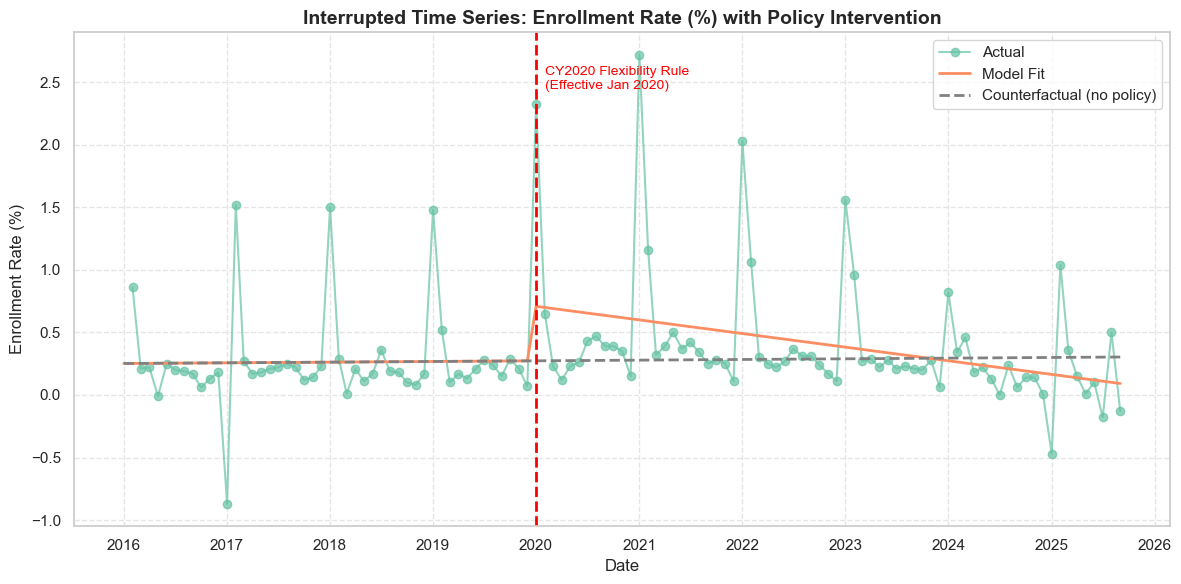

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ===============================
# USER INPUT
# ===============================
data = enrollment_hi_monthly.copy()   
policy_date = pd.Timestamp('2020-01-01')
y_variable = 'Enrollment Rate (%)'     # Dependent variable

# ===============================
# CREATE TIME VARIABLES
# ===============================
data = data.sort_values('Date').reset_index(drop=True)
data['t'] = np.arange(len(data))
data['post'] = (data['Date'] >= policy_date).astype(int)
t0 = data.loc[data['Date'] >= policy_date, 't'].min()
data['after_t'] = (data['t'] - t0 + 1).where(data['post'] == 1, 0)

# ===============================
# OLS REGRESSION MODEL
# ===============================
model = smf.ols(f'Q("{y_variable}") ~ t + post + after_t', data=data).fit(cov_type='HAC', cov_kwds={'maxlags':12})
print(model.summary())

# ===============================
# CREATE FITTED & COUNTERFACTUAL VALUES
# ===============================
data['fitted'] = model.predict(data)

cf = data.copy()
cf['post'] = 0
cf['after_t'] = 0
data['counterfactual'] = model.predict(cf)

# ===============================
# PLOTTING
# ===============================
plt.figure(figsize=(12,6))

# Actual vs Fitted vs Counterfactual
plt.plot(data['Date'], data[y_variable], 'o-', label='Actual', alpha=0.7)
plt.plot(data['Date'], data['fitted'], '-', label='Model Fit', linewidth=2)
plt.plot(data['Date'], data['counterfactual'], '--', color='gray', linewidth=2, label='Counterfactual (no policy)')

# Policy intervention line
plt.axvline(policy_date, color='red', linestyle='--', linewidth=2)
plt.text(policy_date + pd.Timedelta(days=30),
         data[y_variable].max()*0.9,
         'CY2020 Flexibility Rule\n(Effective Jan 2020)',
         color='red', fontsize=10)

# Formatting
plt.title(f'Interrupted Time Series: {y_variable} with Policy Intervention', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel(y_variable)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Policy 2 :  Contract Year 2022 MA and Part D Final Rule (CMS-4190-F)

1. For CA

                               OLS Regression Results                               
Dep. Variable:     Q("Enrollment Rate (%)")   R-squared:                       0.009
Model:                                  OLS   Adj. R-squared:                 -0.017
Method:                       Least Squares   F-statistic:                     2.570
Date:                      Mon, 08 Dec 2025   Prob (F-statistic):             0.0579
Time:                              16:09:53   Log-Likelihood:                -74.592
No. Observations:                       116   AIC:                             157.2
Df Residuals:                           112   BIC:                             168.2
Df Model:                                 3                                         
Covariance Type:                        HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

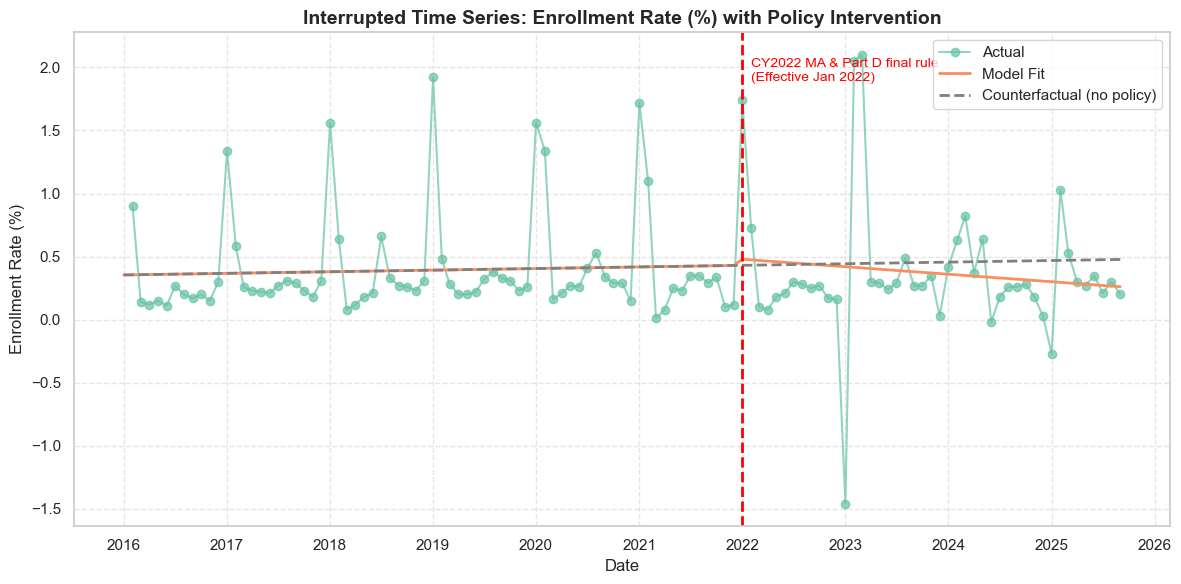

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ===============================
# USER INPUT
# ===============================
data = enrollment_ca_monthly.copy()   
policy_date = pd.Timestamp('2022-01-01')
y_variable = 'Enrollment Rate (%)'     # Dependent variable

# ===============================
# CREATE TIME VARIABLES
# ===============================
data = data.sort_values('Date').reset_index(drop=True)
data['t'] = np.arange(len(data))
data['post'] = (data['Date'] >= policy_date).astype(int)
t0 = data.loc[data['Date'] >= policy_date, 't'].min()
data['after_t'] = (data['t'] - t0 + 1).where(data['post'] == 1, 0)

# ===============================
# OLS REGRESSION MODEL
# ===============================
model = smf.ols(f'Q("{y_variable}") ~ t + post + after_t', data=data).fit(cov_type='HAC', cov_kwds={'maxlags':12})
print(model.summary())

# ===============================
# CREATE FITTED & COUNTERFACTUAL VALUES
# ===============================
data['fitted'] = model.predict(data)

cf = data.copy()
cf['post'] = 0
cf['after_t'] = 0
data['counterfactual'] = model.predict(cf)

# ===============================
# PLOTTING
# ===============================
plt.figure(figsize=(12,6))

# Actual vs Fitted vs Counterfactual
plt.plot(data['Date'], data[y_variable], 'o-', label='Actual', alpha=0.7)
plt.plot(data['Date'], data['fitted'], '-', label='Model Fit', linewidth=2)
plt.plot(data['Date'], data['counterfactual'], '--', color='gray', linewidth=2, label='Counterfactual (no policy)')

# Policy intervention line
plt.axvline(policy_date, color='red', linestyle='--', linewidth=2)
plt.text(policy_date + pd.Timedelta(days=30),
         data[y_variable].max()*0.9,
         'CY2022 MA & Part D final rule\n(Effective Jan 2022)',
         color='red', fontsize=10)

# Formatting
plt.title(f'Interrupted Time Series: {y_variable} with Policy Intervention', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel(y_variable)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


2. for HI

                               OLS Regression Results                               
Dep. Variable:     Q("Enrollment Rate (%)")   R-squared:                       0.081
Model:                                  OLS   Adj. R-squared:                  0.057
Method:                       Least Squares   F-statistic:                     11.07
Date:                      Mon, 08 Dec 2025   Prob (F-statistic):           2.02e-06
Time:                              16:09:54   Log-Likelihood:                -72.670
No. Observations:                       116   AIC:                             153.3
Df Residuals:                           112   BIC:                             164.4
Df Model:                                 3                                         
Covariance Type:                        HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

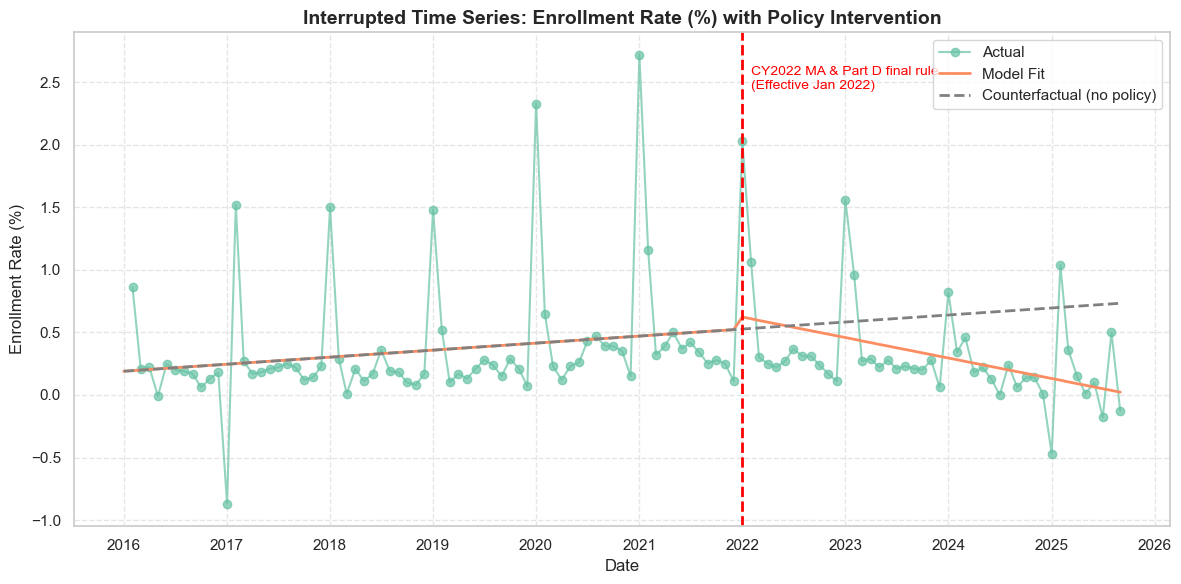

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ===============================
# USER INPUT
# ===============================
data = enrollment_hi_monthly.copy()   
policy_date = pd.Timestamp('2022-01-01')
y_variable = 'Enrollment Rate (%)'     # Dependent variable

# ===============================
# CREATE TIME VARIABLES
# ===============================
data = data.sort_values('Date').reset_index(drop=True)
data['t'] = np.arange(len(data))
data['post'] = (data['Date'] >= policy_date).astype(int)
t0 = data.loc[data['Date'] >= policy_date, 't'].min()
data['after_t'] = (data['t'] - t0 + 1).where(data['post'] == 1, 0)

# ===============================
# OLS REGRESSION MODEL
# ===============================
model = smf.ols(f'Q("{y_variable}") ~ t + post + after_t', data=data).fit(cov_type='HAC', cov_kwds={'maxlags':12})
print(model.summary())

# ===============================
# CREATE FITTED & COUNTERFACTUAL VALUES
# ===============================
data['fitted'] = model.predict(data)

cf = data.copy()
cf['post'] = 0
cf['after_t'] = 0
data['counterfactual'] = model.predict(cf)

# ===============================
# PLOTTING
# ===============================
plt.figure(figsize=(12,6))

# Actual vs Fitted vs Counterfactual
plt.plot(data['Date'], data[y_variable], 'o-', label='Actual', alpha=0.7)
plt.plot(data['Date'], data['fitted'], '-', label='Model Fit', linewidth=2)
plt.plot(data['Date'], data['counterfactual'], '--', color='gray', linewidth=2, label='Counterfactual (no policy)')

# Policy intervention line
plt.axvline(policy_date, color='red', linestyle='--', linewidth=2)
plt.text(policy_date + pd.Timedelta(days=30),
         data[y_variable].max()*0.9,
         'CY2022 MA & Part D final rule\n(Effective Jan 2022)',
         color='red', fontsize=10)

# Formatting
plt.title(f'Interrupted Time Series: {y_variable} with Policy Intervention', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel(y_variable)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Policy 3 :  2018 CMS “Medicare Advantage & Part D Final Rule | Policy Effective date- June 15 2018 (But using 2019-01-01 since that's when it became effectivew for operations)

1. for CA

                               OLS Regression Results                               
Dep. Variable:     Q("Enrollment Rate (%)")   R-squared:                       0.019
Model:                                  OLS   Adj. R-squared:                 -0.007
Method:                       Least Squares   F-statistic:                     4.018
Date:                      Mon, 08 Dec 2025   Prob (F-statistic):            0.00931
Time:                              16:09:55   Log-Likelihood:                -74.035
No. Observations:                       116   AIC:                             156.1
Df Residuals:                           112   BIC:                             167.1
Df Model:                                 3                                         
Covariance Type:                        HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

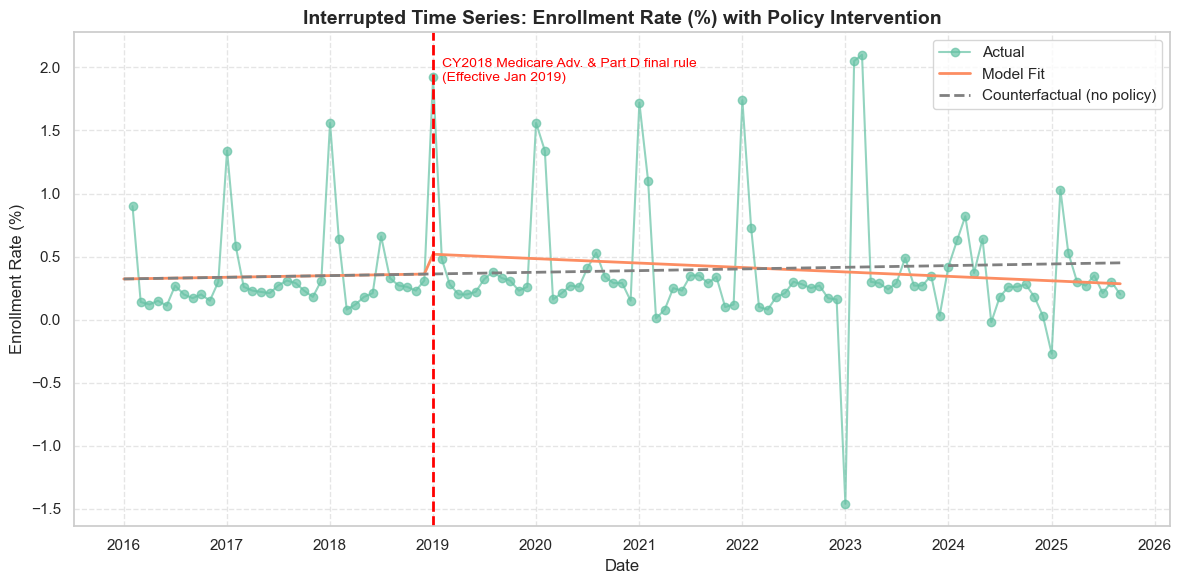

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ===============================
# USER INPUT
# ===============================
data = enrollment_ca_monthly.copy()   
policy_date = pd.Timestamp('2019-01-01')
y_variable = 'Enrollment Rate (%)'     # Dependent variable

# ===============================
# CREATE TIME VARIABLES
# ===============================
data = data.sort_values('Date').reset_index(drop=True)
data['t'] = np.arange(len(data))
data['post'] = (data['Date'] >= policy_date).astype(int)
t0 = data.loc[data['Date'] >= policy_date, 't'].min()
data['after_t'] = (data['t'] - t0 + 1).where(data['post'] == 1, 0)

# ===============================
# OLS REGRESSION MODEL
# ===============================
model = smf.ols(f'Q("{y_variable}") ~ t + post + after_t', data=data).fit(cov_type='HAC', cov_kwds={'maxlags':12})
print(model.summary())

# ===============================
# CREATE FITTED & COUNTERFACTUAL VALUES
# ===============================
data['fitted'] = model.predict(data)

cf = data.copy()
cf['post'] = 0
cf['after_t'] = 0
data['counterfactual'] = model.predict(cf)

# ===============================
# PLOTTING
# ===============================
plt.figure(figsize=(12,6))

# Actual vs Fitted vs Counterfactual
plt.plot(data['Date'], data[y_variable], 'o-', label='Actual', alpha=0.7)
plt.plot(data['Date'], data['fitted'], '-', label='Model Fit', linewidth=2)
plt.plot(data['Date'], data['counterfactual'], '--', color='gray', linewidth=2, label='Counterfactual (no policy)')

# Policy intervention line
plt.axvline(policy_date, color='red', linestyle='--', linewidth=2)
plt.text(policy_date + pd.Timedelta(days=30),
         data[y_variable].max()*0.9,
         'CY2018 Medicare Adv. & Part D final rule\n(Effective Jan 2019)',
         color='red', fontsize=10)

# Formatting
plt.title(f'Interrupted Time Series: {y_variable} with Policy Intervention', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel(y_variable)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


2. for HI

                               OLS Regression Results                               
Dep. Variable:     Q("Enrollment Rate (%)")   R-squared:                       0.064
Model:                                  OLS   Adj. R-squared:                  0.039
Method:                       Least Squares   F-statistic:                     4.009
Date:                      Mon, 08 Dec 2025   Prob (F-statistic):            0.00942
Time:                              16:09:57   Log-Likelihood:                -73.745
No. Observations:                       116   AIC:                             155.5
Df Residuals:                           112   BIC:                             166.5
Df Model:                                 3                                         
Covariance Type:                        HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

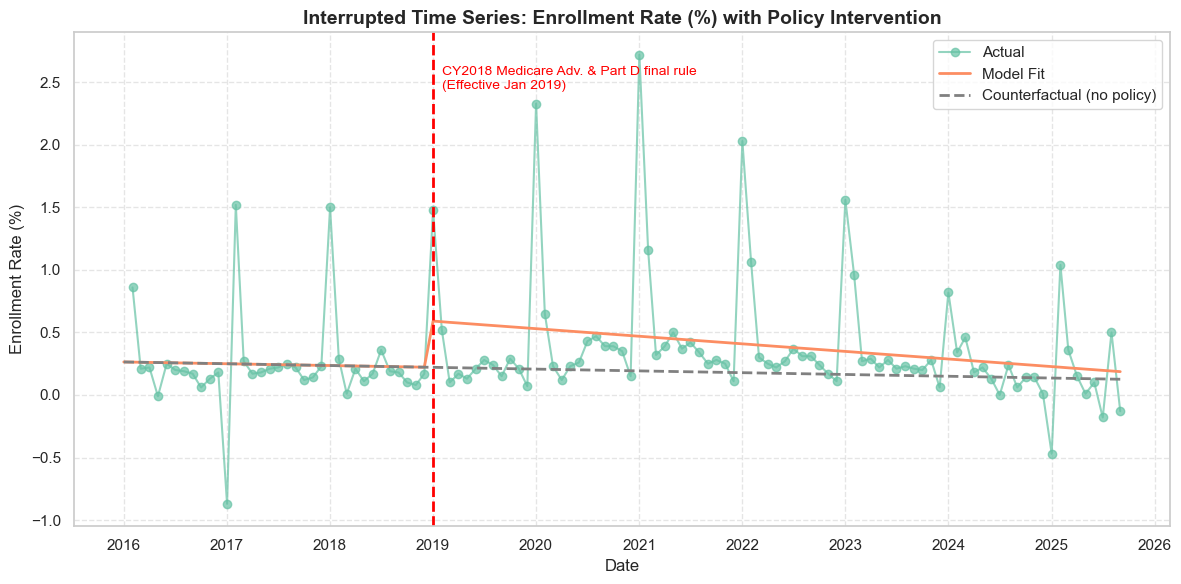

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ===============================
# USER INPUT
# ===============================
data = enrollment_hi_monthly.copy()   
policy_date = pd.Timestamp('2019-01-01')
y_variable = 'Enrollment Rate (%)'     # Dependent variable

# ===============================
# CREATE TIME VARIABLES
# ===============================
data = data.sort_values('Date').reset_index(drop=True)
data['t'] = np.arange(len(data))
data['post'] = (data['Date'] >= policy_date).astype(int)
t0 = data.loc[data['Date'] >= policy_date, 't'].min()
data['after_t'] = (data['t'] - t0 + 1).where(data['post'] == 1, 0)

# ===============================
# OLS REGRESSION MODEL
# ===============================
model = smf.ols(f'Q("{y_variable}") ~ t + post + after_t', data=data).fit(cov_type='HAC', cov_kwds={'maxlags':12})
print(model.summary())

# ===============================
# CREATE FITTED & COUNTERFACTUAL VALUES
# ===============================
data['fitted'] = model.predict(data)

cf = data.copy()
cf['post'] = 0
cf['after_t'] = 0
data['counterfactual'] = model.predict(cf)

# ===============================
# PLOTTING
# ===============================
plt.figure(figsize=(12,6))

# Actual vs Fitted vs Counterfactual
plt.plot(data['Date'], data[y_variable], 'o-', label='Actual', alpha=0.7)
plt.plot(data['Date'], data['fitted'], '-', label='Model Fit', linewidth=2)
plt.plot(data['Date'], data['counterfactual'], '--', color='gray', linewidth=2, label='Counterfactual (no policy)')

# Policy intervention line
plt.axvline(policy_date, color='red', linestyle='--', linewidth=2)
plt.text(policy_date + pd.Timedelta(days=30),
         data[y_variable].max()*0.9,
         'CY2018 Medicare Adv. & Part D final rule\n(Effective Jan 2019)',
         color='red', fontsize=10)

# Formatting
plt.title(f'Interrupted Time Series: {y_variable} with Policy Intervention', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel(y_variable)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Problem statement 1- Landscape Data

### Policy 1 :  Contract Year 2020 Medicare Advantage and Part D Flexibility Final Rule (CMS-4185-F) measured for LANDSCAPE DATA

In [217]:
landscape.dtypes

State                                         object
County                                        object
Organization Name                             object
Plan Type                                     object
Monthly Consolidated Premium (Part C + D)    float64
Annual Part D Deductible Amount              float64
Drug Benefit Category                         object
Contract ID                                   object
Plan ID                                       object
In-network MOOP Amount                       float64
Overall Star Rating                          float64
Contract Year                                  int32
Total Beneficiary Cost Exposure              float64
Zero Monthly Premium Indicator                 int64
Benefit Richness Index                         int64
dtype: object

In [218]:
# --- Clean column names ---
landscape.columns = landscape.columns.str.strip()

# --- Filter by state ---
landscape_ca = landscape[landscape['State'].str.contains('California', case=False, na=False)].copy()
landscape_hi = landscape[landscape['State'].str.contains('Hawaii', case=False, na=False)].copy()

# --- Group by Year to get averages ---
landscape_ca_yearly = (landscape_ca
    .groupby('Contract Year')[['Monthly Consolidated Premium (Part C + D)', 
                               'Annual Part D Deductible Amount',
                               'In-network MOOP Amount',
                               'Overall Star Rating']]
    .mean()
    .reset_index()
    .rename(columns={'Contract Year':'Year'}))

landscape_hi_yearly = (landscape_hi
    .groupby('Contract Year')[['Monthly Consolidated Premium (Part C + D)', 
                               'Annual Part D Deductible Amount',
                               'In-network MOOP Amount',
                               'Overall Star Rating']]
    .mean()
    .reset_index()
    .rename(columns={'Contract Year':'Year'}))


In [219]:
#Creating a date column for time series
landscape_ca_yearly['Date'] = pd.to_datetime(landscape_ca_yearly['Year'].astype(str) + '-01-01')
landscape_hi_yearly['Date'] = pd.to_datetime(landscape_hi_yearly['Year'].astype(str) + '-01-01')


1. for CA: Y= Monthly Consolidated Premium

c:\Users\Prachi\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=11



                                          OLS Regression Results                                          
Dep. Variable:     Q("Monthly Consolidated Premium (Part C + D)")   R-squared:                       0.947
Model:                                                        OLS   Adj. R-squared:                  0.924
Method:                                             Least Squares   F-statistic:                     61.12
Date:                                            Mon, 08 Dec 2025   Prob (F-statistic):           2.19e-05
Time:                                                    16:09:58   Log-Likelihood:                -20.615
No. Observations:                                              11   AIC:                             49.23
Df Residuals:                                                   7   BIC:                             50.82
Df Model:                                                       3                                         
Covariance Type:                     

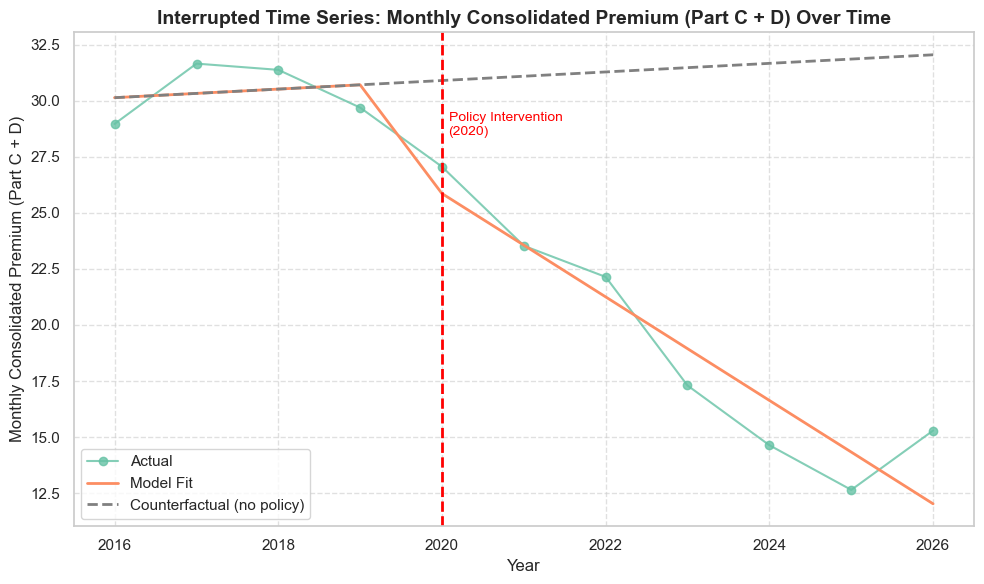

In [220]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ===============================
# USER INPUT
# ===============================
data = landscape_ca_yearly.copy()  
policy_date = pd.Timestamp('2020-01-01')  # Or '2022-01-01'
y_variable = 'Monthly Consolidated Premium (Part C + D)'  # You can change this to any variable

# ===============================
# CREATE TIME VARIABLES
# ===============================
data = data.sort_values('Date').reset_index(drop=True)
data['t'] = np.arange(len(data))
data['post'] = (data['Date'] >= policy_date).astype(int)
t0 = data.loc[data['Date'] >= policy_date, 't'].min()
data['after_t'] = (data['t'] - t0 + 1).where(data['post'] == 1, 0)

# ===============================
# OLS REGRESSION MODEL
# ===============================
model = smf.ols(f'Q("{y_variable}") ~ t + post + after_t', data=data).fit(cov_type='HAC', cov_kwds={'maxlags':1})
print(model.summary())

# ===============================
# CREATE FITTED & COUNTERFACTUAL VALUES
# ===============================
data['fitted'] = model.predict(data)
cf = data.copy()
cf['post'] = 0
cf['after_t'] = 0
data['counterfactual'] = model.predict(cf)

# ===============================
# PLOTTING
# ===============================
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data[y_variable], 'o-', label='Actual', alpha=0.8)
plt.plot(data['Date'], data['fitted'], '-', label='Model Fit', linewidth=2)
plt.plot(data['Date'], data['counterfactual'], '--', color='gray', linewidth=2, label='Counterfactual (no policy)')
plt.axvline(policy_date, color='red', linestyle='--', linewidth=2)
plt.text(policy_date + pd.Timedelta(days=30),
         data[y_variable].max()*0.9,
         f'Policy Intervention\n({policy_date.year})',
         color='red', fontsize=10)
plt.title(f'Interrupted Time Series: {y_variable} Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel(y_variable)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


2. for HI- Y= Monthly Consolidated Premiums 


c:\Users\Prachi\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=11



                                          OLS Regression Results                                          
Dep. Variable:     Q("Monthly Consolidated Premium (Part C + D)")   R-squared:                       0.966
Model:                                                        OLS   Adj. R-squared:                  0.952
Method:                                             Least Squares   F-statistic:                     130.7
Date:                                            Mon, 08 Dec 2025   Prob (F-statistic):           1.65e-06
Time:                                                    16:09:59   Log-Likelihood:                -31.955
No. Observations:                                              11   AIC:                             71.91
Df Residuals:                                                   7   BIC:                             73.50
Df Model:                                                       3                                         
Covariance Type:                     

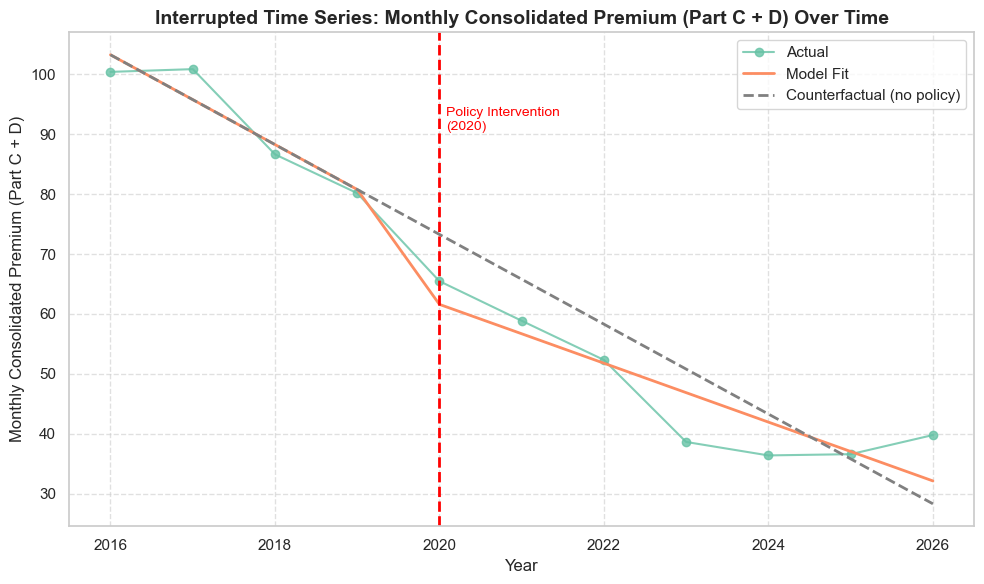

In [221]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ===============================
# USER INPUT
# ===============================
data = landscape_hi_yearly.copy()  
policy_date = pd.Timestamp('2020-01-01')  # Or '2022-01-01'
y_variable = 'Monthly Consolidated Premium (Part C + D)'  # You can change this to any variable

# ===============================
# CREATE TIME VARIABLES
# ===============================
data = data.sort_values('Date').reset_index(drop=True)
data['t'] = np.arange(len(data))
data['post'] = (data['Date'] >= policy_date).astype(int)
t0 = data.loc[data['Date'] >= policy_date, 't'].min()
data['after_t'] = (data['t'] - t0 + 1).where(data['post'] == 1, 0)

# ===============================
# OLS REGRESSION MODEL
# ===============================
model = smf.ols(f'Q("{y_variable}") ~ t + post + after_t', data=data).fit(cov_type='HAC', cov_kwds={'maxlags':1})
print(model.summary())

# ===============================
# CREATE FITTED & COUNTERFACTUAL VALUES
# ===============================
data['fitted'] = model.predict(data)
cf = data.copy()
cf['post'] = 0
cf['after_t'] = 0
data['counterfactual'] = model.predict(cf)

# ===============================
# PLOTTING
# ===============================
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data[y_variable], 'o-', label='Actual', alpha=0.8)
plt.plot(data['Date'], data['fitted'], '-', label='Model Fit', linewidth=2)
plt.plot(data['Date'], data['counterfactual'], '--', color='gray', linewidth=2, label='Counterfactual (no policy)')
plt.axvline(policy_date, color='red', linestyle='--', linewidth=2)
plt.text(policy_date + pd.Timedelta(days=30),
         data[y_variable].max()*0.9,
         f'Policy Intervention\n({policy_date.year})',
         color='red', fontsize=10)
plt.title(f'Interrupted Time Series: {y_variable} Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel(y_variable)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


1. for CA: Y= Annual Part D Deductible Amount

c:\Users\Prachi\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=11



                                     OLS Regression Results                                     
Dep. Variable:     Q("Annual Part D Deductible Amount")   R-squared:                       0.315
Model:                                              OLS   Adj. R-squared:                  0.021
Method:                                   Least Squares   F-statistic:                     8.445
Date:                                  Mon, 08 Dec 2025   Prob (F-statistic):             0.0100
Time:                                          16:10:00   Log-Likelihood:                -54.439
No. Observations:                                    11   AIC:                             116.9
Df Residuals:                                         7   BIC:                             118.5
Df Model:                                             3                                         
Covariance Type:                                    HAC                                         
                 coef    std e

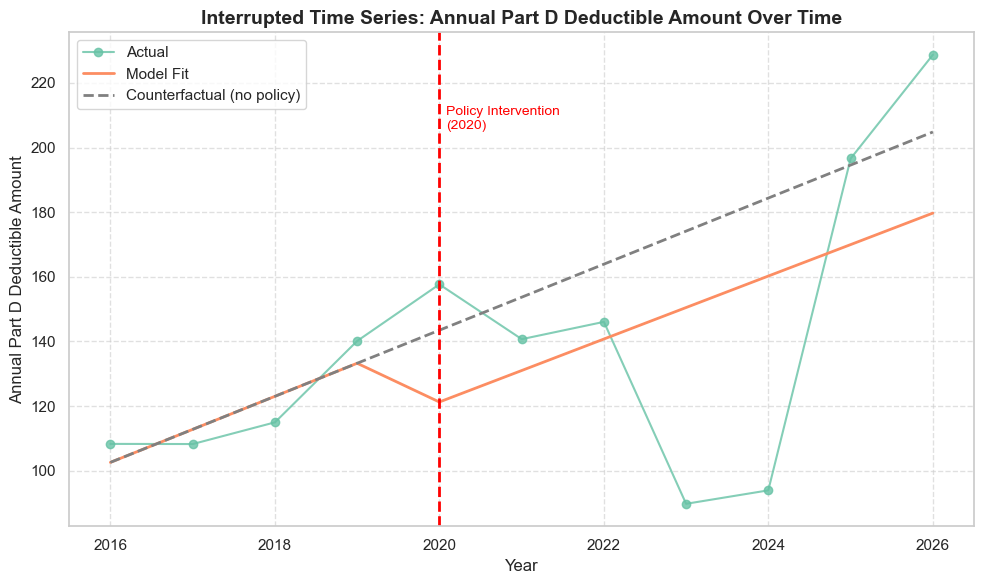

In [222]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ===============================
# USER INPUT
# ===============================
data = landscape_ca_yearly.copy()  
policy_date = pd.Timestamp('2020-01-01')  # Or '2022-01-01'
y_variable = 'Annual Part D Deductible Amount'  # You can change this to any variable

# ===============================
# CREATE TIME VARIABLES
# ===============================
data = data.sort_values('Date').reset_index(drop=True)
data['t'] = np.arange(len(data))
data['post'] = (data['Date'] >= policy_date).astype(int)
t0 = data.loc[data['Date'] >= policy_date, 't'].min()
data['after_t'] = (data['t'] - t0 + 1).where(data['post'] == 1, 0)

# ===============================
# OLS REGRESSION MODEL
# ===============================
model = smf.ols(f'Q("{y_variable}") ~ t + post + after_t', data=data).fit(cov_type='HAC', cov_kwds={'maxlags':1})
print(model.summary())

# ===============================
# CREATE FITTED & COUNTERFACTUAL VALUES
# ===============================
data['fitted'] = model.predict(data)
cf = data.copy()
cf['post'] = 0
cf['after_t'] = 0
data['counterfactual'] = model.predict(cf)

# ===============================
# PLOTTING
# ===============================
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data[y_variable], 'o-', label='Actual', alpha=0.8)
plt.plot(data['Date'], data['fitted'], '-', label='Model Fit', linewidth=2)
plt.plot(data['Date'], data['counterfactual'], '--', color='gray', linewidth=2, label='Counterfactual (no policy)')
plt.axvline(policy_date, color='red', linestyle='--', linewidth=2)
plt.text(policy_date + pd.Timedelta(days=30),
         data[y_variable].max()*0.9,
         f'Policy Intervention\n({policy_date.year})',
         color='red', fontsize=10)
plt.title(f'Interrupted Time Series: {y_variable} Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel(y_variable)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

2. for HI- Y= Annual Part D Deductible Amount 

c:\Users\Prachi\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=11



                                     OLS Regression Results                                     
Dep. Variable:     Q("Annual Part D Deductible Amount")   R-squared:                       0.393
Model:                                              OLS   Adj. R-squared:                  0.133
Method:                                   Least Squares   F-statistic:                     6.960
Date:                                  Mon, 08 Dec 2025   Prob (F-statistic):             0.0166
Time:                                          16:10:01   Log-Likelihood:                -62.261
No. Observations:                                    11   AIC:                             132.5
Df Residuals:                                         7   BIC:                             134.1
Df Model:                                             3                                         
Covariance Type:                                    HAC                                         
                 coef    std e

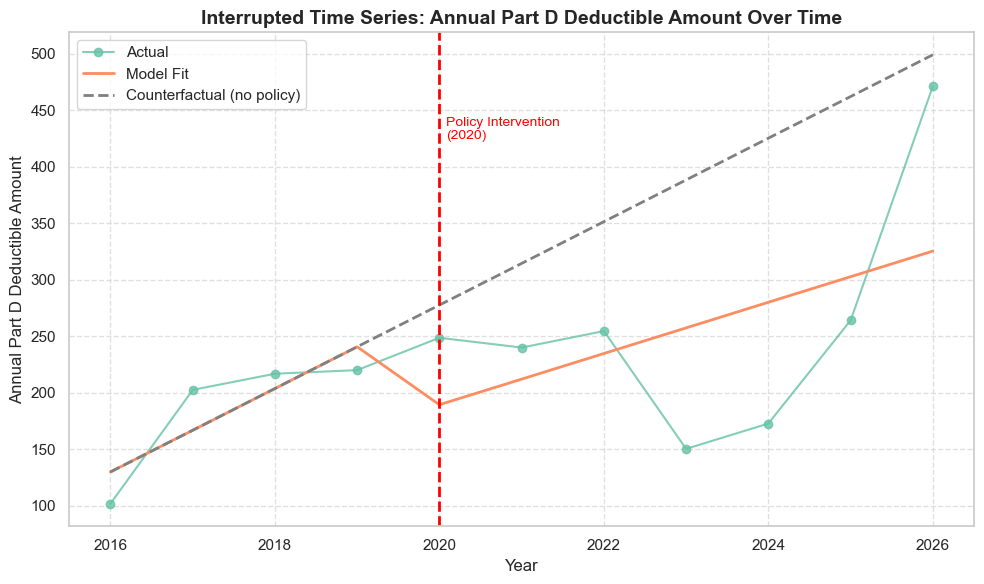

In [223]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ===============================
# USER INPUT
# ===============================
data = landscape_hi_yearly.copy()  
policy_date = pd.Timestamp('2020-01-01')  # Or '2022-01-01'
y_variable = 'Annual Part D Deductible Amount'  # You can change this to any variable

# ===============================
# CREATE TIME VARIABLES
# ===============================
data = data.sort_values('Date').reset_index(drop=True)
data['t'] = np.arange(len(data))
data['post'] = (data['Date'] >= policy_date).astype(int)
t0 = data.loc[data['Date'] >= policy_date, 't'].min()
data['after_t'] = (data['t'] - t0 + 1).where(data['post'] == 1, 0)

# ===============================
# OLS REGRESSION MODEL
# ===============================
model = smf.ols(f'Q("{y_variable}") ~ t + post + after_t', data=data).fit(cov_type='HAC', cov_kwds={'maxlags':1})
print(model.summary())

# ===============================
# CREATE FITTED & COUNTERFACTUAL VALUES
# ===============================
data['fitted'] = model.predict(data)
cf = data.copy()
cf['post'] = 0
cf['after_t'] = 0
data['counterfactual'] = model.predict(cf)

# ===============================
# PLOTTING
# ===============================
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data[y_variable], 'o-', label='Actual', alpha=0.8)
plt.plot(data['Date'], data['fitted'], '-', label='Model Fit', linewidth=2)
plt.plot(data['Date'], data['counterfactual'], '--', color='gray', linewidth=2, label='Counterfactual (no policy)')
plt.axvline(policy_date, color='red', linestyle='--', linewidth=2)
plt.text(policy_date + pd.Timedelta(days=30),
         data[y_variable].max()*0.9,
         f'Policy Intervention\n({policy_date.year})',
         color='red', fontsize=10)
plt.title(f'Interrupted Time Series: {y_variable} Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel(y_variable)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

1. for CA: Y= In-network MOOP Amount

c:\Users\Prachi\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=11



                                 OLS Regression Results                                
Dep. Variable:     Q("In-network MOOP Amount")   R-squared:                       0.956
Model:                                     OLS   Adj. R-squared:                  0.937
Method:                          Least Squares   F-statistic:                     93.17
Date:                         Mon, 08 Dec 2025   Prob (F-statistic):           5.26e-06
Time:                                 16:10:02   Log-Likelihood:                -68.053
No. Observations:                           11   AIC:                             144.1
Df Residuals:                                7   BIC:                             145.7
Df Model:                                    3                                         
Covariance Type:                           HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

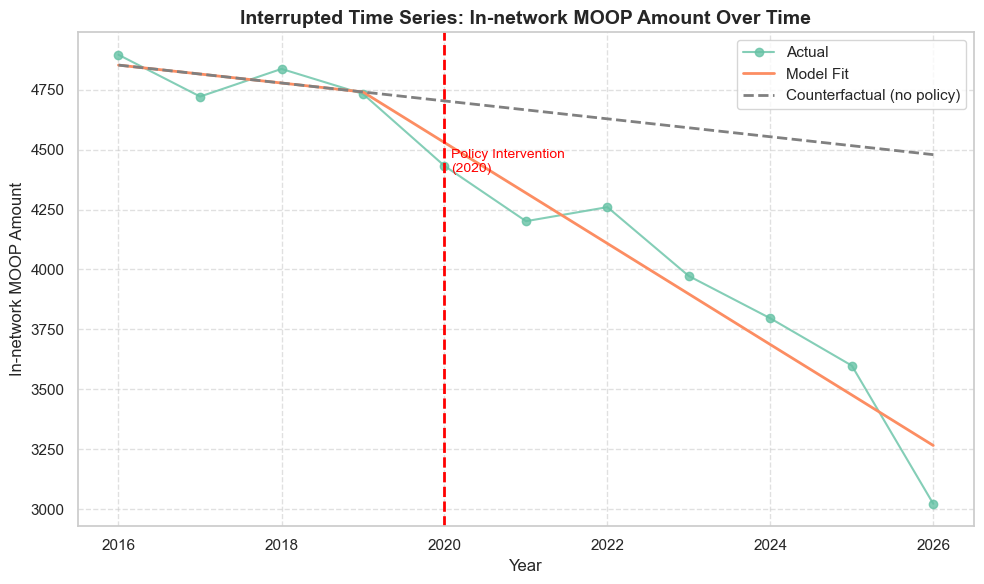

In [224]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ===============================
# USER INPUT
# ===============================
data = landscape_ca_yearly.copy()  
policy_date = pd.Timestamp('2020-01-01')  # Or '2022-01-01'
y_variable = 'In-network MOOP Amount'  # You can change this to any variable

# ===============================
# CREATE TIME VARIABLES
# ===============================
data = data.sort_values('Date').reset_index(drop=True)
data['t'] = np.arange(len(data))
data['post'] = (data['Date'] >= policy_date).astype(int)
t0 = data.loc[data['Date'] >= policy_date, 't'].min()
data['after_t'] = (data['t'] - t0 + 1).where(data['post'] == 1, 0)

# ===============================
# OLS REGRESSION MODEL
# ===============================
model = smf.ols(f'Q("{y_variable}") ~ t + post + after_t', data=data).fit(cov_type='HAC', cov_kwds={'maxlags':1})
print(model.summary())

# ===============================
# CREATE FITTED & COUNTERFACTUAL VALUES
# ===============================
data['fitted'] = model.predict(data)
cf = data.copy()
cf['post'] = 0
cf['after_t'] = 0
data['counterfactual'] = model.predict(cf)

# ===============================
# PLOTTING
# ===============================
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data[y_variable], 'o-', label='Actual', alpha=0.8)
plt.plot(data['Date'], data['fitted'], '-', label='Model Fit', linewidth=2)
plt.plot(data['Date'], data['counterfactual'], '--', color='gray', linewidth=2, label='Counterfactual (no policy)')
plt.axvline(policy_date, color='red', linestyle='--', linewidth=2)
plt.text(policy_date + pd.Timedelta(days=30),
         data[y_variable].max()*0.9,
         f'Policy Intervention\n({policy_date.year})',
         color='red', fontsize=10)
plt.title(f'Interrupted Time Series: {y_variable} Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel(y_variable)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

2. for HI; Y= In-Network MOOP Amount

c:\Users\Prachi\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=11



                                 OLS Regression Results                                
Dep. Variable:     Q("In-network MOOP Amount")   R-squared:                       0.951
Model:                                     OLS   Adj. R-squared:                  0.930
Method:                          Least Squares   F-statistic:                     279.1
Date:                         Mon, 08 Dec 2025   Prob (F-statistic):           1.20e-07
Time:                                 16:10:03   Log-Likelihood:                -68.924
No. Observations:                           11   AIC:                             145.8
Df Residuals:                                7   BIC:                             147.4
Df Model:                                    3                                         
Covariance Type:                           HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

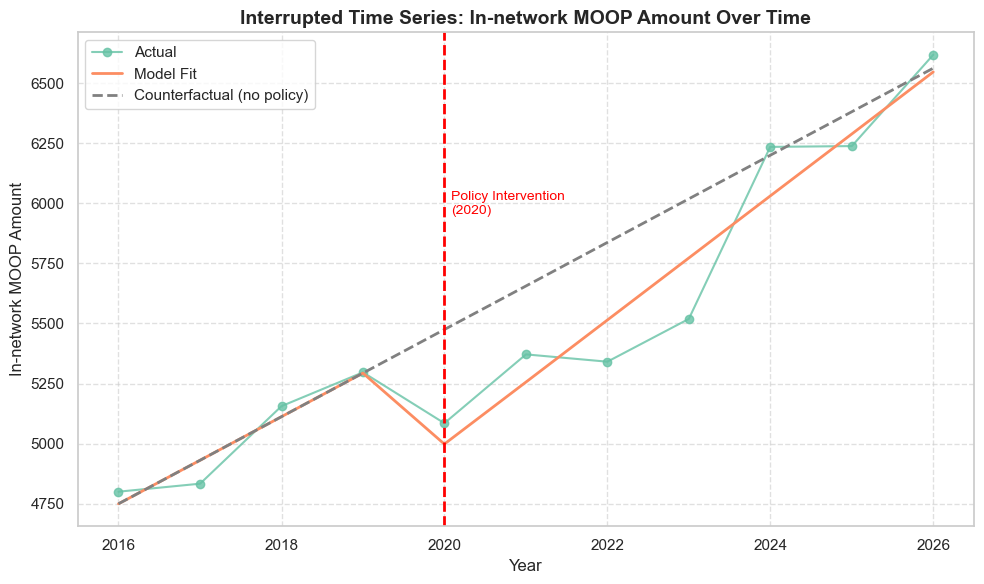

In [225]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ===============================
# USER INPUT
# ===============================
data = landscape_hi_yearly.copy()  
policy_date = pd.Timestamp('2020-01-01')  # Or '2022-01-01'
y_variable = 'In-network MOOP Amount'  # You can change this to any variable

# ===============================
# CREATE TIME VARIABLES
# ===============================
data = data.sort_values('Date').reset_index(drop=True)
data['t'] = np.arange(len(data))
data['post'] = (data['Date'] >= policy_date).astype(int)
t0 = data.loc[data['Date'] >= policy_date, 't'].min()
data['after_t'] = (data['t'] - t0 + 1).where(data['post'] == 1, 0)

# ===============================
# OLS REGRESSION MODEL
# ===============================
model = smf.ols(f'Q("{y_variable}") ~ t + post + after_t', data=data).fit(cov_type='HAC', cov_kwds={'maxlags':1})
print(model.summary())

# ===============================
# CREATE FITTED & COUNTERFACTUAL VALUES
# ===============================
data['fitted'] = model.predict(data)
cf = data.copy()
cf['post'] = 0
cf['after_t'] = 0
data['counterfactual'] = model.predict(cf)

# ===============================
# PLOTTING
# ===============================
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data[y_variable], 'o-', label='Actual', alpha=0.8)
plt.plot(data['Date'], data['fitted'], '-', label='Model Fit', linewidth=2)
plt.plot(data['Date'], data['counterfactual'], '--', color='gray', linewidth=2, label='Counterfactual (no policy)')
plt.axvline(policy_date, color='red', linestyle='--', linewidth=2)
plt.text(policy_date + pd.Timedelta(days=30),
         data[y_variable].max()*0.9,
         f'Policy Intervention\n({policy_date.year})',
         color='red', fontsize=10)
plt.title(f'Interrupted Time Series: {y_variable} Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel(y_variable)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

1. for CA: Y= Average Star Ratings

c:\Users\Prachi\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



                               OLS Regression Results                               
Dep. Variable:     Q("Overall Star Rating")   R-squared:                       0.833
Model:                                  OLS   Adj. R-squared:                  0.749
Method:                       Least Squares   F-statistic:                     17.81
Date:                      Mon, 08 Dec 2025   Prob (F-statistic):            0.00216
Time:                              16:10:04   Log-Likelihood:                 9.1051
No. Observations:                        10   AIC:                            -10.21
Df Residuals:                             6   BIC:                            -9.000
Df Model:                                 3                                         
Covariance Type:                        HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

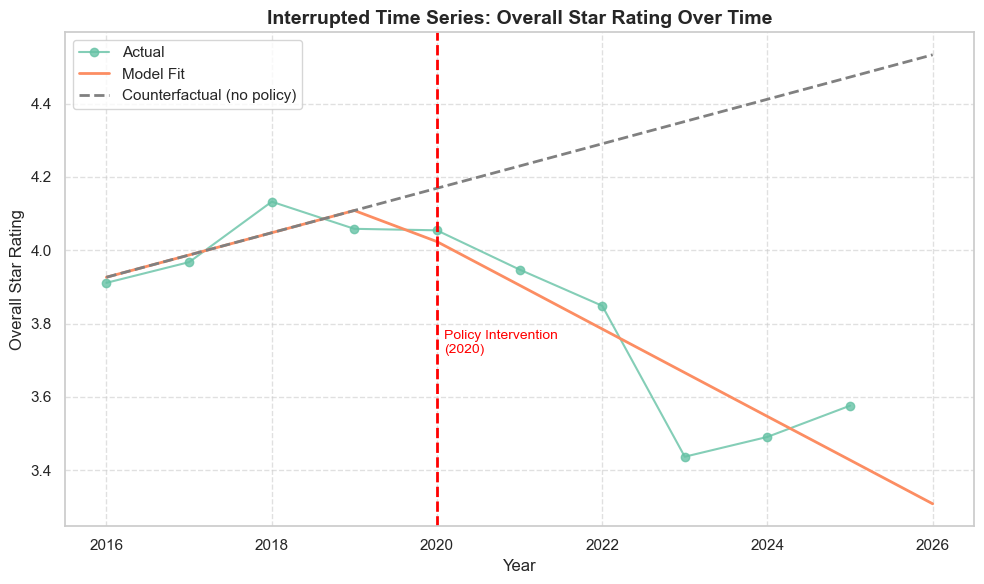

In [226]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ===============================
# USER INPUT
# ===============================
data = landscape_ca_yearly.copy()  
policy_date = pd.Timestamp('2020-01-01')  # Or '2022-01-01'
y_variable = 'Overall Star Rating'  # You can change this to any variable

# ===============================
# CREATE TIME VARIABLES
# ===============================
data = data.sort_values('Date').reset_index(drop=True)
data['t'] = np.arange(len(data))
data['post'] = (data['Date'] >= policy_date).astype(int)
t0 = data.loc[data['Date'] >= policy_date, 't'].min()
data['after_t'] = (data['t'] - t0 + 1).where(data['post'] == 1, 0)

# ===============================
# OLS REGRESSION MODEL
# ===============================
model = smf.ols(f'Q("{y_variable}") ~ t + post + after_t', data=data).fit(cov_type='HAC', cov_kwds={'maxlags':1})
print(model.summary())

# ===============================
# CREATE FITTED & COUNTERFACTUAL VALUES
# ===============================
data['fitted'] = model.predict(data)
cf = data.copy()
cf['post'] = 0
cf['after_t'] = 0
data['counterfactual'] = model.predict(cf)

# ===============================
# PLOTTING
# ===============================
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data[y_variable], 'o-', label='Actual', alpha=0.8)
plt.plot(data['Date'], data['fitted'], '-', label='Model Fit', linewidth=2)
plt.plot(data['Date'], data['counterfactual'], '--', color='gray', linewidth=2, label='Counterfactual (no policy)')
plt.axvline(policy_date, color='red', linestyle='--', linewidth=2)
plt.text(policy_date + pd.Timedelta(days=30),
         data[y_variable].max()*0.9,
         f'Policy Intervention\n({policy_date.year})',
         color='red', fontsize=10)
plt.title(f'Interrupted Time Series: {y_variable} Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel(y_variable)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

2. for HI - Y= Avg. Star Ratings



c:\Users\Prachi\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



                               OLS Regression Results                               
Dep. Variable:     Q("Overall Star Rating")   R-squared:                       0.401
Model:                                  OLS   Adj. R-squared:                  0.102
Method:                       Least Squares   F-statistic:                     3.910
Date:                      Mon, 08 Dec 2025   Prob (F-statistic):             0.0732
Time:                              16:10:05   Log-Likelihood:                 4.3714
No. Observations:                        10   AIC:                           -0.7428
Df Residuals:                             6   BIC:                            0.4676
Df Model:                                 3                                         
Covariance Type:                        HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

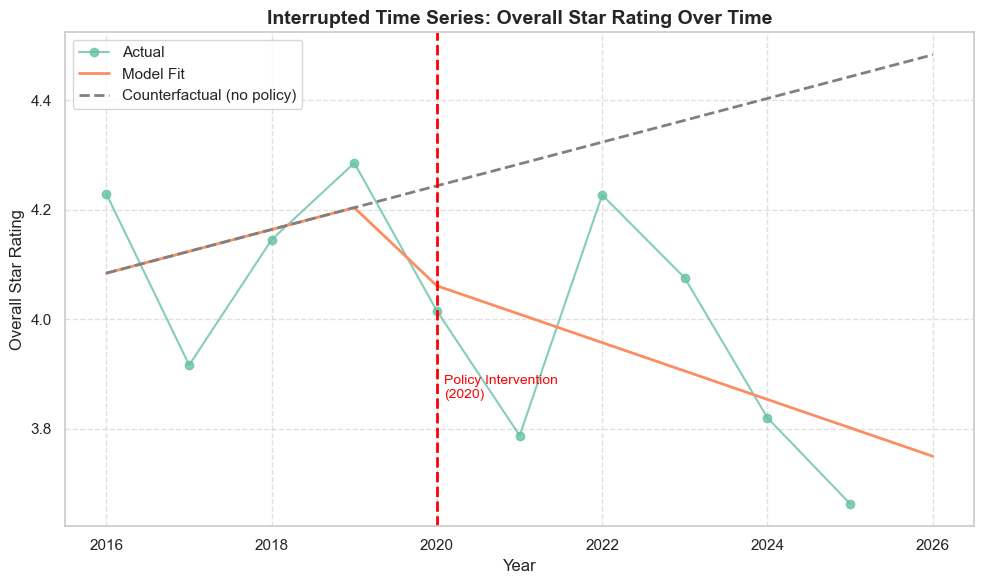

In [227]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ===============================
# USER INPUT
# ===============================
data = landscape_hi_yearly.copy()  
policy_date = pd.Timestamp('2020-01-01')  # Or '2022-01-01'
y_variable = 'Overall Star Rating'  # You can change this to any variable

# ===============================
# CREATE TIME VARIABLES
# ===============================
data = data.sort_values('Date').reset_index(drop=True)
data['t'] = np.arange(len(data))
data['post'] = (data['Date'] >= policy_date).astype(int)
t0 = data.loc[data['Date'] >= policy_date, 't'].min()
data['after_t'] = (data['t'] - t0 + 1).where(data['post'] == 1, 0)

# ===============================
# OLS REGRESSION MODEL
# ===============================
model = smf.ols(f'Q("{y_variable}") ~ t + post + after_t', data=data).fit(cov_type='HAC', cov_kwds={'maxlags':1})
print(model.summary())

# ===============================
# CREATE FITTED & COUNTERFACTUAL VALUES
# ===============================
data['fitted'] = model.predict(data)
cf = data.copy()
cf['post'] = 0
cf['after_t'] = 0
data['counterfactual'] = model.predict(cf)

# ===============================
# PLOTTING
# ===============================
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data[y_variable], 'o-', label='Actual', alpha=0.8)
plt.plot(data['Date'], data['fitted'], '-', label='Model Fit', linewidth=2)
plt.plot(data['Date'], data['counterfactual'], '--', color='gray', linewidth=2, label='Counterfactual (no policy)')
plt.axvline(policy_date, color='red', linestyle='--', linewidth=2)
plt.text(policy_date + pd.Timedelta(days=30),
         data[y_variable].max()*0.9,
         f'Policy Intervention\n({policy_date.year})',
         color='red', fontsize=10)
plt.title(f'Interrupted Time Series: {y_variable} Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel(y_variable)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Policy 2 :  Contract Year 2022 MA and Part D Final Rule (CMS-4190-F)- measured for Landscape data

1. for CA - Y= Monthly COnsolidated Premium

c:\Users\Prachi\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=11



                                          OLS Regression Results                                          
Dep. Variable:     Q("Monthly Consolidated Premium (Part C + D)")   R-squared:                       0.924
Model:                                                        OLS   Adj. R-squared:                  0.891
Method:                                             Least Squares   F-statistic:                     39.21
Date:                                            Mon, 08 Dec 2025   Prob (F-statistic):           9.56e-05
Time:                                                    16:10:06   Log-Likelihood:                -22.559
No. Observations:                                              11   AIC:                             53.12
Df Residuals:                                                   7   BIC:                             54.71
Df Model:                                                       3                                         
Covariance Type:                     

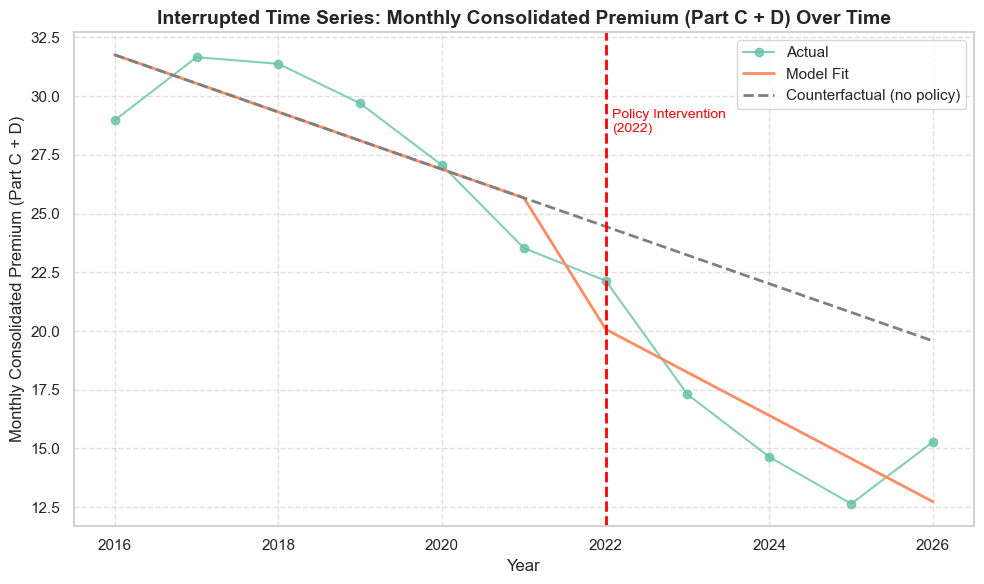

In [228]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ===============================
# USER INPUT
# ===============================
data = landscape_ca_yearly.copy()  
policy_date = pd.Timestamp('2022-01-01') 
y_variable = 'Monthly Consolidated Premium (Part C + D)'  # You can change this to any variable

# ===============================
# CREATE TIME VARIABLES
# ===============================
data = data.sort_values('Date').reset_index(drop=True)
data['t'] = np.arange(len(data))
data['post'] = (data['Date'] >= policy_date).astype(int)
t0 = data.loc[data['Date'] >= policy_date, 't'].min()
data['after_t'] = (data['t'] - t0 + 1).where(data['post'] == 1, 0)

# ===============================
# OLS REGRESSION MODEL
# ===============================
model = smf.ols(f'Q("{y_variable}") ~ t + post + after_t', data=data).fit(cov_type='HAC', cov_kwds={'maxlags':1})
print(model.summary())

# ===============================
# CREATE FITTED & COUNTERFACTUAL VALUES
# ===============================
data['fitted'] = model.predict(data)
cf = data.copy()
cf['post'] = 0
cf['after_t'] = 0
data['counterfactual'] = model.predict(cf)

# ===============================
# PLOTTING
# ===============================
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data[y_variable], 'o-', label='Actual', alpha=0.8)
plt.plot(data['Date'], data['fitted'], '-', label='Model Fit', linewidth=2)
plt.plot(data['Date'], data['counterfactual'], '--', color='gray', linewidth=2, label='Counterfactual (no policy)')
plt.axvline(policy_date, color='red', linestyle='--', linewidth=2)
plt.text(policy_date + pd.Timedelta(days=30),
         data[y_variable].max()*0.9,
         f'Policy Intervention\n({policy_date.year})',
         color='red', fontsize=10)
plt.title(f'Interrupted Time Series: {y_variable} Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel(y_variable)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


2. for HI- Y= Monthly COnsolidated Premium

c:\Users\Prachi\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=11



                                          OLS Regression Results                                          
Dep. Variable:     Q("Monthly Consolidated Premium (Part C + D)")   R-squared:                       0.974
Model:                                                        OLS   Adj. R-squared:                  0.963
Method:                                             Least Squares   F-statistic:                     169.7
Date:                                            Mon, 08 Dec 2025   Prob (F-statistic):           6.72e-07
Time:                                                    16:10:07   Log-Likelihood:                -30.468
No. Observations:                                              11   AIC:                             68.94
Df Residuals:                                                   7   BIC:                             70.53
Df Model:                                                       3                                         
Covariance Type:                     

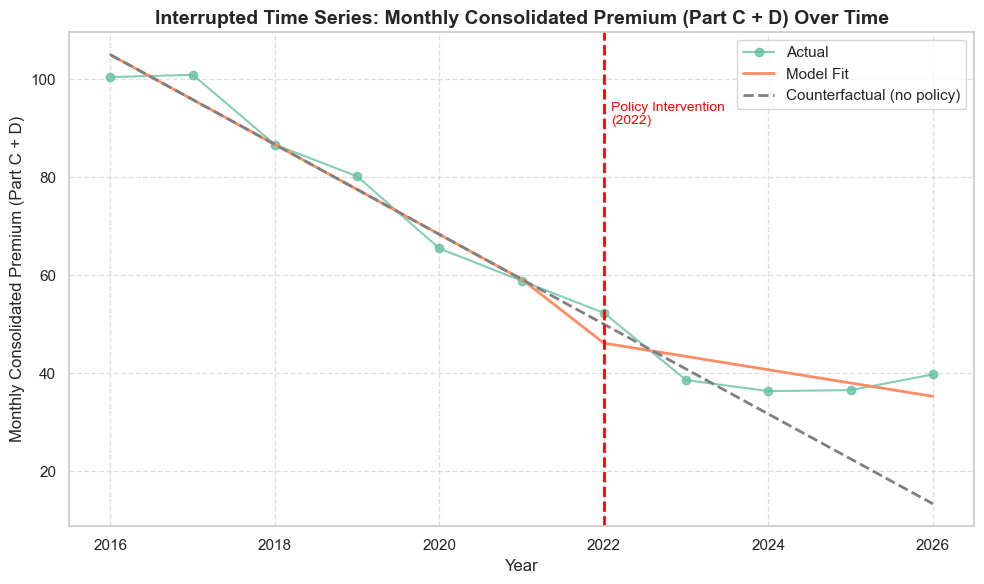

In [229]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ===============================
# USER INPUT
# ===============================
data = landscape_hi_yearly.copy()  
policy_date = pd.Timestamp('2022-01-01') 
y_variable = 'Monthly Consolidated Premium (Part C + D)'  # You can change this to any variable

# ===============================
# CREATE TIME VARIABLES
# ===============================
data = data.sort_values('Date').reset_index(drop=True)
data['t'] = np.arange(len(data))
data['post'] = (data['Date'] >= policy_date).astype(int)
t0 = data.loc[data['Date'] >= policy_date, 't'].min()
data['after_t'] = (data['t'] - t0 + 1).where(data['post'] == 1, 0)

# ===============================
# OLS REGRESSION MODEL
# ===============================
model = smf.ols(f'Q("{y_variable}") ~ t + post + after_t', data=data).fit(cov_type='HAC', cov_kwds={'maxlags':1})
print(model.summary())

# ===============================
# CREATE FITTED & COUNTERFACTUAL VALUES
# ===============================
data['fitted'] = model.predict(data)
cf = data.copy()
cf['post'] = 0
cf['after_t'] = 0
data['counterfactual'] = model.predict(cf)

# ===============================
# PLOTTING
# ===============================
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data[y_variable], 'o-', label='Actual', alpha=0.8)
plt.plot(data['Date'], data['fitted'], '-', label='Model Fit', linewidth=2)
plt.plot(data['Date'], data['counterfactual'], '--', color='gray', linewidth=2, label='Counterfactual (no policy)')
plt.axvline(policy_date, color='red', linestyle='--', linewidth=2)
plt.text(policy_date + pd.Timedelta(days=30),
         data[y_variable].max()*0.9,
         f'Policy Intervention\n({policy_date.year})',
         color='red', fontsize=10)
plt.title(f'Interrupted Time Series: {y_variable} Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel(y_variable)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


1. for CA- Y= Annual Part D deductible

c:\Users\Prachi\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=11



                                     OLS Regression Results                                     
Dep. Variable:     Q("Annual Part D Deductible Amount")   R-squared:                       0.557
Model:                                              OLS   Adj. R-squared:                  0.368
Method:                                   Least Squares   F-statistic:                     14.28
Date:                                  Mon, 08 Dec 2025   Prob (F-statistic):            0.00228
Time:                                          16:10:08   Log-Likelihood:                -52.036
No. Observations:                                    11   AIC:                             112.1
Df Residuals:                                         7   BIC:                             113.7
Df Model:                                             3                                         
Covariance Type:                                    HAC                                         
                 coef    std e

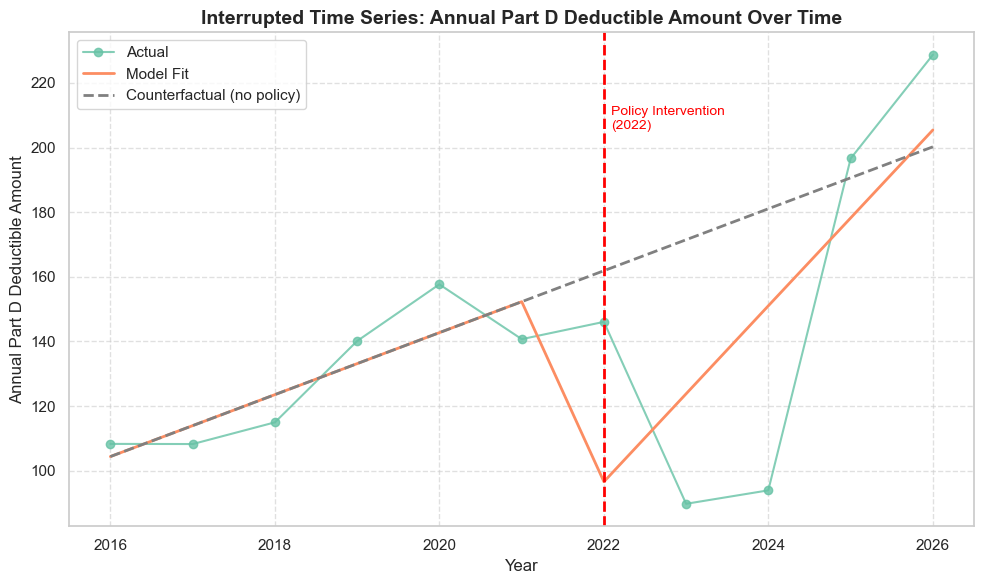

In [230]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ===============================
# USER INPUT
# ===============================
data = landscape_ca_yearly.copy()  
policy_date = pd.Timestamp('2022-01-01')  # Or '2022-01-01'
y_variable = 'Annual Part D Deductible Amount'  # You can change this to any variable

# ===============================
# CREATE TIME VARIABLES
# ===============================
data = data.sort_values('Date').reset_index(drop=True)
data['t'] = np.arange(len(data))
data['post'] = (data['Date'] >= policy_date).astype(int)
t0 = data.loc[data['Date'] >= policy_date, 't'].min()
data['after_t'] = (data['t'] - t0 + 1).where(data['post'] == 1, 0)

# ===============================
# OLS REGRESSION MODEL
# ===============================
model = smf.ols(f'Q("{y_variable}") ~ t + post + after_t', data=data).fit(cov_type='HAC', cov_kwds={'maxlags':1})
print(model.summary())

# ===============================
# CREATE FITTED & COUNTERFACTUAL VALUES
# ===============================
data['fitted'] = model.predict(data)
cf = data.copy()
cf['post'] = 0
cf['after_t'] = 0
data['counterfactual'] = model.predict(cf)

# ===============================
# PLOTTING
# ===============================
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data[y_variable], 'o-', label='Actual', alpha=0.8)
plt.plot(data['Date'], data['fitted'], '-', label='Model Fit', linewidth=2)
plt.plot(data['Date'], data['counterfactual'], '--', color='gray', linewidth=2, label='Counterfactual (no policy)')
plt.axvline(policy_date, color='red', linestyle='--', linewidth=2)
plt.text(policy_date + pd.Timedelta(days=30),
         data[y_variable].max()*0.9,
         f'Policy Intervention\n({policy_date.year})',
         color='red', fontsize=10)
plt.title(f'Interrupted Time Series: {y_variable} Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel(y_variable)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

2. for HI- Y= Annual Part D Deductibel

c:\Users\Prachi\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=11



                                     OLS Regression Results                                     
Dep. Variable:     Q("Annual Part D Deductible Amount")   R-squared:                       0.559
Model:                                              OLS   Adj. R-squared:                  0.370
Method:                                   Least Squares   F-statistic:                     6.005
Date:                                  Mon, 08 Dec 2025   Prob (F-statistic):             0.0239
Time:                                          16:10:09   Log-Likelihood:                -60.508
No. Observations:                                    11   AIC:                             129.0
Df Residuals:                                         7   BIC:                             130.6
Df Model:                                             3                                         
Covariance Type:                                    HAC                                         
                 coef    std e

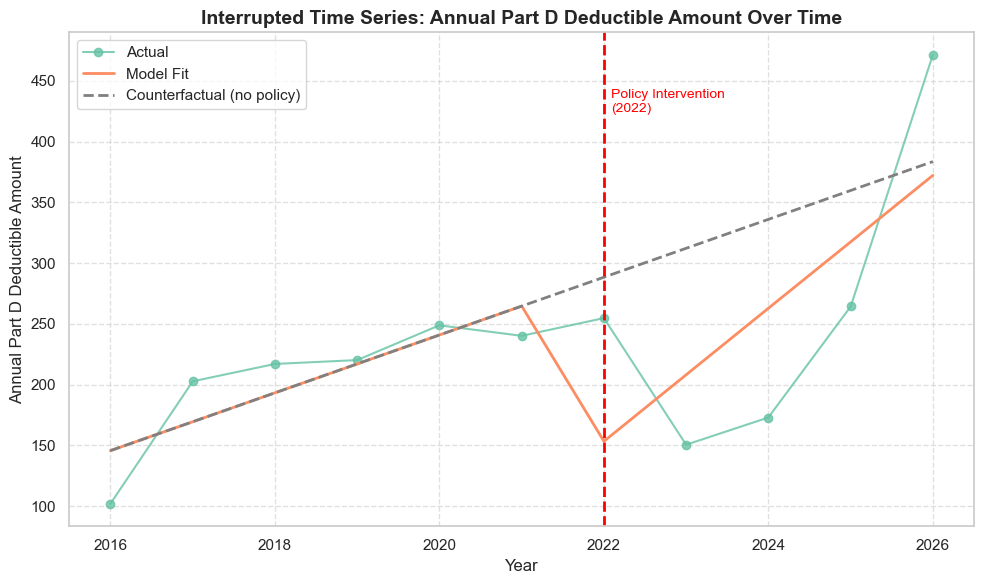

In [231]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ===============================
# USER INPUT
# ===============================
data = landscape_hi_yearly.copy()  
policy_date = pd.Timestamp('2022-01-01')  # Or '2022-01-01'
y_variable = 'Annual Part D Deductible Amount'  # You can change this to any variable

# ===============================
# CREATE TIME VARIABLES
# ===============================
data = data.sort_values('Date').reset_index(drop=True)
data['t'] = np.arange(len(data))
data['post'] = (data['Date'] >= policy_date).astype(int)
t0 = data.loc[data['Date'] >= policy_date, 't'].min()
data['after_t'] = (data['t'] - t0 + 1).where(data['post'] == 1, 0)

# ===============================
# OLS REGRESSION MODEL
# ===============================
model = smf.ols(f'Q("{y_variable}") ~ t + post + after_t', data=data).fit(cov_type='HAC', cov_kwds={'maxlags':1})
print(model.summary())

# ===============================
# CREATE FITTED & COUNTERFACTUAL VALUES
# ===============================
data['fitted'] = model.predict(data)
cf = data.copy()
cf['post'] = 0
cf['after_t'] = 0
data['counterfactual'] = model.predict(cf)

# ===============================
# PLOTTING
# ===============================
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data[y_variable], 'o-', label='Actual', alpha=0.8)
plt.plot(data['Date'], data['fitted'], '-', label='Model Fit', linewidth=2)
plt.plot(data['Date'], data['counterfactual'], '--', color='gray', linewidth=2, label='Counterfactual (no policy)')
plt.axvline(policy_date, color='red', linestyle='--', linewidth=2)
plt.text(policy_date + pd.Timedelta(days=30),
         data[y_variable].max()*0.9,
         f'Policy Intervention\n({policy_date.year})',
         color='red', fontsize=10)
plt.title(f'Interrupted Time Series: {y_variable} Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel(y_variable)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

1. for CA- Y= In-Network MOOP Amount

c:\Users\Prachi\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=11



                                 OLS Regression Results                                
Dep. Variable:     Q("In-network MOOP Amount")   R-squared:                       0.964
Model:                                     OLS   Adj. R-squared:                  0.949
Method:                          Least Squares   F-statistic:                     99.24
Date:                         Mon, 08 Dec 2025   Prob (F-statistic):           4.24e-06
Time:                                 16:10:10   Log-Likelihood:                -66.885
No. Observations:                           11   AIC:                             141.8
Df Residuals:                                7   BIC:                             143.4
Df Model:                                    3                                         
Covariance Type:                           HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

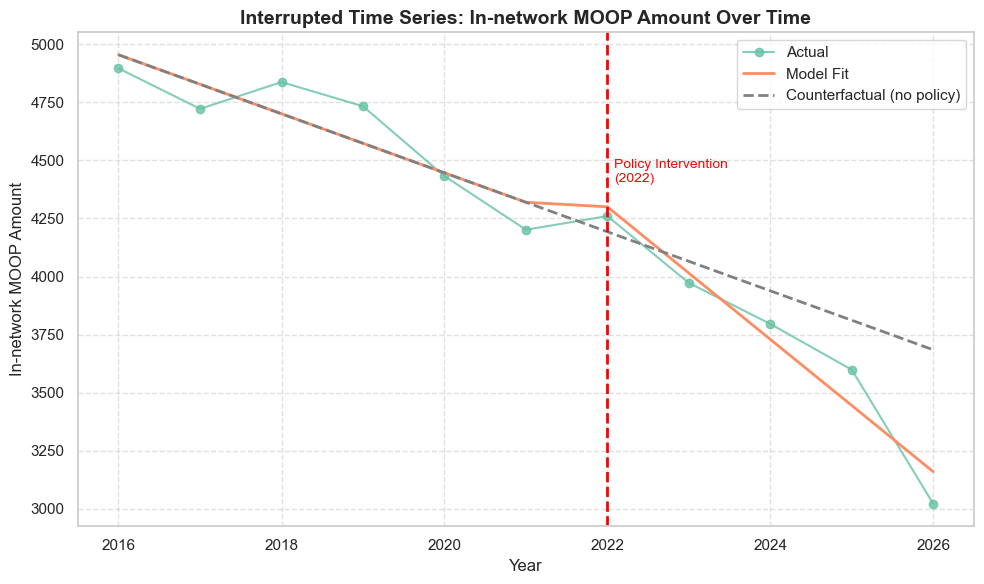

In [232]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ===============================
# USER INPUT
# ===============================
data = landscape_ca_yearly.copy()  
policy_date = pd.Timestamp('2022-01-01') 
y_variable = 'In-network MOOP Amount'  # You can change this to any variable

# ===============================
# CREATE TIME VARIABLES
# ===============================
data = data.sort_values('Date').reset_index(drop=True)
data['t'] = np.arange(len(data))
data['post'] = (data['Date'] >= policy_date).astype(int)
t0 = data.loc[data['Date'] >= policy_date, 't'].min()
data['after_t'] = (data['t'] - t0 + 1).where(data['post'] == 1, 0)

# ===============================
# OLS REGRESSION MODEL
# ===============================
model = smf.ols(f'Q("{y_variable}") ~ t + post + after_t', data=data).fit(cov_type='HAC', cov_kwds={'maxlags':1})
print(model.summary())

# ===============================
# CREATE FITTED & COUNTERFACTUAL VALUES
# ===============================
data['fitted'] = model.predict(data)
cf = data.copy()
cf['post'] = 0
cf['after_t'] = 0
data['counterfactual'] = model.predict(cf)

# ===============================
# PLOTTING
# ===============================
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data[y_variable], 'o-', label='Actual', alpha=0.8)
plt.plot(data['Date'], data['fitted'], '-', label='Model Fit', linewidth=2)
plt.plot(data['Date'], data['counterfactual'], '--', color='gray', linewidth=2, label='Counterfactual (no policy)')
plt.axvline(policy_date, color='red', linestyle='--', linewidth=2)
plt.text(policy_date + pd.Timedelta(days=30),
         data[y_variable].max()*0.9,
         f'Policy Intervention\n({policy_date.year})',
         color='red', fontsize=10)
plt.title(f'Interrupted Time Series: {y_variable} Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel(y_variable)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

2. for HI- Y= In network MOOP Amount

c:\Users\Prachi\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=11



                                 OLS Regression Results                                
Dep. Variable:     Q("In-network MOOP Amount")   R-squared:                       0.955
Model:                                     OLS   Adj. R-squared:                  0.936
Method:                          Least Squares   F-statistic:                     232.7
Date:                         Mon, 08 Dec 2025   Prob (F-statistic):           2.26e-07
Time:                                 16:10:11   Log-Likelihood:                -68.416
No. Observations:                           11   AIC:                             144.8
Df Residuals:                                7   BIC:                             146.4
Df Model:                                    3                                         
Covariance Type:                           HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

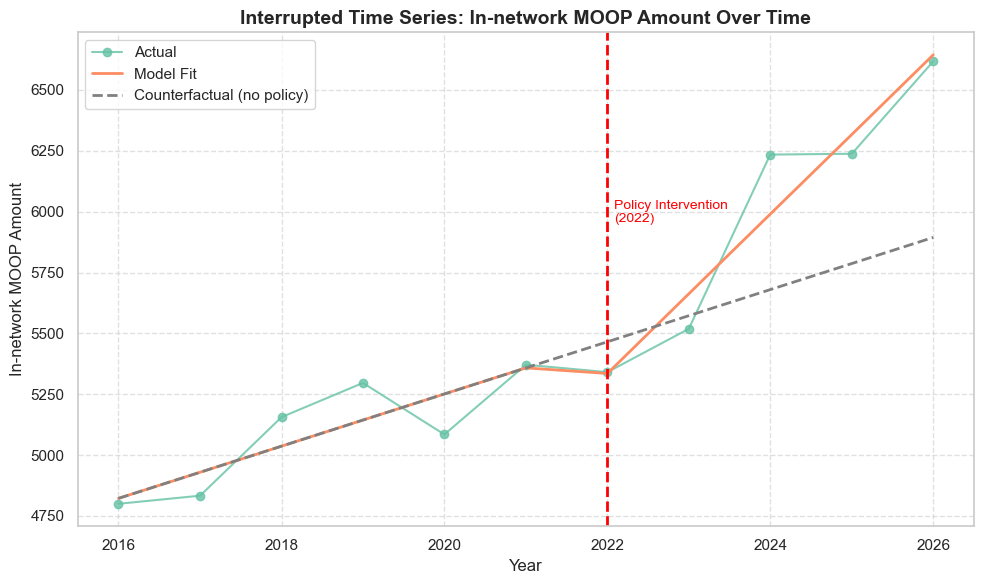

In [233]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ===============================
# USER INPUT
# ===============================
data = landscape_hi_yearly.copy()  
policy_date = pd.Timestamp('2022-01-01')  # Or '2022-01-01'
y_variable = 'In-network MOOP Amount'  # You can change this to any variable

# ===============================
# CREATE TIME VARIABLES
# ===============================
data = data.sort_values('Date').reset_index(drop=True)
data['t'] = np.arange(len(data))
data['post'] = (data['Date'] >= policy_date).astype(int)
t0 = data.loc[data['Date'] >= policy_date, 't'].min()
data['after_t'] = (data['t'] - t0 + 1).where(data['post'] == 1, 0)

# ===============================
# OLS REGRESSION MODEL
# ===============================
model = smf.ols(f'Q("{y_variable}") ~ t + post + after_t', data=data).fit(cov_type='HAC', cov_kwds={'maxlags':1})
print(model.summary())

# ===============================
# CREATE FITTED & COUNTERFACTUAL VALUES
# ===============================
data['fitted'] = model.predict(data)
cf = data.copy()
cf['post'] = 0
cf['after_t'] = 0
data['counterfactual'] = model.predict(cf)

# ===============================
# PLOTTING
# ===============================
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data[y_variable], 'o-', label='Actual', alpha=0.8)
plt.plot(data['Date'], data['fitted'], '-', label='Model Fit', linewidth=2)
plt.plot(data['Date'], data['counterfactual'], '--', color='gray', linewidth=2, label='Counterfactual (no policy)')
plt.axvline(policy_date, color='red', linestyle='--', linewidth=2)
plt.text(policy_date + pd.Timedelta(days=30),
         data[y_variable].max()*0.9,
         f'Policy Intervention\n({policy_date.year})',
         color='red', fontsize=10)
plt.title(f'Interrupted Time Series: {y_variable} Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel(y_variable)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


1. for CA- Y= Avg Star Ratings

c:\Users\Prachi\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



                               OLS Regression Results                               
Dep. Variable:     Q("Overall Star Rating")   R-squared:                       0.816
Model:                                  OLS   Adj. R-squared:                  0.724
Method:                       Least Squares   F-statistic:                     17.47
Date:                      Mon, 08 Dec 2025   Prob (F-statistic):            0.00228
Time:                              16:10:13   Log-Likelihood:                 8.6375
No. Observations:                        10   AIC:                            -9.275
Df Residuals:                             6   BIC:                            -8.065
Df Model:                                 3                                         
Covariance Type:                        HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

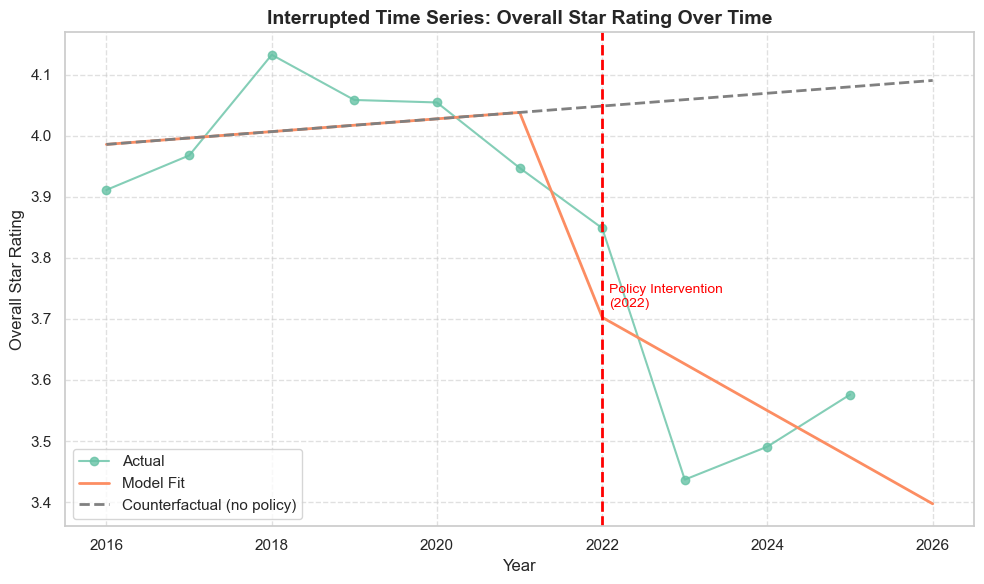

In [234]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ===============================
# USER INPUT
# ===============================
data = landscape_ca_yearly.copy()  
policy_date = pd.Timestamp('2022-01-01') 
y_variable = 'Overall Star Rating'  # You can change this to any variable

# ===============================
# CREATE TIME VARIABLES
# ===============================
data = data.sort_values('Date').reset_index(drop=True)
data['t'] = np.arange(len(data))
data['post'] = (data['Date'] >= policy_date).astype(int)
t0 = data.loc[data['Date'] >= policy_date, 't'].min()
data['after_t'] = (data['t'] - t0 + 1).where(data['post'] == 1, 0)

# ===============================
# OLS REGRESSION MODEL
# ===============================
model = smf.ols(f'Q("{y_variable}") ~ t + post + after_t', data=data).fit(cov_type='HAC', cov_kwds={'maxlags':1})
print(model.summary())

# ===============================
# CREATE FITTED & COUNTERFACTUAL VALUES
# ===============================
data['fitted'] = model.predict(data)
cf = data.copy()
cf['post'] = 0
cf['after_t'] = 0
data['counterfactual'] = model.predict(cf)

# ===============================
# PLOTTING
# ===============================
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data[y_variable], 'o-', label='Actual', alpha=0.8)
plt.plot(data['Date'], data['fitted'], '-', label='Model Fit', linewidth=2)
plt.plot(data['Date'], data['counterfactual'], '--', color='gray', linewidth=2, label='Counterfactual (no policy)')
plt.axvline(policy_date, color='red', linestyle='--', linewidth=2)
plt.text(policy_date + pd.Timedelta(days=30),
         data[y_variable].max()*0.9,
         f'Policy Intervention\n({policy_date.year})',
         color='red', fontsize=10)
plt.title(f'Interrupted Time Series: {y_variable} Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel(y_variable)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

2. for HI- Y= Avg Star Ratings

c:\Users\Prachi\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



                               OLS Regression Results                               
Dep. Variable:     Q("Overall Star Rating")   R-squared:                       0.655
Model:                                  OLS   Adj. R-squared:                  0.482
Method:                       Least Squares   F-statistic:                     503.1
Date:                      Mon, 08 Dec 2025   Prob (F-statistic):           1.36e-07
Time:                              16:10:14   Log-Likelihood:                 7.1283
No. Observations:                        10   AIC:                            -6.257
Df Residuals:                             6   BIC:                            -5.046
Df Model:                                 3                                         
Covariance Type:                        HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

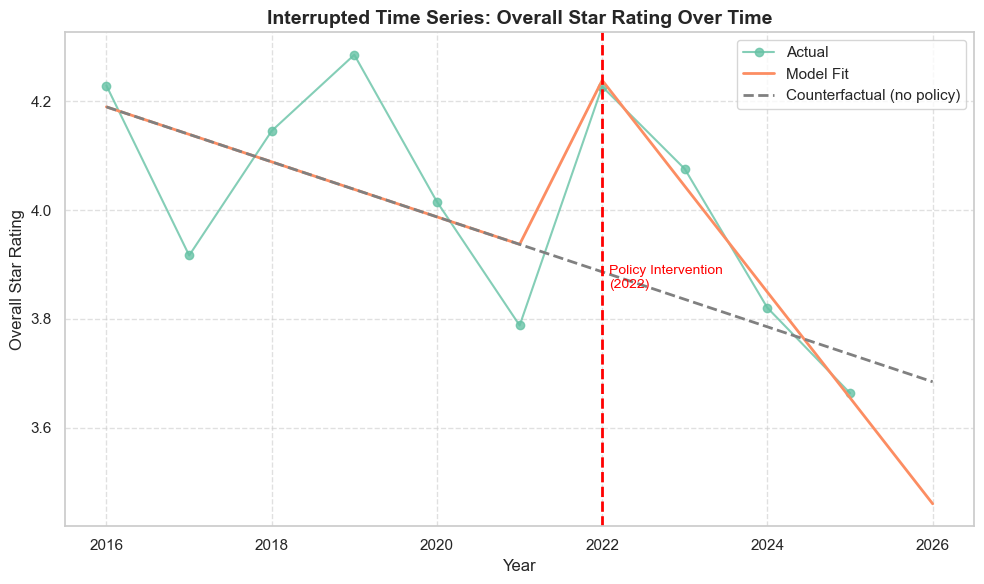

In [235]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ===============================
# USER INPUT
# ===============================
data = landscape_hi_yearly.copy()  
policy_date = pd.Timestamp('2022-01-01')  
y_variable = 'Overall Star Rating'  # You can change this to any variable

# ===============================
# CREATE TIME VARIABLES
# ===============================
data = data.sort_values('Date').reset_index(drop=True)
data['t'] = np.arange(len(data))
data['post'] = (data['Date'] >= policy_date).astype(int)
t0 = data.loc[data['Date'] >= policy_date, 't'].min()
data['after_t'] = (data['t'] - t0 + 1).where(data['post'] == 1, 0)

# ===============================
# OLS REGRESSION MODEL
# ===============================
model = smf.ols(f'Q("{y_variable}") ~ t + post + after_t', data=data).fit(cov_type='HAC', cov_kwds={'maxlags':1})
print(model.summary())

# ===============================
# CREATE FITTED & COUNTERFACTUAL VALUES
# ===============================
data['fitted'] = model.predict(data)
cf = data.copy()
cf['post'] = 0
cf['after_t'] = 0
data['counterfactual'] = model.predict(cf)

# ===============================
# PLOTTING
# ===============================
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data[y_variable], 'o-', label='Actual', alpha=0.8)
plt.plot(data['Date'], data['fitted'], '-', label='Model Fit', linewidth=2)
plt.plot(data['Date'], data['counterfactual'], '--', color='gray', linewidth=2, label='Counterfactual (no policy)')
plt.axvline(policy_date, color='red', linestyle='--', linewidth=2)
plt.text(policy_date + pd.Timedelta(days=30),
         data[y_variable].max()*0.9,
         f'Policy Intervention\n({policy_date.year})',
         color='red', fontsize=10)
plt.title(f'Interrupted Time Series: {y_variable} Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel(y_variable)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Policy 3 :  2018 CMS “Medicare Advantage & Part D Final Rule” (CMS-4182-F)

1. for CA- Y= Monthly Consolidated Premium

c:\Users\Prachi\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=11



                                          OLS Regression Results                                          
Dep. Variable:     Q("Monthly Consolidated Premium (Part C + D)")   R-squared:                       0.951
Model:                                                        OLS   Adj. R-squared:                  0.930
Method:                                             Least Squares   F-statistic:                     83.88
Date:                                            Mon, 08 Dec 2025   Prob (F-statistic):           7.51e-06
Time:                                                    16:10:15   Log-Likelihood:                -20.179
No. Observations:                                              11   AIC:                             48.36
Df Residuals:                                                   7   BIC:                             49.95
Df Model:                                                       3                                         
Covariance Type:                     

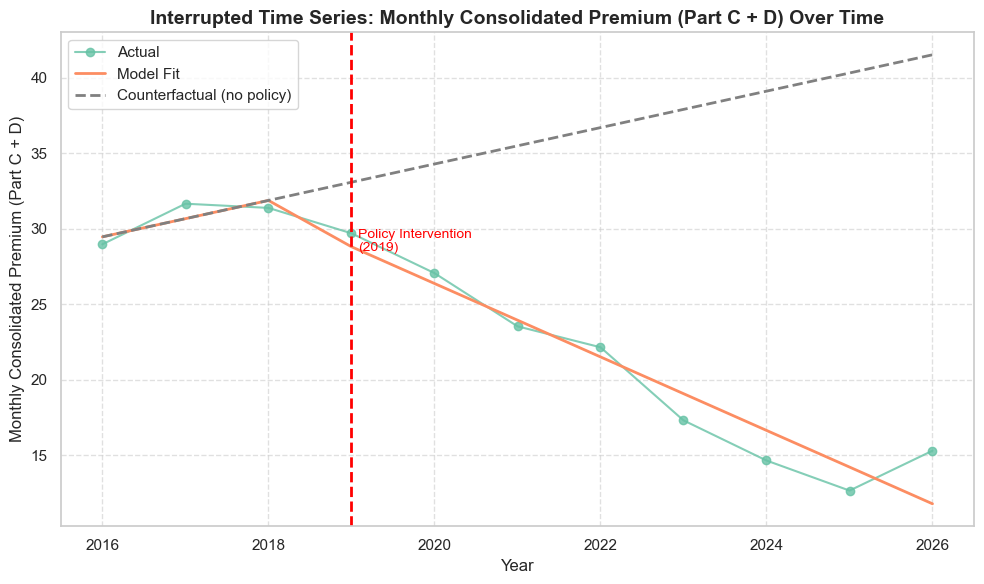

In [236]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ===============================
# USER INPUT
# ===============================
data = landscape_ca_yearly.copy()  
policy_date = pd.Timestamp('2019-01-01') 
y_variable = 'Monthly Consolidated Premium (Part C + D)'  # You can change this to any variable

# ===============================
# CREATE TIME VARIABLES
# ===============================
data = data.sort_values('Date').reset_index(drop=True)
data['t'] = np.arange(len(data))
data['post'] = (data['Date'] >= policy_date).astype(int)
t0 = data.loc[data['Date'] >= policy_date, 't'].min()
data['after_t'] = (data['t'] - t0 + 1).where(data['post'] == 1, 0)

# ===============================
# OLS REGRESSION MODEL
# ===============================
model = smf.ols(f'Q("{y_variable}") ~ t + post + after_t', data=data).fit(cov_type='HAC', cov_kwds={'maxlags':1})
print(model.summary())

# ===============================
# CREATE FITTED & COUNTERFACTUAL VALUES
# ===============================
data['fitted'] = model.predict(data)
cf = data.copy()
cf['post'] = 0
cf['after_t'] = 0
data['counterfactual'] = model.predict(cf)

# ===============================
# PLOTTING
# ===============================
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data[y_variable], 'o-', label='Actual', alpha=0.8)
plt.plot(data['Date'], data['fitted'], '-', label='Model Fit', linewidth=2)
plt.plot(data['Date'], data['counterfactual'], '--', color='gray', linewidth=2, label='Counterfactual (no policy)')
plt.axvline(policy_date, color='red', linestyle='--', linewidth=2)
plt.text(policy_date + pd.Timedelta(days=30),
         data[y_variable].max()*0.9,
         f'Policy Intervention\n({policy_date.year})',
         color='red', fontsize=10)
plt.title(f'Interrupted Time Series: {y_variable} Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel(y_variable)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


2. for HI- Y= Monthly COnsolidated Premium

c:\Users\Prachi\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=11



                                          OLS Regression Results                                          
Dep. Variable:     Q("Monthly Consolidated Premium (Part C + D)")   R-squared:                       0.949
Model:                                                        OLS   Adj. R-squared:                  0.928
Method:                                             Least Squares   F-statistic:                     100.1
Date:                                            Mon, 08 Dec 2025   Prob (F-statistic):           4.11e-06
Time:                                                    16:10:16   Log-Likelihood:                -34.187
No. Observations:                                              11   AIC:                             76.37
Df Residuals:                                                   7   BIC:                             77.97
Df Model:                                                       3                                         
Covariance Type:                     

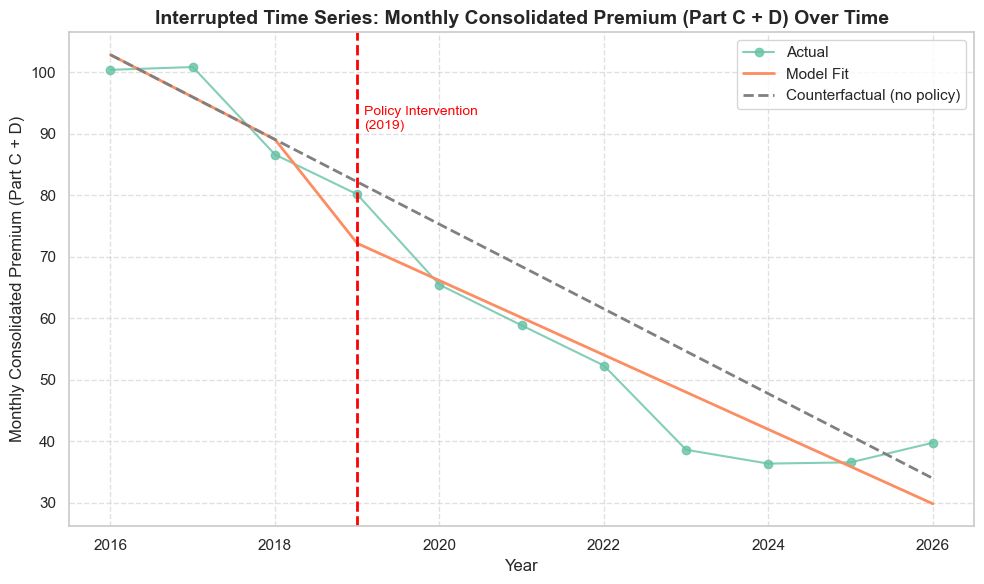

In [237]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ===============================
# USER INPUT
# ===============================
data = landscape_hi_yearly.copy()  
policy_date = pd.Timestamp('2019-01-01')
y_variable = 'Monthly Consolidated Premium (Part C + D)'  # You can change this to any variable

# ===============================
# CREATE TIME VARIABLES
# ===============================
data = data.sort_values('Date').reset_index(drop=True)
data['t'] = np.arange(len(data))
data['post'] = (data['Date'] >= policy_date).astype(int)
t0 = data.loc[data['Date'] >= policy_date, 't'].min()
data['after_t'] = (data['t'] - t0 + 1).where(data['post'] == 1, 0)

# ===============================
# OLS REGRESSION MODEL
# ===============================
model = smf.ols(f'Q("{y_variable}") ~ t + post + after_t', data=data).fit(cov_type='HAC', cov_kwds={'maxlags':1})
print(model.summary())

# ===============================
# CREATE FITTED & COUNTERFACTUAL VALUES
# ===============================
data['fitted'] = model.predict(data)
cf = data.copy()
cf['post'] = 0
cf['after_t'] = 0
data['counterfactual'] = model.predict(cf)

# ===============================
# PLOTTING
# ===============================
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data[y_variable], 'o-', label='Actual', alpha=0.8)
plt.plot(data['Date'], data['fitted'], '-', label='Model Fit', linewidth=2)
plt.plot(data['Date'], data['counterfactual'], '--', color='gray', linewidth=2, label='Counterfactual (no policy)')
plt.axvline(policy_date, color='red', linestyle='--', linewidth=2)
plt.text(policy_date + pd.Timedelta(days=30),
         data[y_variable].max()*0.9,
         f'Policy Intervention\n({policy_date.year})',
         color='red', fontsize=10)
plt.title(f'Interrupted Time Series: {y_variable} Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel(y_variable)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


1. for CA- Y= Annual Part D Deductibel Amount

c:\Users\Prachi\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=11



                                     OLS Regression Results                                     
Dep. Variable:     Q("Annual Part D Deductible Amount")   R-squared:                       0.298
Model:                                              OLS   Adj. R-squared:                 -0.003
Method:                                   Least Squares   F-statistic:                     7.411
Date:                                  Mon, 08 Dec 2025   Prob (F-statistic):             0.0141
Time:                                          16:10:17   Log-Likelihood:                -54.575
No. Observations:                                    11   AIC:                             117.1
Df Residuals:                                         7   BIC:                             118.7
Df Model:                                             3                                         
Covariance Type:                                    HAC                                         
                 coef    std e

<function matplotlib.pyplot.show(close=None, block=None)>

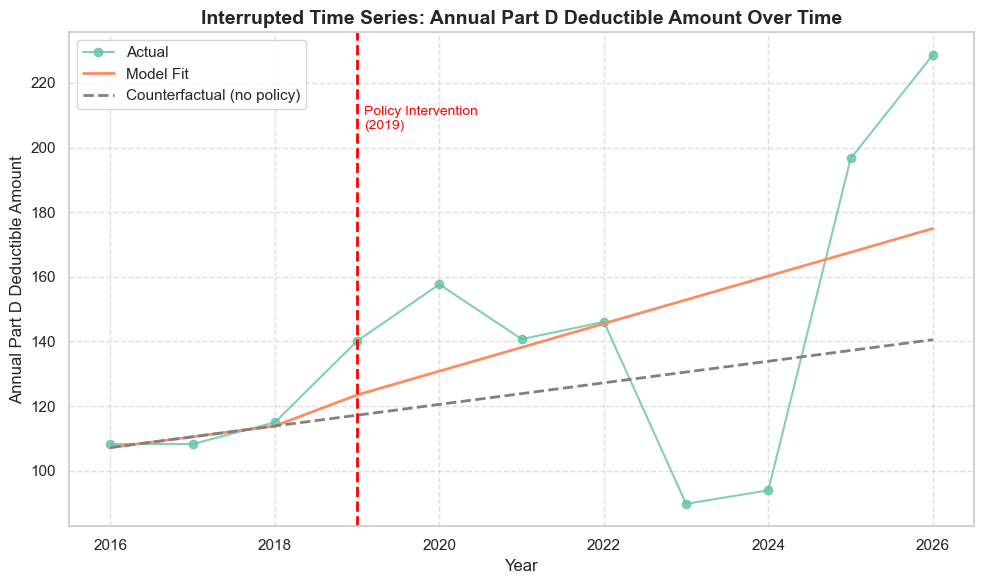

In [238]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ===============================
# USER INPUT
# ===============================
data = landscape_ca_yearly.copy()  
policy_date = pd.Timestamp('2019-01-01')  
y_variable = 'Annual Part D Deductible Amount'  # You can change this to any variable

# ===============================
# CREATE TIME VARIABLES
# ===============================
data = data.sort_values('Date').reset_index(drop=True)
data['t'] = np.arange(len(data))
data['post'] = (data['Date'] >= policy_date).astype(int)
t0 = data.loc[data['Date'] >= policy_date, 't'].min()
data['after_t'] = (data['t'] - t0 + 1).where(data['post'] == 1, 0)

# ===============================
# OLS REGRESSION MODEL
# ===============================
model = smf.ols(f'Q("{y_variable}") ~ t + post + after_t', data=data).fit(cov_type='HAC', cov_kwds={'maxlags':1})
print(model.summary())

# ===============================
# CREATE FITTED & COUNTERFACTUAL VALUES
# ===============================
data['fitted'] = model.predict(data)
cf = data.copy()
cf['post'] = 0
cf['after_t'] = 0
data['counterfactual'] = model.predict(cf)

# ===============================
# PLOTTING
# ===============================
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data[y_variable], 'o-', label='Actual', alpha=0.8)
plt.plot(data['Date'], data['fitted'], '-', label='Model Fit', linewidth=2)
plt.plot(data['Date'], data['counterfactual'], '--', color='gray', linewidth=2, label='Counterfactual (no policy)')
plt.axvline(policy_date, color='red', linestyle='--', linewidth=2)
plt.text(policy_date + pd.Timedelta(days=30),
         data[y_variable].max()*0.9,
         f'Policy Intervention\n({policy_date.year})',
         color='red', fontsize=10)
plt.title(f'Interrupted Time Series: {y_variable} Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel(y_variable)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show

2. for HI- Y= Annual Part D Deductible Amount

c:\Users\Prachi\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=11



                                     OLS Regression Results                                     
Dep. Variable:     Q("Annual Part D Deductible Amount")   R-squared:                       0.391
Model:                                              OLS   Adj. R-squared:                  0.129
Method:                                   Least Squares   F-statistic:                     13.38
Date:                                  Mon, 08 Dec 2025   Prob (F-statistic):            0.00276
Time:                                          16:10:18   Log-Likelihood:                -62.286
No. Observations:                                    11   AIC:                             132.6
Df Residuals:                                         7   BIC:                             134.2
Df Model:                                             3                                         
Covariance Type:                                    HAC                                         
                 coef    std e

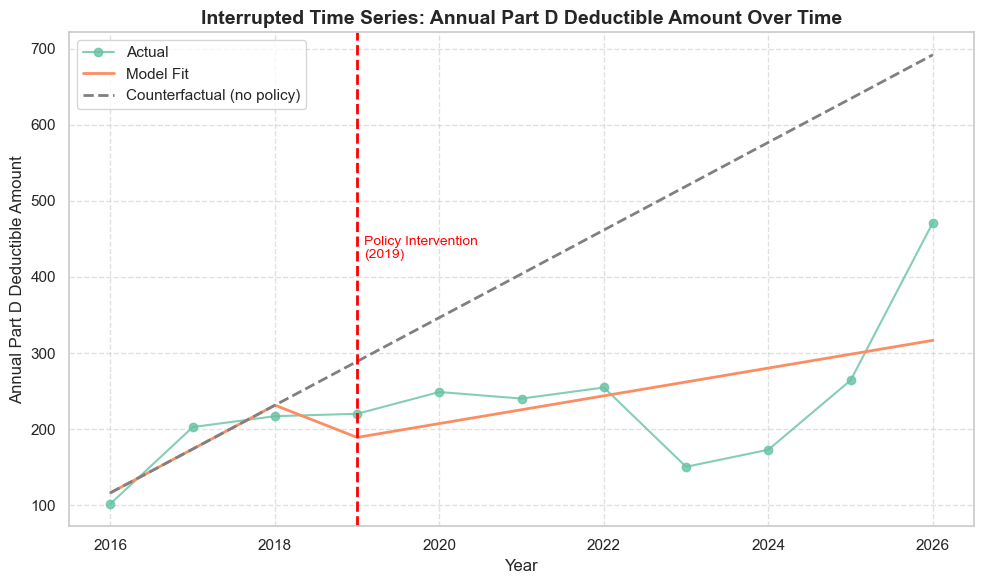

In [239]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ===============================
# USER INPUT
# ===============================
data = landscape_hi_yearly.copy()  
policy_date = pd.Timestamp('2019-01-01') 
y_variable = 'Annual Part D Deductible Amount'  # You can change this to any variable

# ===============================
# CREATE TIME VARIABLES
# ===============================
data = data.sort_values('Date').reset_index(drop=True)
data['t'] = np.arange(len(data))
data['post'] = (data['Date'] >= policy_date).astype(int)
t0 = data.loc[data['Date'] >= policy_date, 't'].min()
data['after_t'] = (data['t'] - t0 + 1).where(data['post'] == 1, 0)

# ===============================
# OLS REGRESSION MODEL
# ===============================
model = smf.ols(f'Q("{y_variable}") ~ t + post + after_t', data=data).fit(cov_type='HAC', cov_kwds={'maxlags':1})
print(model.summary())

# ===============================
# CREATE FITTED & COUNTERFACTUAL VALUES
# ===============================
data['fitted'] = model.predict(data)
cf = data.copy()
cf['post'] = 0
cf['after_t'] = 0
data['counterfactual'] = model.predict(cf)

# ===============================
# PLOTTING
# ===============================
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data[y_variable], 'o-', label='Actual', alpha=0.8)
plt.plot(data['Date'], data['fitted'], '-', label='Model Fit', linewidth=2)
plt.plot(data['Date'], data['counterfactual'], '--', color='gray', linewidth=2, label='Counterfactual (no policy)')
plt.axvline(policy_date, color='red', linestyle='--', linewidth=2)
plt.text(policy_date + pd.Timedelta(days=30),
         data[y_variable].max()*0.9,
         f'Policy Intervention\n({policy_date.year})',
         color='red', fontsize=10)
plt.title(f'Interrupted Time Series: {y_variable} Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel(y_variable)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

1. for CA- In Network MOOP Amount

c:\Users\Prachi\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=11



                                 OLS Regression Results                                
Dep. Variable:     Q("In-network MOOP Amount")   R-squared:                       0.956
Model:                                     OLS   Adj. R-squared:                  0.937
Method:                          Least Squares   F-statistic:                     88.90
Date:                         Mon, 08 Dec 2025   Prob (F-statistic):           6.17e-06
Time:                                 16:10:19   Log-Likelihood:                -68.047
No. Observations:                           11   AIC:                             144.1
Df Residuals:                                7   BIC:                             145.7
Df Model:                                    3                                         
Covariance Type:                           HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

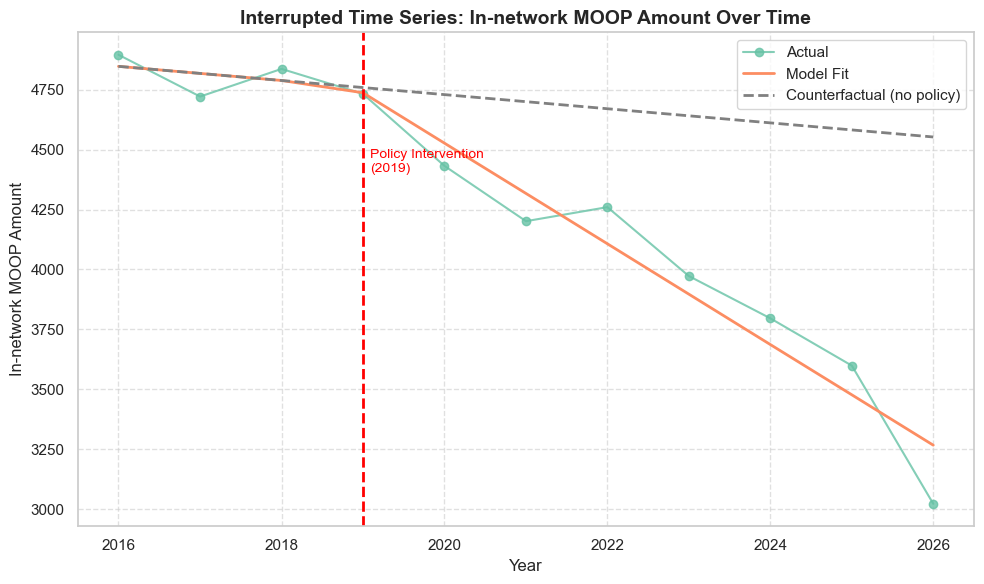

In [240]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ===============================
# USER INPUT
# ===============================
data = landscape_ca_yearly.copy()  
policy_date = pd.Timestamp('2019-01-01')
y_variable = 'In-network MOOP Amount'  # You can change this to any variable

# ===============================
# CREATE TIME VARIABLES
# ===============================
data = data.sort_values('Date').reset_index(drop=True)
data['t'] = np.arange(len(data))
data['post'] = (data['Date'] >= policy_date).astype(int)
t0 = data.loc[data['Date'] >= policy_date, 't'].min()
data['after_t'] = (data['t'] - t0 + 1).where(data['post'] == 1, 0)

# ===============================
# OLS REGRESSION MODEL
# ===============================
model = smf.ols(f'Q("{y_variable}") ~ t + post + after_t', data=data).fit(cov_type='HAC', cov_kwds={'maxlags':1})
print(model.summary())

# ===============================
# CREATE FITTED & COUNTERFACTUAL VALUES
# ===============================
data['fitted'] = model.predict(data)
cf = data.copy()
cf['post'] = 0
cf['after_t'] = 0
data['counterfactual'] = model.predict(cf)

# ===============================
# PLOTTING
# ===============================
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data[y_variable], 'o-', label='Actual', alpha=0.8)
plt.plot(data['Date'], data['fitted'], '-', label='Model Fit', linewidth=2)
plt.plot(data['Date'], data['counterfactual'], '--', color='gray', linewidth=2, label='Counterfactual (no policy)')
plt.axvline(policy_date, color='red', linestyle='--', linewidth=2)
plt.text(policy_date + pd.Timedelta(days=30),
         data[y_variable].max()*0.9,
         f'Policy Intervention\n({policy_date.year})',
         color='red', fontsize=10)
plt.title(f'Interrupted Time Series: {y_variable} Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel(y_variable)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

2. for HI- In Network MOOP Amount

c:\Users\Prachi\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=11



                                 OLS Regression Results                                
Dep. Variable:     Q("In-network MOOP Amount")   R-squared:                       0.901
Model:                                     OLS   Adj. R-squared:                  0.859
Method:                          Least Squares   F-statistic:                     83.68
Date:                         Mon, 08 Dec 2025   Prob (F-statistic):           7.57e-06
Time:                                 16:10:21   Log-Likelihood:                -72.771
No. Observations:                           11   AIC:                             153.5
Df Residuals:                                7   BIC:                             155.1
Df Model:                                    3                                         
Covariance Type:                           HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

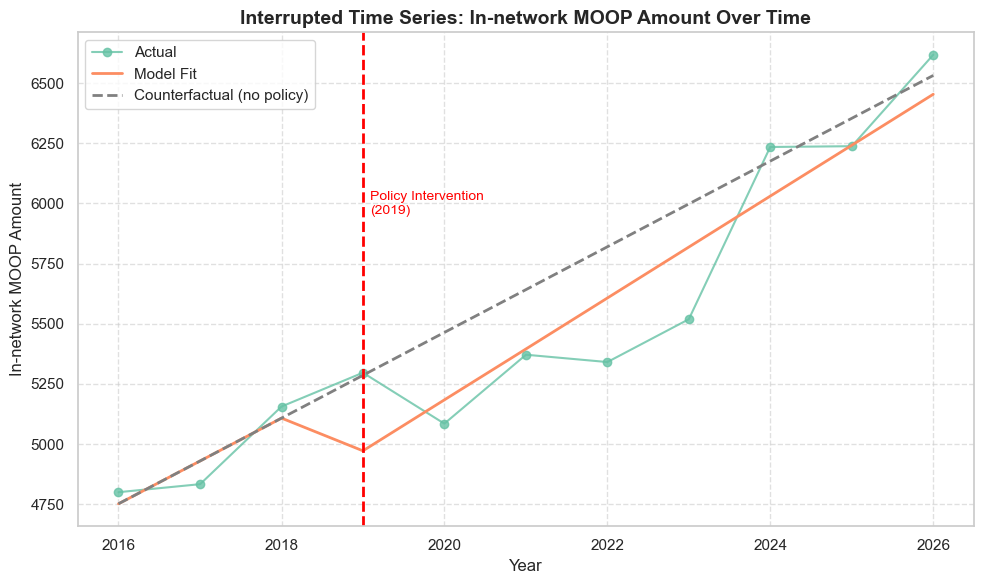

In [241]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ===============================
# USER INPUT
# ===============================
data = landscape_hi_yearly.copy()  
policy_date = pd.Timestamp('2019-01-01')
y_variable = 'In-network MOOP Amount'  # You can change this to any variable

# ===============================
# CREATE TIME VARIABLES
# ===============================
data = data.sort_values('Date').reset_index(drop=True)
data['t'] = np.arange(len(data))
data['post'] = (data['Date'] >= policy_date).astype(int)
t0 = data.loc[data['Date'] >= policy_date, 't'].min()
data['after_t'] = (data['t'] - t0 + 1).where(data['post'] == 1, 0)

# ===============================
# OLS REGRESSION MODEL
# ===============================
model = smf.ols(f'Q("{y_variable}") ~ t + post + after_t', data=data).fit(cov_type='HAC', cov_kwds={'maxlags':1})
print(model.summary())

# ===============================
# CREATE FITTED & COUNTERFACTUAL VALUES
# ===============================
data['fitted'] = model.predict(data)
cf = data.copy()
cf['post'] = 0
cf['after_t'] = 0
data['counterfactual'] = model.predict(cf)

# ===============================
# PLOTTING
# ===============================
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data[y_variable], 'o-', label='Actual', alpha=0.8)
plt.plot(data['Date'], data['fitted'], '-', label='Model Fit', linewidth=2)
plt.plot(data['Date'], data['counterfactual'], '--', color='gray', linewidth=2, label='Counterfactual (no policy)')
plt.axvline(policy_date, color='red', linestyle='--', linewidth=2)
plt.text(policy_date + pd.Timedelta(days=30),
         data[y_variable].max()*0.9,
         f'Policy Intervention\n({policy_date.year})',
         color='red', fontsize=10)
plt.title(f'Interrupted Time Series: {y_variable} Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel(y_variable)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

1. for CA- Y= Avg. Star Ratings

c:\Users\Prachi\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



                               OLS Regression Results                               
Dep. Variable:     Q("Overall Star Rating")   R-squared:                       0.841
Model:                                  OLS   Adj. R-squared:                  0.761
Method:                       Least Squares   F-statistic:                     42.97
Date:                      Mon, 08 Dec 2025   Prob (F-statistic):           0.000189
Time:                              16:10:22   Log-Likelihood:                 9.3488
No. Observations:                        10   AIC:                            -10.70
Df Residuals:                             6   BIC:                            -9.487
Df Model:                                 3                                         
Covariance Type:                        HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

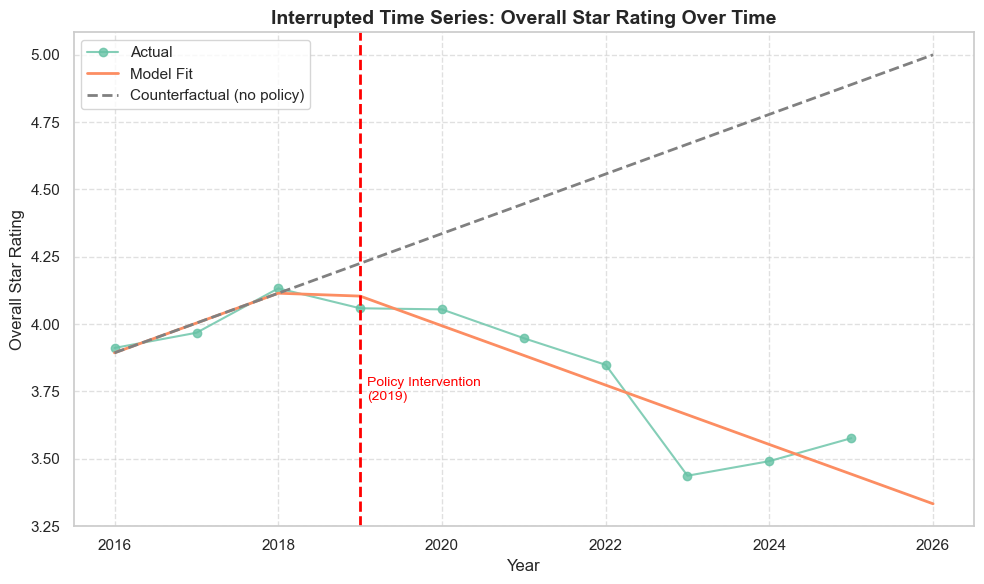

In [242]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ===============================
# USER INPUT
# ===============================
data = landscape_ca_yearly.copy()  
policy_date = pd.Timestamp('2019-01-01') 
y_variable = 'Overall Star Rating'  # You can change this to any variable

# ===============================
# CREATE TIME VARIABLES
# ===============================
data = data.sort_values('Date').reset_index(drop=True)
data['t'] = np.arange(len(data))
data['post'] = (data['Date'] >= policy_date).astype(int)
t0 = data.loc[data['Date'] >= policy_date, 't'].min()
data['after_t'] = (data['t'] - t0 + 1).where(data['post'] == 1, 0)

# ===============================
# OLS REGRESSION MODEL
# ===============================
model = smf.ols(f'Q("{y_variable}") ~ t + post + after_t', data=data).fit(cov_type='HAC', cov_kwds={'maxlags':1})
print(model.summary())

# ===============================
# CREATE FITTED & COUNTERFACTUAL VALUES
# ===============================
data['fitted'] = model.predict(data)
cf = data.copy()
cf['post'] = 0
cf['after_t'] = 0
data['counterfactual'] = model.predict(cf)

# ===============================
# PLOTTING
# ===============================
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data[y_variable], 'o-', label='Actual', alpha=0.8)
plt.plot(data['Date'], data['fitted'], '-', label='Model Fit', linewidth=2)
plt.plot(data['Date'], data['counterfactual'], '--', color='gray', linewidth=2, label='Counterfactual (no policy)')
plt.axvline(policy_date, color='red', linestyle='--', linewidth=2)
plt.text(policy_date + pd.Timedelta(days=30),
         data[y_variable].max()*0.9,
         f'Policy Intervention\n({policy_date.year})',
         color='red', fontsize=10)
plt.title(f'Interrupted Time Series: {y_variable} Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel(y_variable)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

2. for HI- Y= Avg. Star Ratings

c:\Users\Prachi\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



                               OLS Regression Results                               
Dep. Variable:     Q("Overall Star Rating")   R-squared:                       0.416
Model:                                  OLS   Adj. R-squared:                  0.124
Method:                       Least Squares   F-statistic:                     5.110
Date:                      Mon, 08 Dec 2025   Prob (F-statistic):             0.0432
Time:                              16:10:23   Log-Likelihood:                 4.5007
No. Observations:                        10   AIC:                            -1.001
Df Residuals:                             6   BIC:                            0.2090
Df Model:                                 3                                         
Covariance Type:                        HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

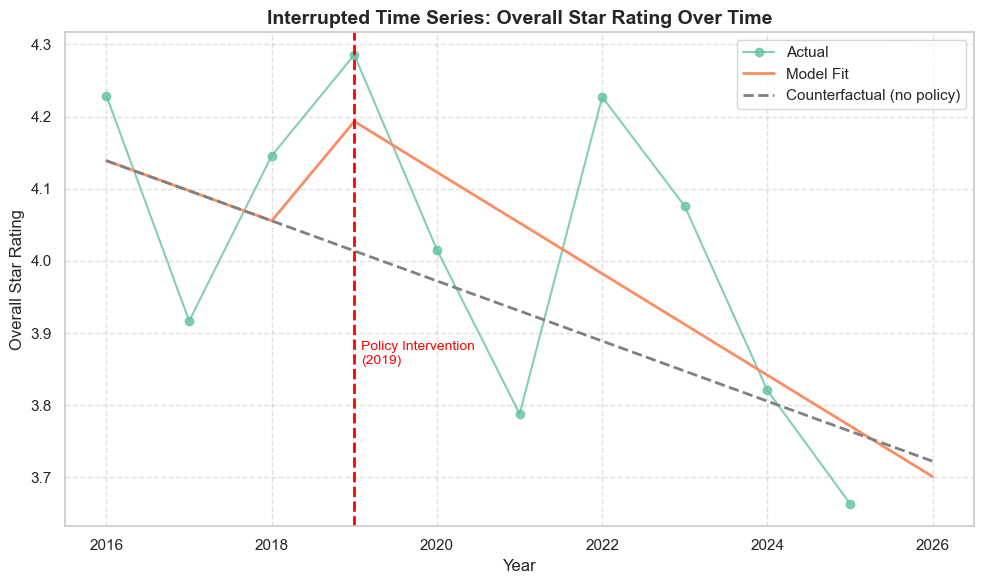

In [243]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ===============================
# USER INPUT
# ===============================
data = landscape_hi_yearly.copy()  
policy_date = pd.Timestamp('2019-01-01') 
y_variable = 'Overall Star Rating' 

# ===============================
# CREATE TIME VARIABLES
# ===============================
data = data.sort_values('Date').reset_index(drop=True)
data['t'] = np.arange(len(data))
data['post'] = (data['Date'] >= policy_date).astype(int)
t0 = data.loc[data['Date'] >= policy_date, 't'].min()
data['after_t'] = (data['t'] - t0 + 1).where(data['post'] == 1, 0)

# ===============================
# OLS REGRESSION MODEL
# ===============================
model = smf.ols(f'Q("{y_variable}") ~ t + post + after_t', data=data).fit(cov_type='HAC', cov_kwds={'maxlags':1})
print(model.summary())

# ===============================
# CREATE FITTED & COUNTERFACTUAL VALUES
# ===============================
data['fitted'] = model.predict(data)
cf = data.copy()
cf['post'] = 0
cf['after_t'] = 0
data['counterfactual'] = model.predict(cf)

# ===============================
# PLOTTING
# ===============================
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data[y_variable], 'o-', label='Actual', alpha=0.8)
plt.plot(data['Date'], data['fitted'], '-', label='Model Fit', linewidth=2)
plt.plot(data['Date'], data['counterfactual'], '--', color='gray', linewidth=2, label='Counterfactual (no policy)')
plt.axvline(policy_date, color='red', linestyle='--', linewidth=2)
plt.text(policy_date + pd.Timedelta(days=30),
         data[y_variable].max()*0.9,
         f'Policy Intervention\n({policy_date.year})',
         color='red', fontsize=10)
plt.title(f'Interrupted Time Series: {y_variable} Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel(y_variable)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Problem Statement 2 : Star Ratings

In [244]:
print("Landscape HEDIS columns:", landscape_hedis.columns.tolist())
print("Disenrollment columns:", disenrollment.columns.tolist())


Landscape HEDIS columns: ['State', 'County', 'Organization Name', 'Plan Type', 'Monthly Consolidated Premium (Part C + D)', 'Annual Part D Deductible Amount', 'Drug Benefit Category', 'Contract ID', 'Plan ID', 'In-network MOOP Amount', 'Overall Star Rating', 'Contract Year', 'HEDIS Measure Code', 'HEDIS Rate']
Disenrollment columns: ['Contract ID', 'Problems Getting Needed Care, Coverage, and Cost Information (%)', 'Problems with Coverage of Doctors and Hospitals (%)', 'Financial Reasons for Disenrollment (%)', 'Problems with Prescription Drug Benefits and Coverage (%)', 'Problems Getting Information and Help from the Plan (%)', 'Contract Year']


In [245]:
# Merge landscape, HEDIS, and disenrollment data
# Ensure Contract ID and Contract Year are clean
landscape_hedis['Contract ID'] = landscape_hedis['Contract ID'].astype(str).str.strip().str.upper()
disenrollment['Contract ID'] = disenrollment['Contract ID'].astype(str).str.strip().str.upper()

# Merge landscape_hedis with disenrollment
ldh = pd.merge(
    landscape_hedis, 
    disenrollment, 
    on=['Contract ID', 'Contract Year'], 
    how='inner'
)

print(f"Merged dataset shape: {ldh.shape}")
print(f"Columns: {ldh.columns.tolist()}")

Merged dataset shape: (1015529, 19)
Columns: ['State', 'County', 'Organization Name', 'Plan Type', 'Monthly Consolidated Premium (Part C + D)', 'Annual Part D Deductible Amount', 'Drug Benefit Category', 'Contract ID', 'Plan ID', 'In-network MOOP Amount', 'Overall Star Rating', 'Contract Year', 'HEDIS Measure Code', 'HEDIS Rate', 'Problems Getting Needed Care, Coverage, and Cost Information (%)', 'Problems with Coverage of Doctors and Hospitals (%)', 'Financial Reasons for Disenrollment (%)', 'Problems with Prescription Drug Benefits and Coverage (%)', 'Problems Getting Information and Help from the Plan (%)']


In [246]:
pd.set_option('display.float_format', '{:.2f}'.format)
ldh.describe()

Monthly Consolidated Premium (Part C + D)  \
count                                 1015529.00   
mean                                       22.22   
std                                        33.20   
min                                         0.00   
25%                                         0.00   
50%                                         0.00   
75%                                        31.50   
max                                       312.00   

       Annual Part D Deductible Amount  In-network MOOP Amount  \
count                       1015529.00              1015529.00   
mean                            128.30                 4214.74   
std                             197.62                 2340.90   
min                               0.00                  198.00   
25%                               0.00                 2500.00   
50%                               0.00                 3850.00   
75%                             300.00                 6700.00   
max                             545.00                 8850.00   

       Overall Star Rating  Contract Year  HEDIS Rate  \
count            971696.00     1015529.00  1015529.00   
mean                  3.83        2022.12       18.32   
std                   0.61           1.02       28.56   
min                   2.00        2021.00        0.01   
25%                   3.50        2021.00        0.88   
50%                   4.00        2022.00        3.77   
75%                   4.00        2023.00       20.17   
max                   5.00        2024.00      100.00   

       Problems Getting Needed Care, Coverage, and Cost Information (%)  \
count                                          499861.00                  
mean                                               19.91                  
std                                                 5.85                  
min                                                 8.00                  
25%                                                17.00                  
50%                                                18.00                  
75%                                                26.00                  
max                                                35.00                  

       Problems with Coverage of Doctors and Hospitals (%)  \
count                                          924734.00     
mean                                               26.92     
std                                                 9.90     
min                                                 4.00     
25%                                                21.00     
50%                                                25.00     
75%                                                31.00     
max                                                53.00     

       Financial Reasons for Disenrollment (%)  \
count                                924734.00   
mean                                     21.73   
std                                       7.65   
min                                       8.00   
25%                                      17.00   
50%                                      21.00   
75%                                      27.00   
max                                      57.00   

       Problems with Prescription Drug Benefits and Coverage (%)  \
count                                          401756.00           
mean                                               10.19           
std                                                 2.51           
min                                                 5.00           
25%                                                 8.00           
50%                                                10.00           
75%                                                11.00           
max                                                17.00           

       Problems Getting Information and Help from the Plan (%)  
count                                          895474.00        


In [247]:
ldh

State   County          Organization Name  Plan Type  \
0        California  Alameda  Blue Shield Of California  Local HMO   
1        California  Alameda  Blue Shield Of California  Local HMO   
2        California  Alameda  Blue Shield Of California  Local HMO   
3        California  Alameda  Blue Shield Of California  Local HMO   
4        California  Alameda  Blue Shield Of California  Local HMO   
...             ...      ...                        ...        ...   
1015524      Hawaii     Maui                   Wellcare  Local PPO   
1015525      Hawaii     Maui                   Wellcare  Local PPO   
1015526      Hawaii     Maui                   Wellcare  Local PPO   
1015527      Hawaii     Maui                   Wellcare  Local PPO   
1015528      Hawaii     Maui                   Wellcare  Local PPO   

         Monthly Consolidated Premium (Part C + D)  \
0                                            45.00   
1                                            45.00   
2                                            45.00   
3                                            45.00   
4                                            45.00   
...                                            ...   
1015524                                      33.00   
1015525                                      33.00   
1015526                                      33.00   
1015527                                      33.00   
1015528                                      33.00   

         Annual Part D Deductible Amount Drug Benefit Category Contract ID  \
0                                   0.00              Enhanced       H0504   
1                                   0.00              Enhanced       H0504   
2                                   0.00              Enhanced       H0504   
3                                   0.00              Enhanced       H0504   
4                                   0.00              Enhanced       H0504   
...                                  ...                   ...         ...   
1015524                           300.00              Enhanced       H6605   
1015525                           300.00              Enhanced       H6605   
1015526                           300.00              Enhanced       H6605   
1015527                           300.00              Enhanced       H6605   
1015528                           300.00              Enhanced       H6605   

        Plan ID  In-network MOOP Amount  Overall Star Rating  Contract Year  \
0            41                 5000.00                 4.00           2021   
1            41                 5000.00                 4.00           2021   
2            41                 5000.00                 4.00           2021   
3            41                 5000.00                 4.00           2021   
4            41                 5000.00                 4.00           2021   
...         ...                     ...                  ...            ...   
1015524       4                 8850.00                 2.00           2024   
1015525       4                 8850.00                 2.00           2024   
1015526       4                 8850.00                 2.00           2024   
1015527       4                 8850.00                 2.00           2024   
1015528       4                 8850.00                 2.00           2024   

        HEDIS Measure Code  HEDIS Rate  \
0                      AAP       87.38   
1                      AAP       95.21   
2                      AAP       94.00   
3                      AAP       94.03   
4                      ABX        0.09   
...                    ...         ...   
1015524                TRC        8.97   
1015525                TRC       10.80   
1015526                UOP        3.16   
1015527                UOP       25.26   
1015528                UOP        2.11   

         Problems Getting Needed Care, Coverage, and Cost Information (%)  \
0                                                      N

In [248]:
ldh.dtypes

State                                                                object
County                                                               object
Organization Name                                                    object
Plan Type                                                            object
Monthly Consolidated Premium (Part C + D)                           float64
Annual Part D Deductible Amount                                     float64
Drug Benefit Category                                                object
Contract ID                                                          object
Plan ID                                                              object
In-network MOOP Amount                                              float64
Overall Star Rating                                                 float64
Contract Year                                                         int64
HEDIS Measure Code                                                   object
HEDIS Rate  

Data Prep for ML good to go!

## PREDICTING OVERALL STAR RATING

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

I am working only on CA data from now on

In [250]:
ldh["State"].value_counts()

State
California    969154
Hawaii         46375
Name: count, dtype: int64

In [251]:
#selecting rows only where State = CA
df = ldh[ldh['State'] == 'California'].copy()

#dropping the "State" column
df = df.drop(columns=['State'])


In [252]:
# Basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print("\nColumn names:")
print(df.columns.tolist())

Dataset shape: (969154, 18)
Number of rows: 969154
Number of columns: 18

Column names:
['County', 'Organization Name', 'Plan Type', 'Monthly Consolidated Premium (Part C + D)', 'Annual Part D Deductible Amount', 'Drug Benefit Category', 'Contract ID', 'Plan ID', 'In-network MOOP Amount', 'Overall Star Rating', 'Contract Year', 'HEDIS Measure Code', 'HEDIS Rate', 'Problems Getting Needed Care, Coverage, and Cost Information (%)', 'Problems with Coverage of Doctors and Hospitals (%)', 'Financial Reasons for Disenrollment (%)', 'Problems with Prescription Drug Benefits and Coverage (%)', 'Problems Getting Information and Help from the Plan (%)']


Selecting features & target

In [299]:
target = 'Overall Star Rating'

In [300]:
feature_columns = [
    'Monthly Consolidated Premium (Part C + D)',
    'Annual Part D Deductible Amount',
    'In-network MOOP Amount',
    'HEDIS Rate',
    'Problems Getting Needed Care, Coverage, and Cost Information (%)',
    'Problems with Coverage of Doctors and Hospitals (%)',
    'Financial Reasons for Disenrollment (%)',
    'Problems with Prescription Drug Benefits and Coverage (%)',
    'Problems Getting Information and Help from the Plan (%)',
    'Plan Type',
    'Drug Benefit Category'
]

In [301]:
print(f"Target: {target}")
print(f"Number of features: {len(feature_columns)}")

Target: Overall Star Rating
Number of features: 11


Cleaning

In [302]:
# Create working dataframe with only needed columns
df_ml = df[feature_columns + [target]].copy()

print(f"Initial shape: {df_ml.shape}")
print(f"\nMissing values before cleaning:")
print(df_ml.isnull().sum())

Initial shape: (969154, 12)

Missing values before cleaning:
Monthly Consolidated Premium (Part C + D)                                0
Annual Part D Deductible Amount                                          0
In-network MOOP Amount                                                   0
HEDIS Rate                                                               0
Problems Getting Needed Care, Coverage, and Cost Information (%)    490445
Problems with Coverage of Doctors and Hospitals (%)                  86794
Financial Reasons for Disenrollment (%)                              86794
Problems with Prescription Drug Benefits and Coverage (%)           585553
Problems Getting Information and Help from the Plan (%)             116054
Plan Type                                                                0
Drug Benefit Category                                                    0
Overall Star Rating                                                  43082
dtype: int64


In [303]:
(df.isnull().mean() * 100).sort_values(ascending=False)


Problems with Prescription Drug Benefits and Coverage (%)          60.42
Problems Getting Needed Care, Coverage, and Cost Information (%)   50.61
Problems Getting Information and Help from the Plan (%)            11.97
Financial Reasons for Disenrollment (%)                             8.96
Problems with Coverage of Doctors and Hospitals (%)                 8.96
Overall Star Rating                                                 4.45
Contract ID                                                         0.00
Plan ID                                                             0.00
In-network MOOP Amount                                              0.00
Organization Name                                                   0.00
Contract Year                                                       0.00
HEDIS Measure Code                                                  0.00
HEDIS Rate                                                          0.00
Drug Benefit Category                              

In [304]:
df_ml = df_ml.dropna(subset=[target])
print(f"\nShape after dropping missing target: {df_ml.shape}")


Shape after dropping missing target: (926072, 12)


In [305]:
# Fill missing numeric values with median
numeric_cols = df_ml.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df_ml[col].isnull().sum() > 0:
        median_value = df_ml[col].median()
        df_ml[col].fillna(median_value, inplace=True)
        print(f"Filled {col} with median: {median_value:.2f}")

Filled Problems Getting Needed Care, Coverage, and Cost Information (%) with median: 18.00
Filled Problems with Coverage of Doctors and Hospitals (%) with median: 25.00
Filled Financial Reasons for Disenrollment (%) with median: 20.00
Filled Problems with Prescription Drug Benefits and Coverage (%) with median: 10.00
Filled Problems Getting Information and Help from the Plan (%) with median: 16.00


Encoding categorical variables

In [306]:
le_plan = LabelEncoder()
df_ml['Plan Type_encoded'] = le_plan.fit_transform(df_ml['Plan Type'])
print(f"Plan Type categories: {le_plan.classes_}")

# Encode Drug Benefit Category
le_drug = LabelEncoder()
df_ml['Drug Benefit Category_encoded'] = le_drug.fit_transform(df_ml['Drug Benefit Category'])
print(f"Drug Benefit categories: {le_drug.classes_}")

# Drop original categorical columns
df_ml = df_ml.drop(['Plan Type', 'Drug Benefit Category'], axis=1)

print(f"\nFinal columns for modeling:")
print(df_ml.columns.tolist())

Plan Type categories: ['Local HMO' 'Local PPO']
Drug Benefit categories: ['Basic' 'Enhanced']

Final columns for modeling:
['Monthly Consolidated Premium (Part C + D)', 'Annual Part D Deductible Amount', 'In-network MOOP Amount', 'HEDIS Rate', 'Problems Getting Needed Care, Coverage, and Cost Information (%)', 'Problems with Coverage of Doctors and Hospitals (%)', 'Financial Reasons for Disenrollment (%)', 'Problems with Prescription Drug Benefits and Coverage (%)', 'Problems Getting Information and Help from the Plan (%)', 'Overall Star Rating', 'Plan Type_encoded', 'Drug Benefit Category_encoded']


Separating features & target

In [310]:
X = df_ml.drop(target, axis=1)
y = df_ml[target]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nTarget statistics:")
print(y.describe())

Features shape: (926072, 11)
Target shape: (926072,)

Target statistics:
count   926072.00
mean         3.82
std          0.61
min          2.50
25%          3.50
50%          4.00
75%          4.00
max          5.00
Name: Overall Star Rating, dtype: float64


In [313]:
y

0         4.00
1         4.00
2         4.00
3         4.00
4         4.00
          ... 
1009782   2.50
1009783   2.50
1009784   2.50
1009785   2.50
1009786   2.50
Name: Overall Star Rating, Length: 926072, dtype: float64

Train test split

In [314]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 740857 samples
Test set size: 185215 samples


Feature Scaling

In [315]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model 1 - Linear Regression

In [316]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

lr_train_pred = lr_model.predict(X_train_scaled)
lr_test_pred = lr_model.predict(X_test_scaled)

lr_train_r2 = r2_score(y_train, lr_train_pred)
lr_test_r2 = r2_score(y_test, lr_test_pred)
lr_test_rmse = np.sqrt(mean_squared_error(y_test, lr_test_pred))
lr_test_mae = mean_absolute_error(y_test, lr_test_pred)

print(f"Train R²: {lr_train_r2:.4f}")
print(f"Test R²: {lr_test_r2:.4f}")
print(f"Test RMSE: {lr_test_rmse:.4f}")
print(f"Test MAE: {lr_test_mae:.4f}")

Train R²: 0.4843
Test R²: 0.4825
Test RMSE: 0.4391
Test MAE: 0.3492


Model 2 - Ridge Regression

In [317]:
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_scaled, y_train)

ridge_train_pred = ridge_model.predict(X_train_scaled)
ridge_test_pred = ridge_model.predict(X_test_scaled)

ridge_train_r2 = r2_score(y_train, ridge_train_pred)
ridge_test_r2 = r2_score(y_test, ridge_test_pred)
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, ridge_test_pred))
ridge_test_mae = mean_absolute_error(y_test, ridge_test_pred)

print(f"Train R²: {ridge_train_r2:.4f}")
print(f"Test R²: {ridge_test_r2:.4f}")
print(f"Test RMSE: {ridge_test_rmse:.4f}")
print(f"Test MAE: {ridge_test_mae:.4f}")

Train R²: 0.4843
Test R²: 0.4825
Test RMSE: 0.4391
Test MAE: 0.3492


Model 3- Random Forest Regressor

In [318]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

rf_train_r2 = r2_score(y_train, rf_train_pred)
rf_test_r2 = r2_score(y_test, rf_test_pred)
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_pred))
rf_test_mae = mean_absolute_error(y_test, rf_test_pred)

print(f"Train R²: {rf_train_r2:.4f}")
print(f"Test R²: {rf_test_r2:.4f}")
print(f"Test RMSE: {rf_test_rmse:.4f}")
print(f"Test MAE: {rf_test_mae:.4f}")

Train R²: 0.9249
Test R²: 0.9238
Test RMSE: 0.1685
Test MAE: 0.0639


Model 4- XGBOOST REGRESSOR

In [319]:
xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)

xgb_train_pred = xgb_model.predict(X_train)
xgb_test_pred = xgb_model.predict(X_test)

xgb_train_r2 = r2_score(y_train, xgb_train_pred)
xgb_test_r2 = r2_score(y_test, xgb_test_pred)
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, xgb_test_pred))
xgb_test_mae = mean_absolute_error(y_test, xgb_test_pred)

print(f"Train R²: {xgb_train_r2:.4f}")
print(f"Test R²: {xgb_test_r2:.4f}")
print(f"Test RMSE: {xgb_test_rmse:.4f}")
print(f"Test MAE: {xgb_test_mae:.4f}")

Train R²: 0.9894
Test R²: 0.9895
Test RMSE: 0.0625
Test MAE: 0.0152


Comparing all models

In [320]:
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Random Forest', 'XGBoost'],
    'Train R²': [lr_train_r2, ridge_train_r2, rf_train_r2, xgb_train_r2],
    'Test R²': [lr_test_r2, ridge_test_r2, rf_test_r2, xgb_test_r2],
    'Test RMSE': [lr_test_rmse, ridge_test_rmse, rf_test_rmse, xgb_test_rmse],
    'Test MAE': [lr_test_mae, ridge_test_mae, rf_test_mae, xgb_test_mae]
})

print(results_df.to_string(index=False))

            Model  Train R²  Test R²  Test RMSE  Test MAE
Linear Regression      0.48     0.48       0.44      0.35
 Ridge Regression      0.48     0.48       0.44      0.35
    Random Forest      0.92     0.92       0.17      0.06
          XGBoost      0.99     0.99       0.06      0.02


In [321]:
best_model_idx = results_df['Test R²'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Model']
print(f"\nBEST MODEL: {best_model_name}")
print(f"   Test R²: {results_df.loc[best_model_idx, 'Test R²']:.4f}")


BEST MODEL: XGBoost
   Test R²: 0.9895


Feature Importance (Random Forest)

In [322]:
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance_rf.to_string(index=False))

                                                         Feature  Importance
             Problems with Coverage of Doctors and Hospitals (%)        0.46
         Problems Getting Information and Help from the Plan (%)        0.17
       Problems with Prescription Drug Benefits and Coverage (%)        0.12
                         Financial Reasons for Disenrollment (%)        0.11
Problems Getting Needed Care, Coverage, and Cost Information (%)        0.08
                                               Plan Type_encoded        0.04
                                          In-network MOOP Amount        0.01
                       Monthly Consolidated Premium (Part C + D)        0.00
                                 Annual Part D Deductible Amount        0.00
                                                      HEDIS Rate        0.00
                                   Drug Benefit Category_encoded        0.00


Feature Importance (XGBoost)

In [323]:
feature_importance_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance_xgb.to_string(index=False))

                                                         Feature  Importance
                                               Plan Type_encoded        0.38
             Problems with Coverage of Doctors and Hospitals (%)        0.21
       Problems with Prescription Drug Benefits and Coverage (%)        0.17
         Problems Getting Information and Help from the Plan (%)        0.10
                         Financial Reasons for Disenrollment (%)        0.06
Problems Getting Needed Care, Coverage, and Cost Information (%)        0.05
                                          In-network MOOP Amount        0.01
                                 Annual Part D Deductible Amount        0.01
                                   Drug Benefit Category_encoded        0.00
                       Monthly Consolidated Premium (Part C + D)        0.00
                                                      HEDIS Rate        0.00


Correlation Analysis

In [324]:
correlations = X.corrwith(y).sort_values(ascending=False)
print("\nFeature Correlations with Overall Star Rating:")
print(correlations.to_string())

print("\n📊 Strongest Positive Correlations:")
for i in range(min(3, len(correlations))):
    if correlations.iloc[i] > 0:
        print(f"  • {correlations.index[i]}: {correlations.iloc[i]:.4f}")

print("\n📊 Strongest Negative Correlations:")
for i in range(len(correlations)-1, max(len(correlations)-4, -1), -1):
    if correlations.iloc[i] < 0:
        print(f"  • {correlations.index[i]}: {correlations.iloc[i]:.4f}")


Feature Correlations with Overall Star Rating:
Financial Reasons for Disenrollment (%)                             0.33
Monthly Consolidated Premium (Part C + D)                           0.17
Drug Benefit Category_encoded                                       0.09
In-network MOOP Amount                                              0.03
Plan Type_encoded                                                  -0.11
HEDIS Rate                                                         -0.12
Annual Part D Deductible Amount                                    -0.17
Problems Getting Information and Help from the Plan (%)            -0.24
Problems with Prescription Drug Benefits and Coverage (%)          -0.26
Problems Getting Needed Care, Coverage, and Cost Information (%)   -0.32
Problems with Coverage of Doctors and Hospitals (%)                -0.59

📊 Strongest Positive Correlations:
  • Financial Reasons for Disenrollment (%): 0.3310
  • Monthly Consolidated Premium (Part C + D): 0.1651
  • Dru

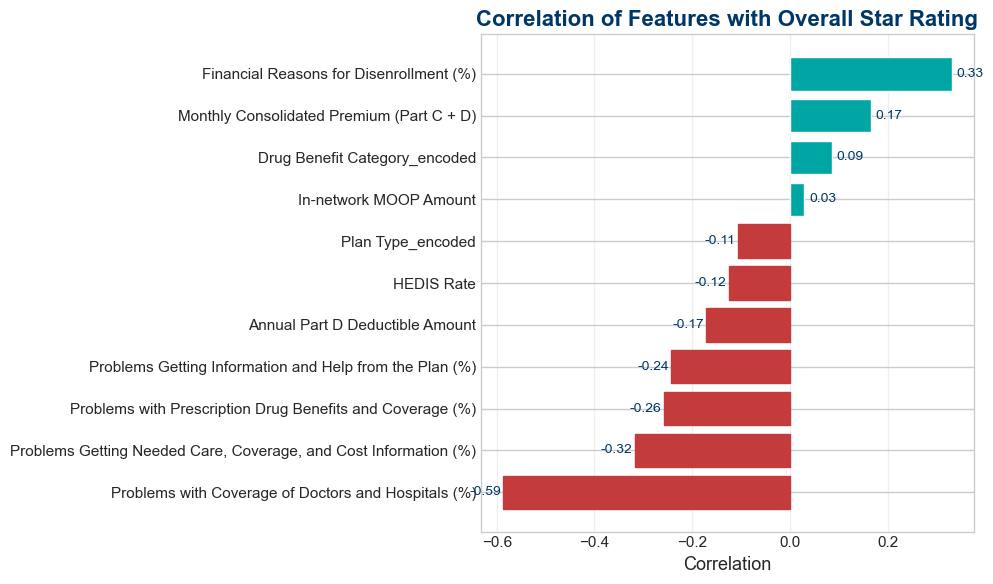

In [325]:
import matplotlib.pyplot as plt

KAISER_BLUE = "#0057A3"
KAISER_TEAL = "#00A6A3"
KAISER_RED = "#C43B3B"
KAISER_DARK = "#003769"

corr = correlations.sort_values()   # ascending so negative at bottom

plt.figure(figsize=(10, 6))
bars = plt.barh(corr.index, corr.values, color=KAISER_TEAL)

# Highlight negative correlations in a different color
for i, v in enumerate(corr.values):
    if v < 0:
        bars[i].set_color(KAISER_RED)

plt.title("Correlation of Features with Overall Star Rating", fontsize=16, fontweight="bold", color=KAISER_DARK)
plt.xlabel("Correlation", fontsize=13)
plt.grid(axis="x", alpha=0.3)

# Add value labels
for i, v in enumerate(corr.values):
    plt.text(v + (0.01 if v >= 0 else -0.07), i, f"{v:.2f}",
             va="center", fontsize=10, color=KAISER_DARK)

plt.tight_layout()
plt.show()


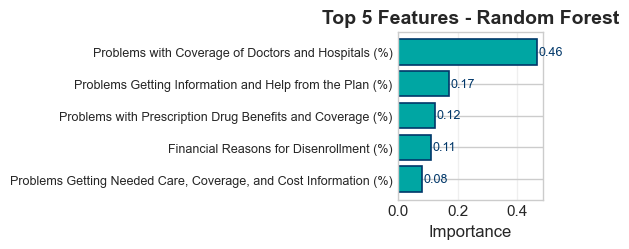

In [ ]:
# Plot 4: Feature Importance - Random Forest (Top 5)
ax4 = plt.subplot(2, 3, 4)

# Kaiser colors
KAISER_TEAL = "#00A6A3"
KAISER_DARK = "#003769"

top_features_rf = feature_importance_rf.head(5)   

ax4.barh(
    range(len(top_features_rf)),
    top_features_rf['Importance'],
    color=KAISER_TEAL,
    edgecolor=KAISER_DARK,
    linewidth=1.2
)

ax4.set_yticks(range(len(top_features_rf)))
ax4.set_yticklabels(top_features_rf['Feature'], fontsize=9)
ax4.set_xlabel('Importance', fontsize=12)
ax4.set_title('Top 5 Features - Random Forest', fontsize=14, fontweight='bold')

# add values next to bars
for i, v in enumerate(top_features_rf['Importance']):
    ax4.text(v + 0.005, i, f"{v:.2f}", va='center', fontsize=9, color=KAISER_DARK)

ax4.invert_yaxis()
ax4.grid(axis='x', alpha=0.3)


Visualizations

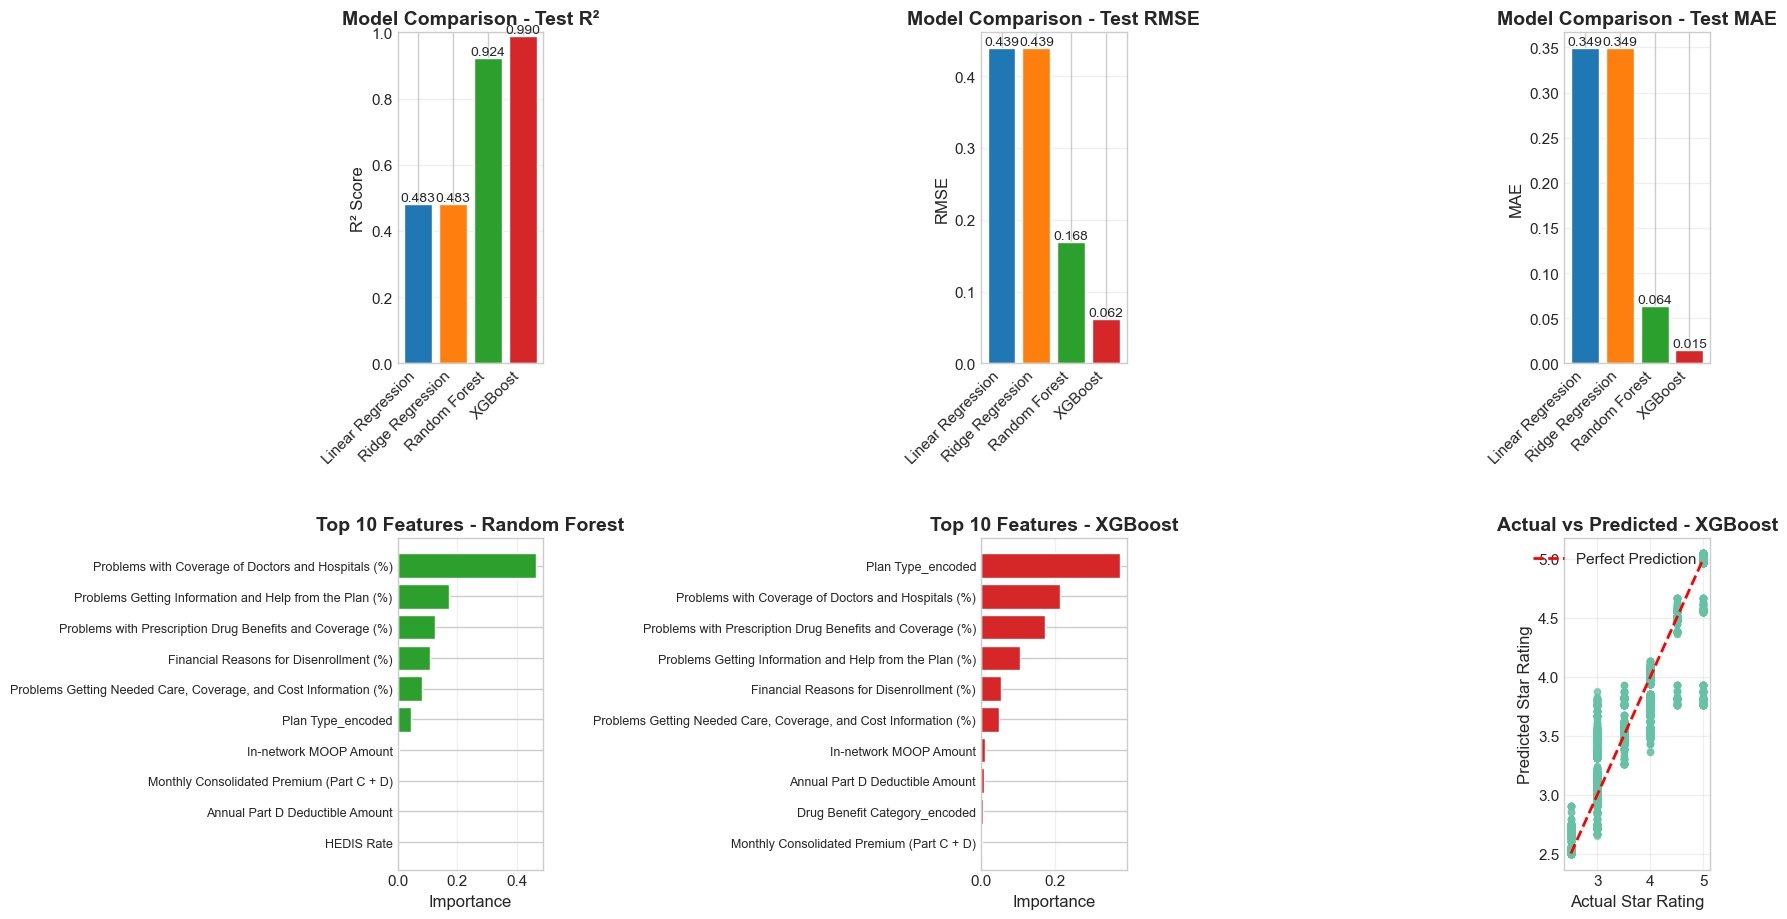

In [328]:
plt.figure(figsize=(18, 10)) 

# Plot 1: Model Comparison - Test R²
ax1 = plt.subplot(2, 3, 1)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
bars = ax1.bar(results_df['Model'], results_df['Test R²'], color=colors)
ax1.set_title('Model Comparison - Test R²', fontsize=14, fontweight='bold')
ax1.set_ylabel('R² Score', fontsize=12)
ax1.set_ylim(0, 1)
ax1.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45, ha='right')

# Plot 2: Model Comparison - Test RMSE
ax2 = plt.subplot(2, 3, 2)
bars = ax2.bar(results_df['Model'], results_df['Test RMSE'], color=colors)
ax2.set_title('Model Comparison - Test RMSE', fontsize=14, fontweight='bold')
ax2.set_ylabel('RMSE', fontsize=12)
ax2.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45, ha='right')

# Plot 3: Model Comparison - Test MAE
ax3 = plt.subplot(2, 3, 3)
bars = ax3.bar(results_df['Model'], results_df['Test MAE'], color=colors)
ax3.set_title('Model Comparison - Test MAE', fontsize=14, fontweight='bold')
ax3.set_ylabel('MAE', fontsize=12)
ax3.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45, ha='right')

# Plot 4: Feature Importance - Random Forest (Top 10)
ax4 = plt.subplot(2, 3, 4)
top_features_rf = feature_importance_rf.head(10)
ax4.barh(range(len(top_features_rf)), top_features_rf['Importance'], color='#2ca02c')
ax4.set_yticks(range(len(top_features_rf)))
ax4.set_yticklabels(top_features_rf['Feature'], fontsize=9)
ax4.set_xlabel('Importance', fontsize=12)
ax4.set_title('Top 10 Features - Random Forest', fontsize=14, fontweight='bold')
ax4.invert_yaxis()
ax4.grid(axis='x', alpha=0.3)

# Plot 5: Feature Importance - XGBoost (Top 10)
ax5 = plt.subplot(2, 3, 5)
top_features_xgb = feature_importance_xgb.head(10)
ax5.barh(range(len(top_features_xgb)), top_features_xgb['Importance'], color='#d62728')
ax5.set_yticks(range(len(top_features_xgb)))
ax5.set_yticklabels(top_features_xgb['Feature'], fontsize=9)
ax5.set_xlabel('Importance', fontsize=12)
ax5.set_title('Top 10 Features - XGBoost', fontsize=14, fontweight='bold')
ax5.invert_yaxis()
ax5.grid(axis='x', alpha=0.3)

# Plot 6: Actual vs Predicted (Best Model)
ax6 = plt.subplot(2, 3, 6)
if best_model_name == 'Random Forest':
    best_pred = rf_test_pred
elif best_model_name == 'XGBoost':
    best_pred = xgb_test_pred
elif best_model_name == 'Ridge Regression':
    best_pred = ridge_test_pred
else:
    best_pred = lr_test_pred

ax6.scatter(y_test, best_pred, alpha=0.5, s=20)
ax6.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
ax6.set_xlabel('Actual Star Rating', fontsize=12)
ax6.set_ylabel('Predicted Star Rating', fontsize=12)
ax6.set_title(f'Actual vs Predicted - {best_model_name}', fontsize=14, fontweight='bold')
ax6.legend()
ax6.grid(alpha=0.3)

#plt.tight_layout()

# Adjust spacing between subplots
plt.subplots_adjust(
    wspace=0.35,   # width space between columns
    hspace=0.5     # height space between rows
)

plt.tight_layout(pad=3.0)      #adds extra padding between axes and labels
plt.show()

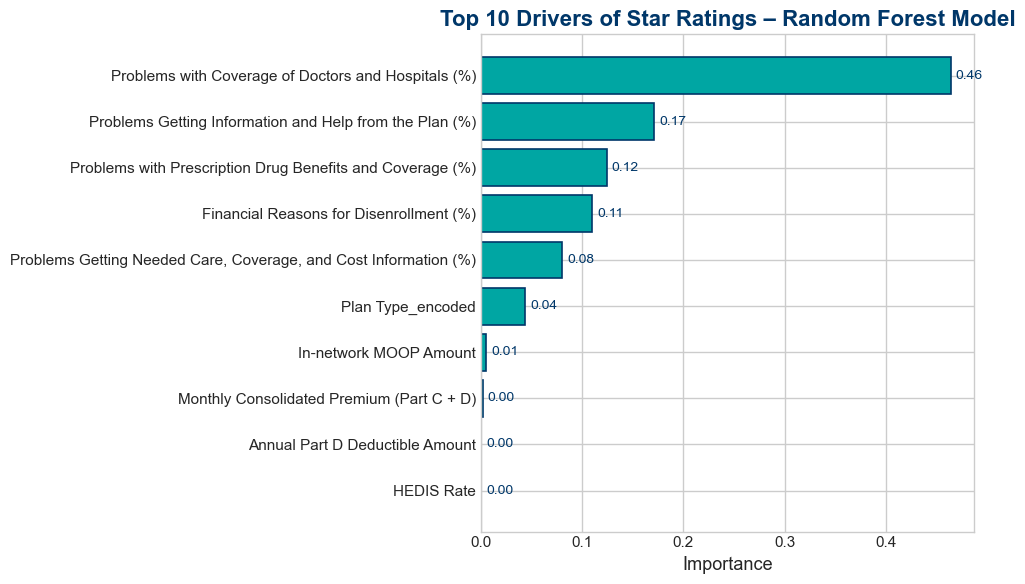

In [329]:
import matplotlib.pyplot as plt

# Kaiser color palette
KAISER_BLUE = "#0057A3"
KAISER_TEAL = "#00A6A3"
KAISER_DARK = "#003769"

plt.style.use("seaborn-v0_8-whitegrid")

# ----- Prepare Top 10 Features -----
top_rf = feature_importance_rf.head(10).iloc[::-1]   # reverse for descending order

# ----- Plot -----
plt.figure(figsize=(10, 6))

plt.barh(
    top_rf["Feature"],
    top_rf["Importance"],
    color=KAISER_TEAL,
    edgecolor=KAISER_DARK,
    linewidth=1.2
)

plt.title(
    "Top 10 Drivers of Star Ratings – Random Forest Model",
    fontsize=16,
    fontweight="bold",
    color=KAISER_DARK
)

plt.xlabel("Importance", fontsize=13)
plt.ylabel("")  # cleaner look

# Add importance values on bars
for i, v in enumerate(top_rf["Importance"]):
    plt.text(v + 0.005, i, f"{v:.2f}", va="center", fontsize=10, color=KAISER_DARK)

plt.tight_layout()
plt.show()


ROC, AUC Curves

DIAGNOSTIC CHECK + ROC EVALUATION

✓ y_test size: 185215

 PREDICTION SIZES:
--------------------------------------------------
Linear Regression   : 185,215 samples
Ridge Regression    : 185,215 samples
Random Forest       : 185,215 samples
XGBoost             : 185,215 samples
--------------------------------------------------

✓ All prediction sizes match! Proceeding with evaluation...

✓ Data prepared: 185215 samples
✓ Star rating classes: [2.5 3.  3.5 4.  4.5 5. ]
✓ Number of classes: 6

✓ Data prepared: 185215 samples
✓ Star rating classes: [2.5 3.  3.5 4.  4.5 5. ]
✓ Number of classes: 6

 Creating ROC curves...


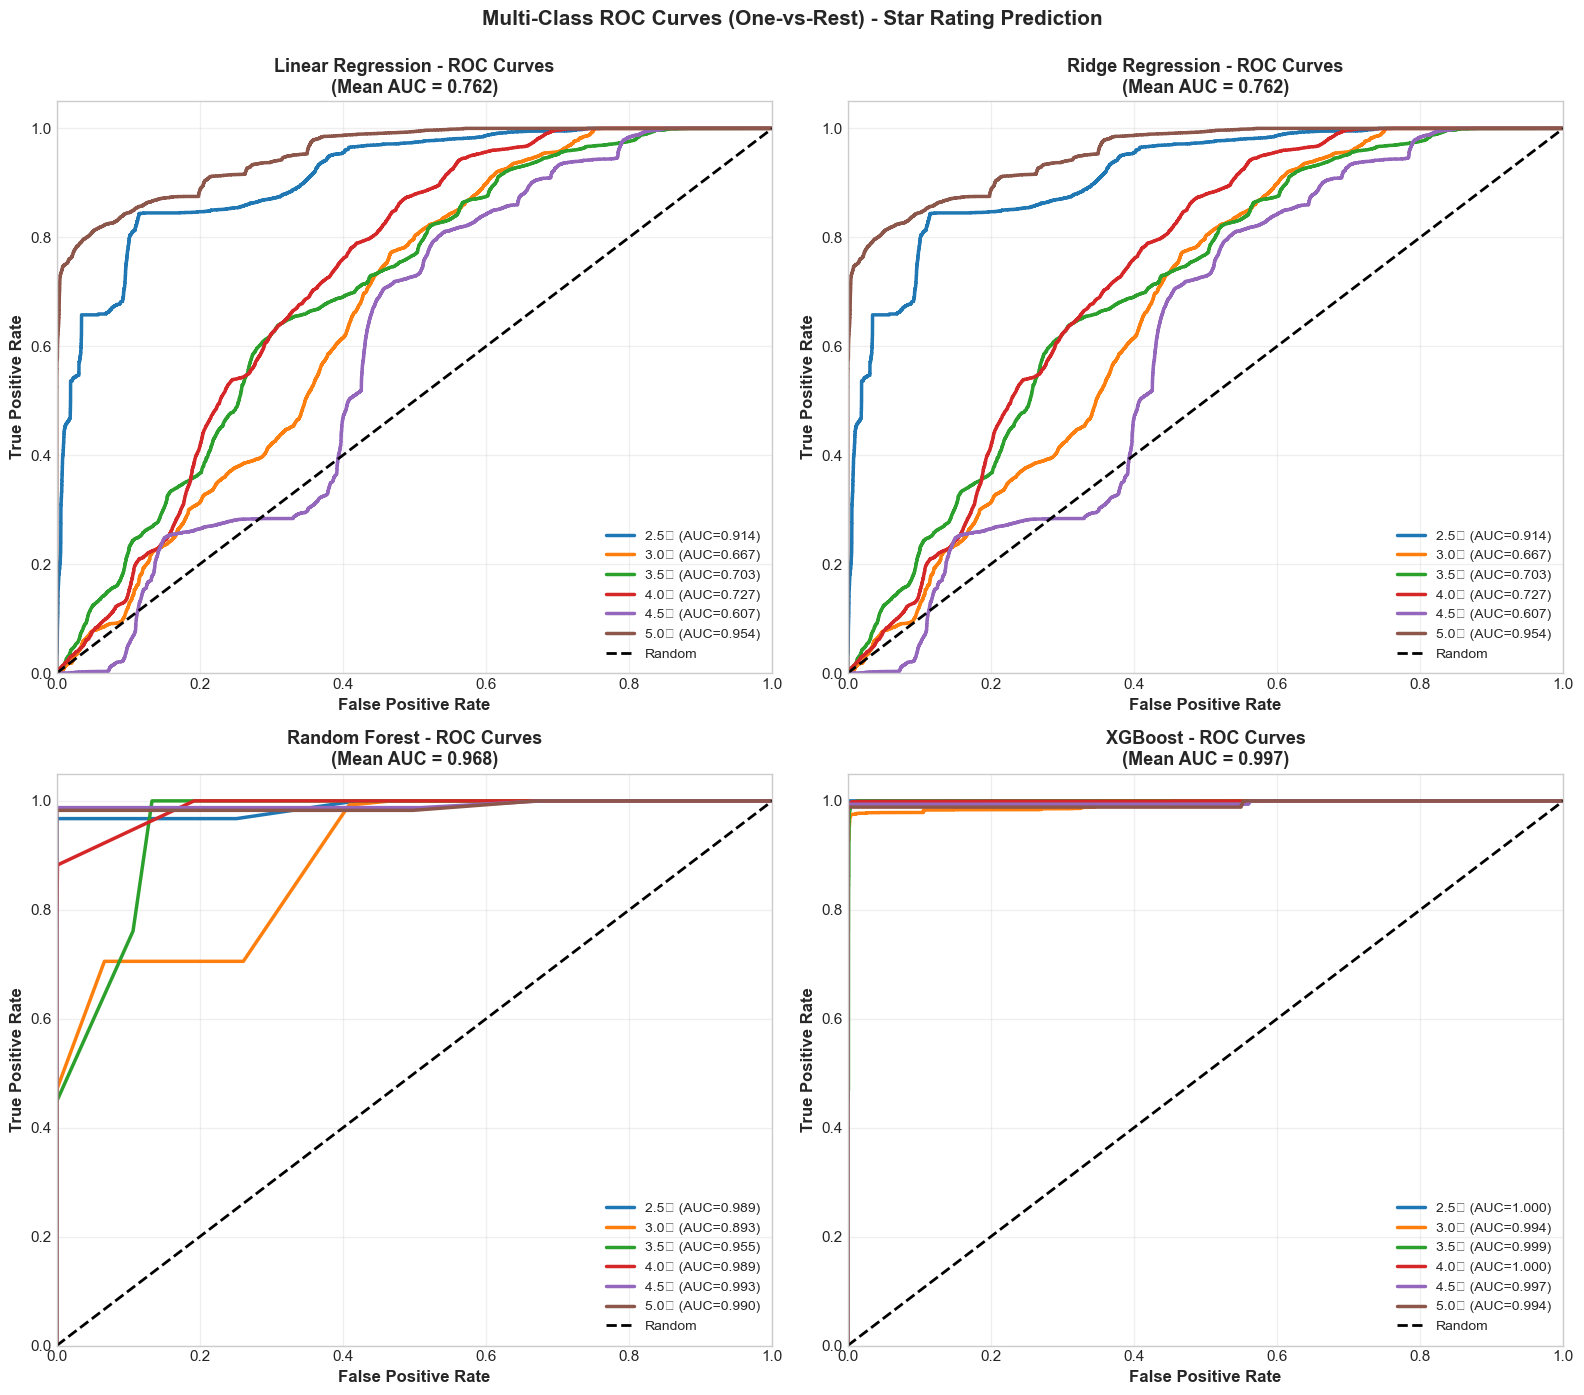

✓ ROC curves generated!

AUC SCORES BY MODEL AND CLASS
            Model  Mean AUC  2.5★ AUC  3.0★ AUC  3.5★ AUC  4.0★ AUC  4.5★ AUC  5.0★ AUC
Linear Regression      0.76      0.91      0.67      0.70      0.73      0.61      0.95
 Ridge Regression      0.76      0.91      0.67      0.70      0.73      0.61      0.95
    Random Forest      0.97      0.99      0.89      0.95      0.99      0.99      0.99
          XGBoost      1.00      1.00      0.99      1.00      1.00      1.00      0.99

🎨 Creating confusion matrices...


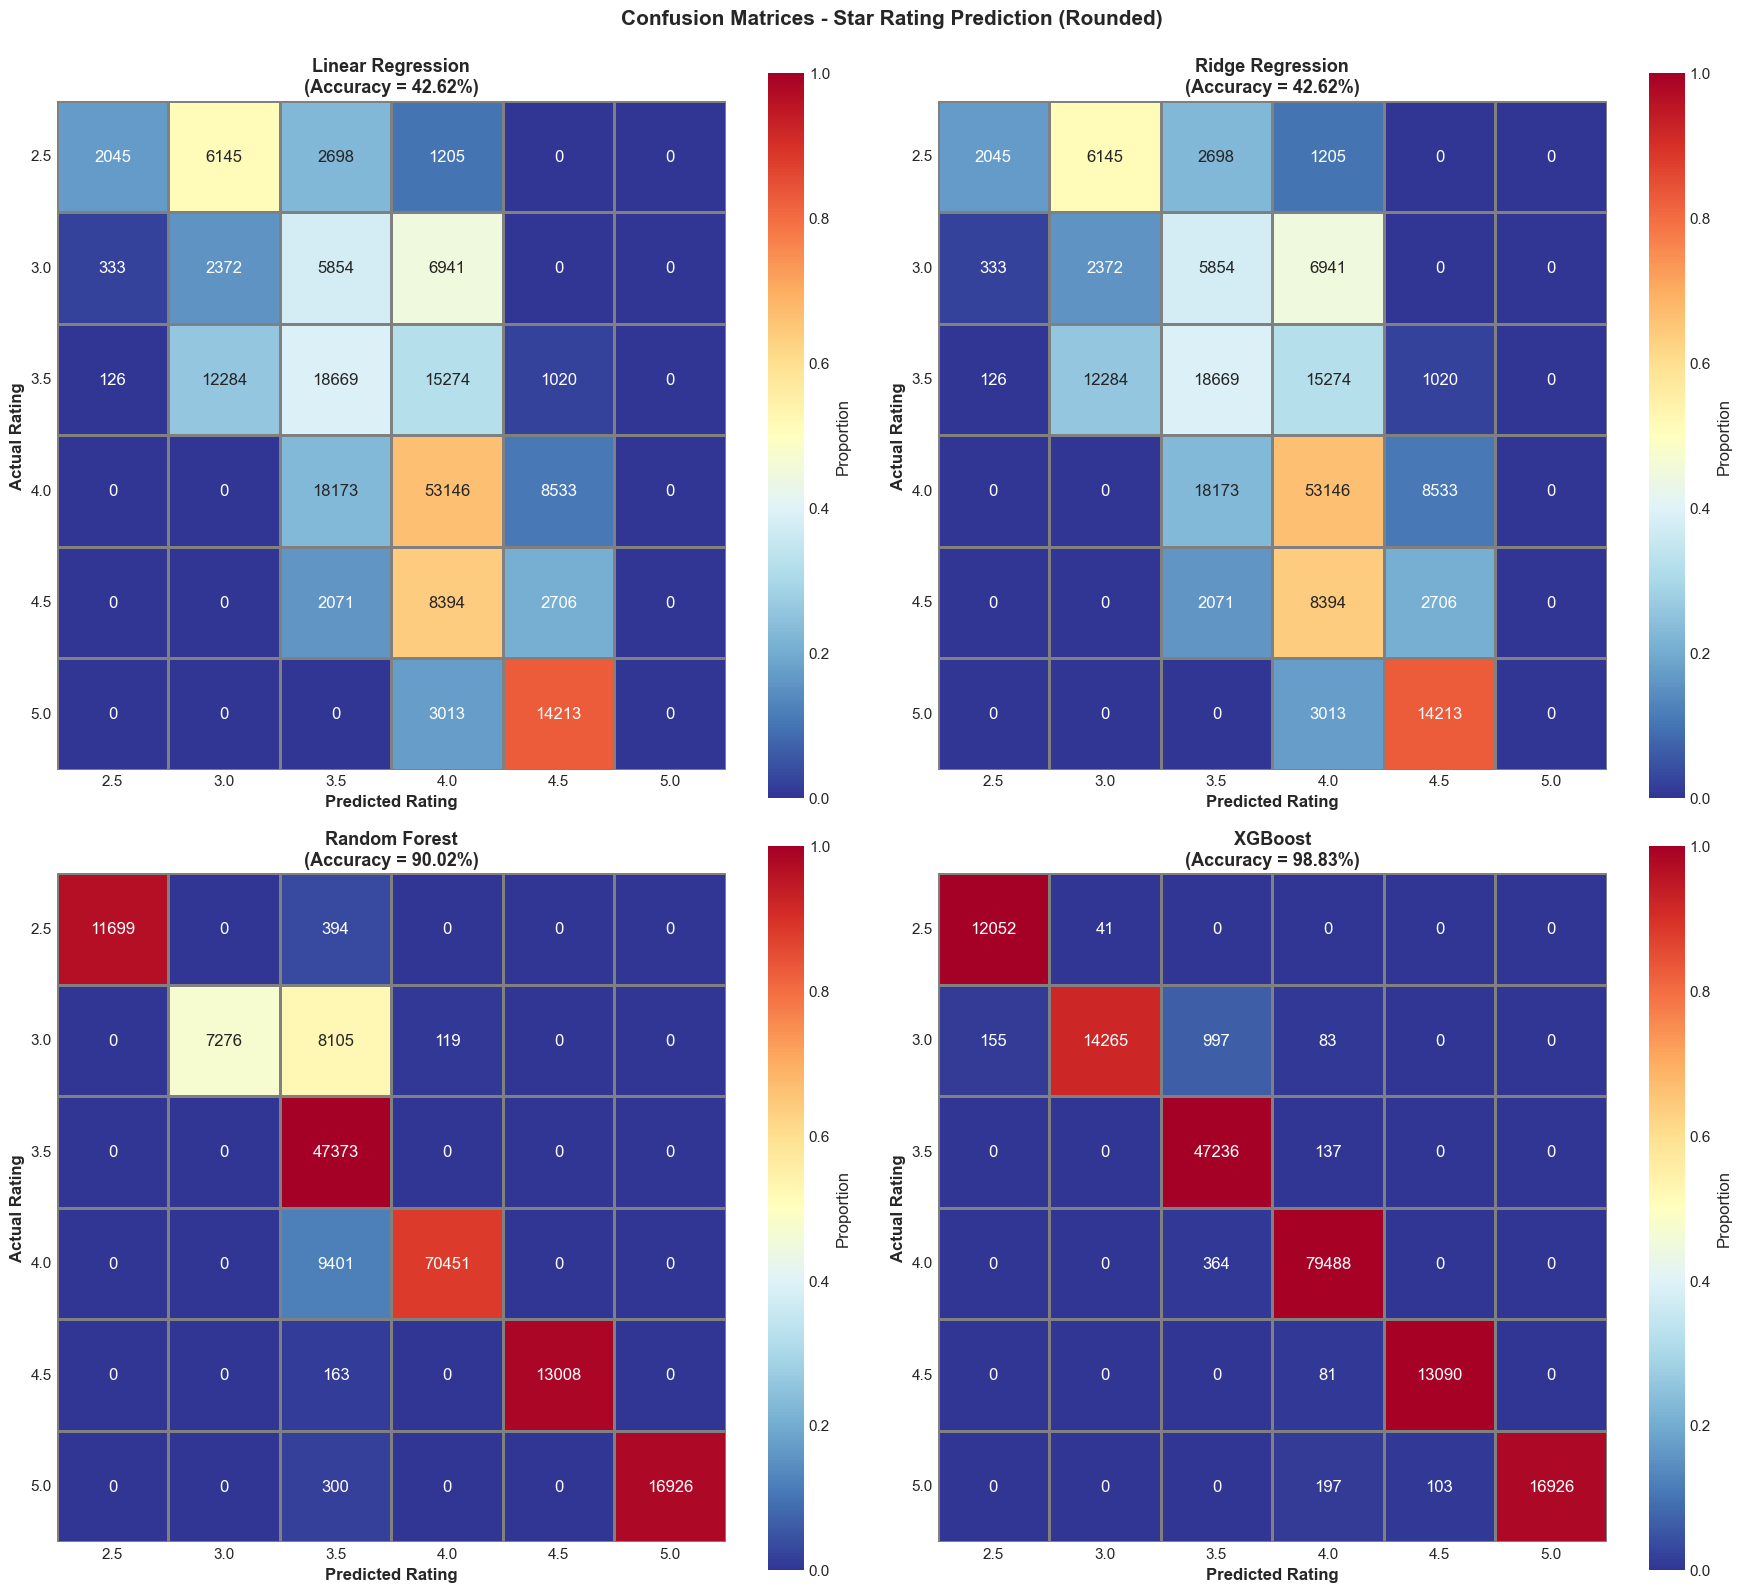

✓ Confusion matrices generated!

MODEL PERFORMANCE SUMMARY
            Model  R² Score  RMSE  MAE  Accuracy (rounded)  Within ±0.5★ (%)  Mean AUC
Linear Regression      0.48  0.44 0.35                0.43             72.68      0.76
 Ridge Regression      0.48  0.44 0.35                0.43             72.68      0.76
    Random Forest      0.92  0.17 0.06                0.90             97.07      0.97
          XGBoost      0.99  0.06 0.02                0.99             99.69      1.00

🏆 BEST OVERALL MODEL: XGBoost
   └─ R² Score: 0.9895
   └─ Mean AUC: 0.9971
   └─ Within ±0.5★: 99.69%

CLASSIFICATION REPORT - XGBoost

              precision    recall  f1-score   support

   2.5 Stars       0.99      1.00      0.99     12093
   3.0 Stars       1.00      0.92      0.96     15500
   3.5 Stars       0.97      1.00      0.98     47373
   4.0 Stars       0.99      1.00      0.99     79852
   4.5 Stars       0.99      0.99      0.99     13171
   5.0 Stars       1.00      0.98      0.99

In [330]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score, r2_score, mean_squared_error, mean_absolute_error
from itertools import cycle
import pandas as pd

print("="*80)
print("DIAGNOSTIC CHECK + ROC EVALUATION")
print("="*80)

# Step 1: Check y_test size
if hasattr(y_test, 'values'):
    y_test_array = y_test.values
else:
    y_test_array = np.array(y_test)

print(f"\n✓ y_test size: {len(y_test_array)}")

# Step 2: Check each prediction size
predictions_raw = {
    'Linear Regression': lr_test_pred,
    'Ridge Regression': ridge_test_pred,
    'Random Forest': rf_test_pred,
    'XGBoost': xgb_test_pred
}

print("\n PREDICTION SIZES:")
print("-" * 50)
for name, pred in predictions_raw.items():
    print(f"{name:20s}: {len(pred):,} samples")
print("-" * 50)

# Step 3: Check for mismatches
mismatches = []
for name, pred in predictions_raw.items():
    if len(pred) != len(y_test_array):
        mismatches.append((name, len(pred)))
        print(f"⚠️  WARNING: {name} has {len(pred)} predictions but y_test has {len(y_test_array)}")

if mismatches:
    print("\n" + "="*80)
    print("SIZE MISMATCH DETECTED!")
    print("="*80)
    print("\nOne or more models have wrong prediction sizes.")
    print("\n🔧 POSSIBLE CAUSES:")
    print("1. You trained models on different train/test splits")
    print("2. You re-ran train_test_split between models")
    print("3. You used different data for different models")
    print("\nSOLUTION:")
    print("Go back and ensure ALL 4 models use the SAME X_test and y_test")
    print("Make sure you run train_test_split ONCE and use same split for all models")
    print("\nExample:")
    print("   X_train, X_test, y_train, y_test = train_test_split(..., random_state=42)")
    print("   # Then train ALL models using same X_train, X_test, y_train, y_test")
    print("="*80)
    
    # Try to proceed with models that match
    print("\n🔄 Attempting to continue with matching models only...")
    predictions = {name: pred for name, pred in predictions_raw.items() if len(pred) == len(y_test_array)}
    
    if len(predictions) == 0:
        print("\n ERROR: No models have matching predictions. Cannot continue.")
        print("Please re-train your models using the same train/test split.")
        raise ValueError("All predictions have incorrect sizes. Please fix and re-run.")
    
    print(f"✓ Continuing with {len(predictions)} models that have correct sizes:")
    for name in predictions.keys():
        print(f"  - {name}")
else:
    print("\n✓ All prediction sizes match! Proceeding with evaluation...")
    predictions = predictions_raw

# Round to nearest 0.5 for classification

y_test_rounded = np.round(y_test_array * 2) / 2

# 1) Define the classes from the actual rounded data
classes = np.unique(y_test_rounded)
n_classes = len(classes)

print(f"\n✓ Data prepared: {len(y_test_rounded)} samples")
print(f"✓ Star rating classes: {classes}")
print(f"✓ Number of classes: {n_classes}")

# 2) Build label map from these classes
label_map = {c: i for i, c in enumerate(classes)}

def encode_labels(arr):
    # Optional: extra safety – re-round inside
    arr = np.round(arr * 2) / 2
    return np.array([label_map[v] for v in arr])

# 3) Encoded y_test for classification metrics
y_test_encoded = encode_labels(y_test_rounded)


print(f"\n✓ Data prepared: {len(y_test_rounded)} samples")
print(f"✓ Star rating classes: {classes}")
print(f"✓ Number of classes: {n_classes}")

# Create binary labels manually (One-vs-Rest)
def create_binary_labels(y, classes):
    n_samples = len(y)
    n_classes = len(classes)
    y_binary = np.zeros((n_samples, n_classes))
    for i, class_val in enumerate(classes):
        y_binary[:, i] = (y == class_val).astype(int)
    return y_binary

y_test_bin = create_binary_labels(y_test_rounded, classes)

# CREATE ROC CURVES
print("\n Creating ROC curves...")

fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.ravel()
auc_scores = []

for idx, (model_name, y_pred) in enumerate(predictions.items()):
    if idx >= 4:  # Only plot first 4 models
        break
        
    ax = axes[idx]
    
    # Convert predictions to probability-like scores
    y_score = np.zeros((len(y_pred), n_classes))
    for i, class_val in enumerate(classes):
        y_score[:, i] = 1 - np.abs(y_pred - class_val) / (classes.max() - classes.min())
    
    # Calculate ROC for each class
    colors = cycle(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
    fpr, tpr, roc_auc = {}, {}, {}
    
    for i, color in zip(range(n_classes), colors):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        ax.plot(fpr[i], tpr[i], color=color, lw=2.5,
               label=f'{classes[i]:.1f}★ (AUC={roc_auc[i]:.3f})')
    
    ax.plot([0, 1], [0, 1], 'k--', lw=2, label='Random')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontweight='bold', fontsize=12)
    ax.set_ylabel('True Positive Rate', fontweight='bold', fontsize=12)
    ax.set_title(f'{model_name} - ROC Curves\n(Mean AUC = {np.mean(list(roc_auc.values())):.3f})', 
                fontweight='bold', fontsize=13)
    ax.legend(loc="lower right", fontsize=10, framealpha=0.95)
    ax.grid(alpha=0.3)
    
    auc_scores.append({
        'Model': model_name,
        'Mean AUC': np.mean(list(roc_auc.values())),
        **{f'{classes[i]:.1f}★ AUC': roc_auc[i] for i in range(n_classes)}
    })

# Hide unused subplots if less than 4 models
for idx in range(len(predictions), 4):
    axes[idx].axis('off')

plt.suptitle('Multi-Class ROC Curves (One-vs-Rest) - Star Rating Prediction', 
            fontsize=15, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()
print("✓ ROC curves generated!")

# PRINT AUC SCORES TABLE
print("\n" + "="*100)
print("AUC SCORES BY MODEL AND CLASS")
print("="*100)
auc_df = pd.DataFrame(auc_scores)
print(auc_df.to_string(index=False))
print("="*100)

# CREATE CONFUSION MATRICES
print("\n🎨 Creating confusion matrices...")

n_models = len(predictions)
if n_models <= 2:
    fig2, axes2 = plt.subplots(1, n_models, figsize=(9*n_models, 8))
    if n_models == 1:
        axes2 = [axes2]
else:
    fig2, axes2 = plt.subplots(2, 2, figsize=(18, 16))
    axes2 = axes2.ravel()

for idx, (model_name, y_pred) in enumerate(predictions.items()):
    if idx >= 4:
        break
    ax = axes2[idx]
    y_pred_rounded = np.round(y_pred * 2) / 2

    # Encode predictions to integer class labels
    y_pred_encoded = encode_labels(y_pred_rounded)

    # Use encoded labels for confusion matrix
    cm = confusion_matrix(y_test_encoded, y_pred_encoded, labels=range(n_classes))
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    
    sns.heatmap(cm_normalized, annot=cm, fmt='d', cmap='RdYlBu_r', 
               cbar_kws={'label': 'Proportion'}, ax=ax, square=True,
               vmin=0, vmax=1, linewidths=1, linecolor='gray')
    
    ax.set_xlabel('Predicted Rating', fontweight='bold', fontsize=12)
    ax.set_ylabel('Actual Rating', fontweight='bold', fontsize=12)
    accuracy = np.trace(cm) / np.sum(cm) * 100
    ax.set_title(f'{model_name}\n(Accuracy = {accuracy:.2f}%)', 
                fontweight='bold', fontsize=13)
    ax.set_xticklabels([f'{c:.1f}' for c in classes], rotation=0)
    ax.set_yticklabels([f'{c:.1f}' for c in classes], rotation=0)

# Hide unused subplots
if n_models < 4:
    for idx in range(n_models, 4):
        axes2[idx].axis('off')

plt.suptitle('Confusion Matrices - Star Rating Prediction (Rounded)', 
            fontsize=15, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()
print("✓ Confusion matrices generated!")

# PERFORMANCE SUMMARY
print("\n" + "="*100)
print("MODEL PERFORMANCE SUMMARY")
print("="*100)

summary = []
for model_name, y_pred in predictions.items():
    y_pred_rounded = np.round(y_pred * 2) / 2
    y_pred_encoded = encode_labels(y_pred_rounded)

    summary.append({
        'Model': model_name,
        'R² Score': r2_score(y_test_array, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test_array, y_pred)),
        'MAE': mean_absolute_error(y_test_array, y_pred),
        'Accuracy (rounded)': accuracy_score(y_test_encoded, y_pred_encoded),
        'Within ±0.5★ (%)': np.mean(np.abs(y_test_array - y_pred) <= 0.5) * 100,
        'Mean AUC': auc_df[auc_df['Model']==model_name]['Mean AUC'].values[0]
    })


summary_df = pd.DataFrame(summary)
print(summary_df.to_string(index=False))
print("="*100)

# Best model identification
best_idx = summary_df['R² Score'].idxmax()
best_model = summary_df.loc[best_idx, 'Model']
print(f"\n🏆 BEST OVERALL MODEL: {best_model}")
print(f"   └─ R² Score: {summary_df.loc[best_idx, 'R² Score']:.4f}")
print(f"   └─ Mean AUC: {summary_df.loc[best_idx, 'Mean AUC']:.4f}")
print(f"   └─ Within ±0.5★: {summary_df.loc[best_idx, 'Within ±0.5★ (%)']:.2f}%")
print("="*100)

# Classification report for best model
print("\n" + "="*100)
print(f"CLASSIFICATION REPORT - {best_model}")
print("="*100)
y_pred_best = predictions[best_model]
y_pred_best_rounded = np.round(y_pred_best * 2) / 2
y_pred_best_encoded = encode_labels(y_pred_best_rounded)

print("\n" + classification_report(
    y_test_encoded,
    y_pred_best_encoded,
    target_names=[f'{r:.1f} Stars' for r in classes],
    zero_division=0
))


print("\n✓ Evaluation complete!")
print("="*80)

## PREDICTING HEDIS RATE

In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')


In [332]:
#selecting rows only where State = CA
df = ldh[ldh['State'] == 'California'].copy()

#dropping the "State" column
df = df.drop(columns=['State'])

In [333]:
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (969154, 18)


County          Organization Name  Plan Type  \
0  Alameda  Blue Shield Of California  Local HMO   
1  Alameda  Blue Shield Of California  Local HMO   
2  Alameda  Blue Shield Of California  Local HMO   
3  Alameda  Blue Shield Of California  Local HMO   
4  Alameda  Blue Shield Of California  Local HMO   

   Monthly Consolidated Premium (Part C + D)  Annual Part D Deductible Amount  \
0                                      45.00                             0.00   
1                                      45.00                             0.00   
2                                      45.00                             0.00   
3                                      45.00                             0.00   
4                                      45.00                             0.00   

  Drug Benefit Category Contract ID Plan ID  In-network MOOP Amount  \
0              Enhanced       H0504      41                 5000.00   
1              Enhanced       H0504      41                 5000.00   
2              Enhanced       H0504      41                 5000.00   
3              Enhanced       H0504      41                 5000.00   
4              Enhanced       H0504      41                 5000.00   

   Overall Star Rating  Contract Year HEDIS Measure Code  HEDIS Rate  \
0                 4.00           2021                AAP       87.38   
1                 4.00           2021                AAP       95.21   
2                 4.00           2021                AAP       94.00   
3                 4.00           2021                AAP       94.03   
4                 4.00           2021                ABX        0.09   

   Problems Getting Needed Care, Coverage, and Cost Information (%)  \
0                                                NaN                  
1                                                NaN                  
2                                                NaN                  
3                                                NaN                  
4                                                NaN                  

   Problems with Coverage of Doctors and Hospitals (%)  \
0                                              25.00     
1                                              25.00     
2                                              25.00     
3                                              25.00     
4                                              25.00     

   Financial Reasons for Disenrollment (%)  \
0                                    24.00   
1                                    24.00   
2                                    24.00   
3                                    24.00   
4                                    24.00   

   Problems with Prescription Drug Benefits and Coverage (%)  \
0                                              10.00           
1                                              10.00           
2                                              10.00           
3                                              10.00           
4                                              10.00           

   Problems Getting Information and Help from the Plan (%)  
0                                              10.00        
1                                              10.00        
2                                              10.00        
3                                              10.00        
4                                              10.00

Selecting features & Target

In [334]:
# Target variable
target = 'HEDIS Rate'

In [335]:
feature_columns = [
    'Monthly Consolidated Premium (Part C + D)',
    'Annual Part D Deductible Amount',
    'In-network MOOP Amount',
    'Overall Star Rating',
    'Problems Getting Needed Care, Coverage, and Cost Information (%)',
    'Problems with Coverage of Doctors and Hospitals (%)',
    'Financial Reasons for Disenrollment (%)',
    'Problems with Prescription Drug Benefits and Coverage (%)',
    'Problems Getting Information and Help from the Plan (%)',
    'Plan Type',
    'Drug Benefit Category'
]

print(f"Target: {target}")
print(f"Number of features: {len(feature_columns)}")

Target: HEDIS Rate
Number of features: 11


Cleaning

In [336]:
df_ml = df[feature_columns + [target]].copy()

print(f"Initial shape: {df_ml.shape}")
print(f"\nMissing values before cleaning:")
print(df_ml.isnull().sum())

# Drop rows with missing target variable
df_ml = df_ml.dropna(subset=[target])
print(f"\nShape after dropping missing target: {df_ml.shape}")

# Fill missing numeric values with median
numeric_cols = df_ml.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df_ml[col].isnull().sum() > 0:
        median_value = df_ml[col].median()
        df_ml[col].fillna(median_value, inplace=True)
        print(f"Filled {col} with median: {median_value:.2f}")

Initial shape: (969154, 12)

Missing values before cleaning:
Monthly Consolidated Premium (Part C + D)                                0
Annual Part D Deductible Amount                                          0
In-network MOOP Amount                                                   0
Overall Star Rating                                                  43082
Problems Getting Needed Care, Coverage, and Cost Information (%)    490445
Problems with Coverage of Doctors and Hospitals (%)                  86794
Financial Reasons for Disenrollment (%)                              86794
Problems with Prescription Drug Benefits and Coverage (%)           585553
Problems Getting Information and Help from the Plan (%)             116054
Plan Type                                                                0
Drug Benefit Category                                                    0
HEDIS Rate                                                               0
dtype: int64

Shape after dropping miss

Encode categorical variables

In [337]:
# Encode Plan Type
le_plan = LabelEncoder()
df_ml['Plan Type_encoded'] = le_plan.fit_transform(df_ml['Plan Type'])
print(f"Plan Type categories: {le_plan.classes_}")

# Encode Drug Benefit Category
le_drug = LabelEncoder()
df_ml['Drug Benefit Category_encoded'] = le_drug.fit_transform(df_ml['Drug Benefit Category'])
print(f"Drug Benefit categories: {le_drug.classes_}")

# Drop original categorical columns
df_ml = df_ml.drop(['Plan Type', 'Drug Benefit Category'], axis=1)

print(f"\nFinal columns for modeling:")
print(df_ml.columns.tolist())

Plan Type categories: ['Local HMO' 'Local PPO']
Drug Benefit categories: ['Basic' 'Enhanced']

Final columns for modeling:
['Monthly Consolidated Premium (Part C + D)', 'Annual Part D Deductible Amount', 'In-network MOOP Amount', 'Overall Star Rating', 'Problems Getting Needed Care, Coverage, and Cost Information (%)', 'Problems with Coverage of Doctors and Hospitals (%)', 'Financial Reasons for Disenrollment (%)', 'Problems with Prescription Drug Benefits and Coverage (%)', 'Problems Getting Information and Help from the Plan (%)', 'HEDIS Rate', 'Plan Type_encoded', 'Drug Benefit Category_encoded']


Separate features and target

In [338]:
X = df_ml.drop(target, axis=1)
y = df_ml[target]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nTarget (HEDIS Rate) statistics:")
print(y.describe())

Features shape: (969154, 11)
Target shape: (969154,)

Target (HEDIS Rate) statistics:
count   969154.00
mean        18.37
std         28.60
min          0.01
25%          0.88
50%          3.77
75%         20.30
max        100.00
Name: HEDIS Rate, dtype: float64


Train test split

In [341]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 775323 samples
Test set size: 193831 samples


Feature Scaling

In [342]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled using StandardScaler")
print(f"Training set scaled shape: {X_train_scaled.shape}")

Features scaled using StandardScaler
Training set scaled shape: (775323, 11)


Model 1- LR

In [343]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

lr_train_pred = lr_model.predict(X_train_scaled)
lr_test_pred = lr_model.predict(X_test_scaled)

lr_train_r2 = r2_score(y_train, lr_train_pred)
lr_test_r2 = r2_score(y_test, lr_test_pred)
lr_test_rmse = np.sqrt(mean_squared_error(y_test, lr_test_pred))
lr_test_mae = mean_absolute_error(y_test, lr_test_pred)

print(f"Train R²: {lr_train_r2:.4f}")
print(f"Test R²: {lr_test_r2:.4f}")
print(f"Test RMSE: {lr_test_rmse:.4f}")
print(f"Test MAE: {lr_test_mae:.4f}")


Train R²: 0.0407
Test R²: 0.0417
Test RMSE: 28.0235
Test MAE: 21.0614


MOdel 2- Ridge Regression

In [344]:
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_scaled, y_train)

ridge_train_pred = ridge_model.predict(X_train_scaled)
ridge_test_pred = ridge_model.predict(X_test_scaled)

ridge_train_r2 = r2_score(y_train, ridge_train_pred)
ridge_test_r2 = r2_score(y_test, ridge_test_pred)
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, ridge_test_pred))
ridge_test_mae = mean_absolute_error(y_test, ridge_test_pred)

print(f"Train R²: {ridge_train_r2:.4f}")
print(f"Test R²: {ridge_test_r2:.4f}")
print(f"Test RMSE: {ridge_test_rmse:.4f}")
print(f"Test MAE: {ridge_test_mae:.4f}")


Train R²: 0.0407
Test R²: 0.0417
Test RMSE: 28.0235
Test MAE: 21.0614


MOdel 3- Rnadom Forest regressor

In [345]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

rf_train_r2 = r2_score(y_train, rf_train_pred)
rf_test_r2 = r2_score(y_test, rf_test_pred)
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_pred))
rf_test_mae = mean_absolute_error(y_test, rf_test_pred)

print(f"Train R²: {rf_train_r2:.4f}")
print(f"Test R²: {rf_test_r2:.4f}")
print(f"Test RMSE: {rf_test_rmse:.4f}")
print(f"Test MAE: {rf_test_mae:.4f}")

Train R²: 0.1143
Test R²: 0.1164
Test RMSE: 26.9079
Test MAE: 19.6539


MOdel 4- XG Boost

In [346]:
xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)

xgb_train_pred = xgb_model.predict(X_train)
xgb_test_pred = xgb_model.predict(X_test)

xgb_train_r2 = r2_score(y_train, xgb_train_pred)
xgb_test_r2 = r2_score(y_test, xgb_test_pred)
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, xgb_test_pred))
xgb_test_mae = mean_absolute_error(y_test, xgb_test_pred)

print(f"Train R²: {xgb_train_r2:.4f}")
print(f"Test R²: {xgb_test_r2:.4f}")
print(f"Test RMSE: {xgb_test_rmse:.4f}")
print(f"Test MAE: {xgb_test_mae:.4f}")

Train R²: 0.1416
Test R²: 0.1453
Test RMSE: 26.4644
Test MAE: 19.1127


Comparing all models

In [355]:
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Random Forest', 'XGBoost'],
    'Train R²': [lr_train_r2, ridge_train_r2, rf_train_r2, xgb_train_r2],
    'Test R²': [lr_test_r2, ridge_test_r2, rf_test_r2, xgb_test_r2],
    'Test RMSE': [lr_test_rmse, ridge_test_rmse, rf_test_rmse, xgb_test_rmse],
    'Test MAE': [lr_test_mae, ridge_test_mae, rf_test_mae, xgb_test_mae]
})

print(results_df.to_string(index=False))

# Identify best model based on Test R²
best_model_idx = results_df['Test R²'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Model']
print(f"\n BEST MODEL: {best_model_name}")
print(f"   Test R²: {results_df.loc[best_model_idx, 'Test R²']:.4f}")

            Model  Train R²  Test R²  Test RMSE  Test MAE
Linear Regression      0.04     0.04      28.02     21.06
 Ridge Regression      0.04     0.04      28.02     21.06
    Random Forest      0.11     0.12      26.91     19.65
          XGBoost      0.14     0.15      26.46     19.11

 BEST MODEL: XGBoost
   Test R²: 0.1453


Feature Importance (Random FOrest)

In [353]:
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance_rf.to_string(index=False))


                                                         Feature  Importance
                                             Overall Star Rating        0.20
       Problems with Prescription Drug Benefits and Coverage (%)        0.17
             Problems with Coverage of Doctors and Hospitals (%)        0.15
                                 Annual Part D Deductible Amount        0.14
                         Financial Reasons for Disenrollment (%)        0.14
                                          In-network MOOP Amount        0.12
Problems Getting Needed Care, Coverage, and Cost Information (%)        0.05
         Problems Getting Information and Help from the Plan (%)        0.03
                       Monthly Consolidated Premium (Part C + D)        0.01
                                   Drug Benefit Category_encoded        0.00
                                               Plan Type_encoded        0.00


Feature importance (XG Boost)

In [354]:
feature_importance_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance_xgb.to_string(index=False))


                                                         Feature  Importance
       Problems with Prescription Drug Benefits and Coverage (%)        0.22
                                               Plan Type_encoded        0.15
                                             Overall Star Rating        0.13
                         Financial Reasons for Disenrollment (%)        0.12
             Problems with Coverage of Doctors and Hospitals (%)        0.10
                                 Annual Part D Deductible Amount        0.09
         Problems Getting Information and Help from the Plan (%)        0.07
Problems Getting Needed Care, Coverage, and Cost Information (%)        0.07
                                          In-network MOOP Amount        0.03
                                   Drug Benefit Category_encoded        0.02
                       Monthly Consolidated Premium (Part C + D)        0.00


Correlation analysis

In [356]:
correlations = X.corrwith(y).sort_values(ascending=False)
print("\nFeature Correlations with HEDIS Rate:")
print(correlations.to_string())

print("\n📊 Strongest Positive Correlations:")
for i in range(min(3, len(correlations))):
    if correlations.iloc[i] > 0:
        print(f"  • {correlations.index[i]}: {correlations.iloc[i]:.4f}")

print("\n📊 Strongest Negative Correlations:")
for i in range(len(correlations)-1, max(len(correlations)-4, -1), -1):
    if correlations.iloc[i] < 0:
        print(f"  • {correlations.index[i]}: {correlations.iloc[i]:.4f}")


Feature Correlations with HEDIS Rate:
Plan Type_encoded                                                   0.06
Problems Getting Needed Care, Coverage, and Cost Information (%)    0.03
Problems with Coverage of Doctors and Hospitals (%)                 0.01
Drug Benefit Category_encoded                                      -0.01
Problems Getting Information and Help from the Plan (%)            -0.02
In-network MOOP Amount                                             -0.03
Annual Part D Deductible Amount                                    -0.04
Monthly Consolidated Premium (Part C + D)                          -0.04
Problems with Prescription Drug Benefits and Coverage (%)          -0.06
Financial Reasons for Disenrollment (%)                            -0.08
Overall Star Rating                                                -0.12

📊 Strongest Positive Correlations:
  • Plan Type_encoded: 0.0605
  • Problems Getting Needed Care, Coverage, and Cost Information (%): 0.0261
  • Problems wi

Visualizations

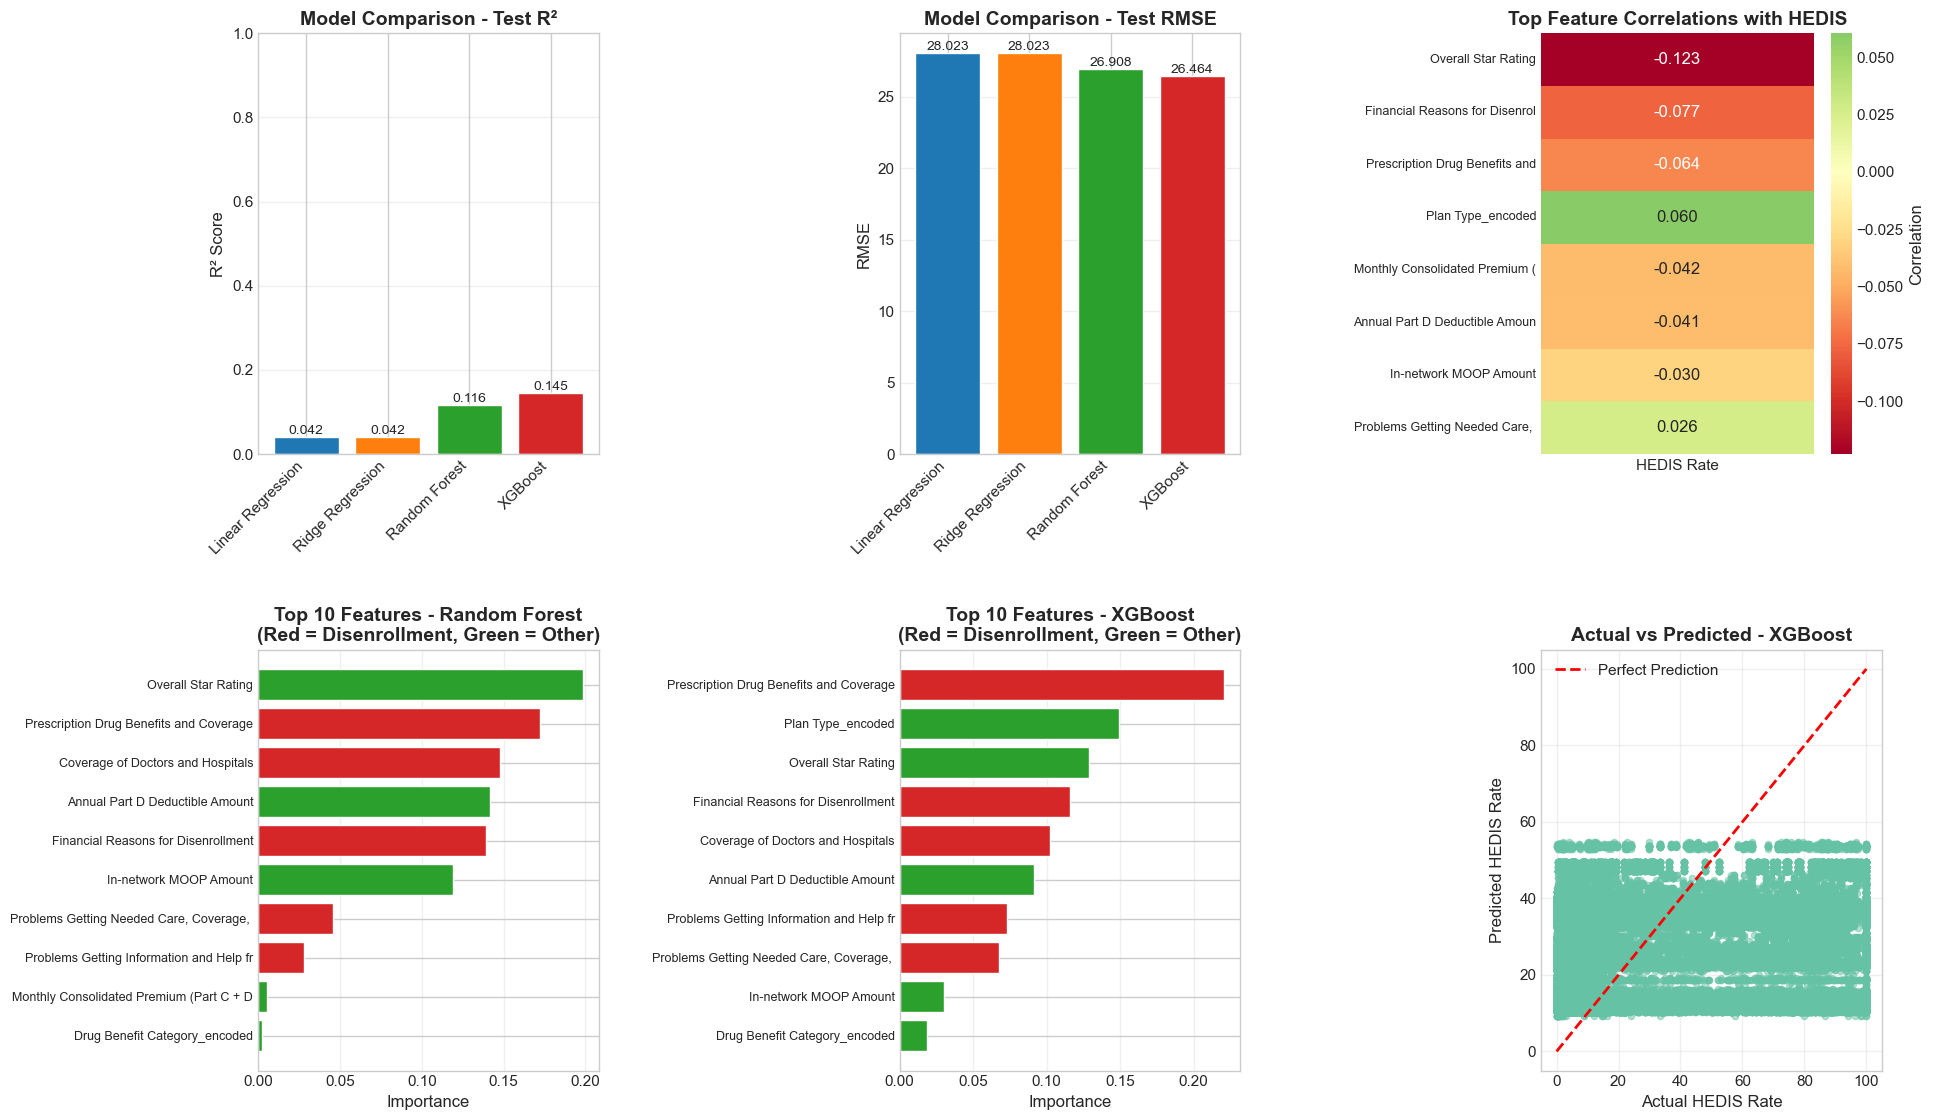

In [357]:
# Create figure with subplots
fig = plt.figure(figsize=(20, 12))

# Plot 1: Model Comparison - Test R²
ax1 = plt.subplot(2, 3, 1)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
bars = ax1.bar(results_df['Model'], results_df['Test R²'], color=colors)
ax1.set_title('Model Comparison - Test R²', fontsize=14, fontweight='bold')
ax1.set_ylabel('R² Score', fontsize=12)
ax1.set_ylim(0, 1)
ax1.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45, ha='right')

# Plot 2: Model Comparison - Test RMSE
ax2 = plt.subplot(2, 3, 2)
bars = ax2.bar(results_df['Model'], results_df['Test RMSE'], color=colors)
ax2.set_title('Model Comparison - Test RMSE', fontsize=14, fontweight='bold')
ax2.set_ylabel('RMSE', fontsize=12)
ax2.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45, ha='right')

# Plot 3: Correlation Heatmap (Top features with HEDIS Rate)
ax3 = plt.subplot(2, 3, 3)
top_corr_features = correlations.abs().nlargest(8).index.tolist()
corr_data = X[top_corr_features].corrwith(y).values.reshape(-1, 1)
sns.heatmap(corr_data, annot=True, fmt='.3f', cmap='RdYlGn', center=0,
            yticklabels=[f.replace(' (%)', '').replace('Problems with ', '')[:30] 
                        for f in top_corr_features],
            xticklabels=['HEDIS Rate'], ax=ax3, cbar_kws={'label': 'Correlation'})
ax3.set_title('Top Feature Correlations with HEDIS', fontsize=14, fontweight='bold')
plt.setp(ax3.get_yticklabels(), fontsize=9)

# Plot 4: Feature Importance - Random Forest (Top 10)
ax4 = plt.subplot(2, 3, 4)
top_features_rf = feature_importance_rf.head(10)
colors_rf = ['#d62728' if 'Problems' in f or 'Financial' in f else '#2ca02c' 
             for f in top_features_rf['Feature']]
ax4.barh(range(len(top_features_rf)), top_features_rf['Importance'], color=colors_rf)
ax4.set_yticks(range(len(top_features_rf)))
ax4.set_yticklabels([f.replace(' (%)', '').replace('Problems with ', '')[:40] 
                     for f in top_features_rf['Feature']], fontsize=9)
ax4.set_xlabel('Importance', fontsize=12)
ax4.set_title('Top 10 Features - Random Forest\n(Red = Disenrollment, Green = Other)', 
              fontsize=14, fontweight='bold')
ax4.invert_yaxis()
ax4.grid(axis='x', alpha=0.3)

# Plot 5: Feature Importance - XGBoost (Top 10)
ax5 = plt.subplot(2, 3, 5)
top_features_xgb = feature_importance_xgb.head(10)
colors_xgb = ['#d62728' if 'Problems' in f or 'Financial' in f else '#2ca02c' 
              for f in top_features_xgb['Feature']]
ax5.barh(range(len(top_features_xgb)), top_features_xgb['Importance'], color=colors_xgb)
ax5.set_yticks(range(len(top_features_xgb)))
ax5.set_yticklabels([f.replace(' (%)', '').replace('Problems with ', '')[:40] 
                     for f in top_features_xgb['Feature']], fontsize=9)
ax5.set_xlabel('Importance', fontsize=12)
ax5.set_title('Top 10 Features - XGBoost\n(Red = Disenrollment, Green = Other)', 
              fontsize=14, fontweight='bold')
ax5.invert_yaxis()
ax5.grid(axis='x', alpha=0.3)

# Plot 6: Actual vs Predicted (Best Model)
ax6 = plt.subplot(2, 3, 6)
if best_model_name == 'Random Forest':
    best_pred = rf_test_pred
elif best_model_name == 'XGBoost':
    best_pred = xgb_test_pred
elif best_model_name == 'Ridge Regression':
    best_pred = ridge_test_pred
else:
    best_pred = lr_test_pred

ax6.scatter(y_test, best_pred, alpha=0.5, s=20)
ax6.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
ax6.set_xlabel('Actual HEDIS Rate', fontsize=12)
ax6.set_ylabel('Predicted HEDIS Rate', fontsize=12)
ax6.set_title(f'Actual vs Predicted - {best_model_name}', fontsize=14, fontweight='bold')
ax6.legend()
ax6.grid(alpha=0.3)

plt.subplots_adjust(
    wspace=0.35,   # width space between columns
    hspace=0.5     # height space between rows
)

plt.tight_layout(pad=3.0)      # adds extra padding between axes and labels
plt.show()


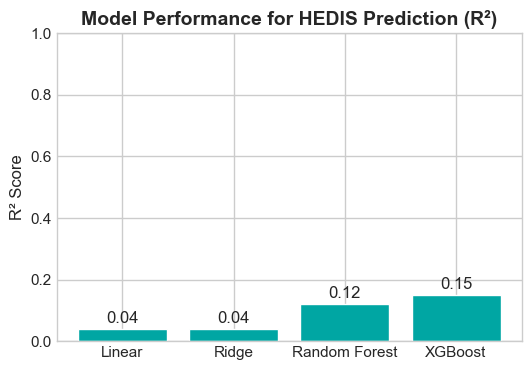

In [358]:
import matplotlib.pyplot as plt

models = ["Linear", "Ridge", "Random Forest", "XGBoost"]
r2_values = [0.04, 0.04, 0.12, 0.15]

plt.figure(figsize=(6,4))
plt.bar(models, r2_values, color="#00A6A3")

plt.ylim(0, 1)
plt.title("Model Performance for HEDIS Prediction (R²)", fontsize=14, fontweight='bold')
plt.ylabel("R² Score")

# Add labels on bars
for i, v in enumerate(r2_values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.show()
